# **Food Delivery Time Prediction**  
Data Set Link - https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset?datasetId=2515893&sortBy=voteCount

#Team Members -

Pratik Poojari (002645173)

Anuja Surana   (002644394)

T Navya Sushma (002708292)

Vaidehi Tawde  (002643847)

The Food Delivery Industry, where precise and on-time delivery is vital, greatly benefits from the use of the food delivery time prediction model. Customer happiness and overall experience are directly influenced by delivery time.

The problem statement of the food delivery time prediction dataset is to develop accurate and reliable predictive models that estimate the time it takes for food orders to be delivered to customers. The goal is to leverage various features and factors associated with the delivery process, such as delivery person details, order characteristics, weather conditions, road traffic density, and other relevant attributes, to create models that can provide precise estimates of the time it will take for an order to reach the customer's location.

To develop an effective prediction model, we began by thoroughly cleaning the dataset, ensuring it was free from errors and inconsistencies. This step was vital in ensuring the reliability and accuracy of the model's predictions.

Feature engineering was then employed to extract valuable insights from the dataset. By considering factors such as delivery person age, ratings, location coordinates, and time-related variables, we aimed to capture key variables that influence delivery time. These engineered features contributed to the model's predictive capabilities.


Using regression algorithms like linear regression ,Lasso Regression, Ridge Regression, Decision Tree Regression, Random Forest Regression, Support Vector Regression Linear, Support Vector Regression RBF, XGBoost Regression, AdaBoost Regression we built the predictive model.

It was trained on a subset of the dataset using techniques like cross-validation to ensure robustness. Evaluation metrics such as mean squared error (MSE),accuracy,
precision, recall, F1-score and R-squared (R2) score were used to assess the model's accuracy. The food delivery time prediction model empowers businesses to optimize their operations and improve the overall delivery experience for their customers.

#Target Variable and Relevant Features:

##Target Variable:
 Time_taken (minutes) - This is the time taken to complete a delivery, which we aim to predict.

##Relevant Features:
Delivery_person_Age: Age of the delivery person.

Delivery_person_Ratings: Ratings received by the delivery person.

Restaurant_latitude and Restaurant_longitude: Coordinates of the restaurant's location.

Delivery_location_latitude and Delivery_location_longitude: Coordinates of the delivery destination.

Order_Date: Date when the order was placed.

Time_Orderd: Time when the order was placed.

Time_Order_picked: Time when the order was picked up for delivery.

Weatherconditions: Weather conditions during the delivery.

Road_traffic_density: Density of road traffic during the delivery.

Vehicle_condition: Condition of the delivery vehicle.

Type_of_order: Type of food order (e.g., Snack, Meal, Buffet, etc.).

Type_of_vehicle: Type of vehicle used for delivery (e.g., motorcycle, scooter, electric scooter, etc.).

multiple_deliveries: Whether there were multiple deliveries in the same trip.

Festival: Whether the delivery occurred during a festival.
City: The city in which the delivery took place.


##Problem Framing:
This problem can be framed as a supervised regression task. We have a labeled dataset where the target variable (Time_taken) is a continuous numeric value that we want to predict. The given features can be used to train a predictive model that estimates the delivery time based on the input data. We can apply various regression algorithms and techniques to build and evaluate the predictive model. The ultimate aim is to minimize the prediction error and improve the efficiency of the delivery process.




In [ ]:
# Get the list of installed packages
!pip freeze > requirements.txt

## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

%matplotlib inline

In [ ]:
df = pd.read_csv('data.csv')
df.replace("NaN",np.nan,regex=True,inplace=True)
df.head()

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                   37                     4.9   
1  0xb379     BANGRES18DEL02                   34                     4.5   
2  0x5d6d     BANGRES19DEL01                   23                     4.4   
3  0x7a6a    COIMBRES13DEL02                   38                     4.7   
4  0x70a2     CHENRES12DEL01                   32                     4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2                    77.688400  19-03-2022    08:30:00          08:45:00   
3                    77.026494  05-04-2022    18:00:00          18:10:00   
4                    80.289982  26-03-2022    13:30:00          13:45:00   

       Weatherconditions Road_traffic_density  Vehicle_condition  \
0       conditions Sunny                High                   2   
1      conditions Stormy                 Jam                   2   
2  conditions Sandstorms                 Low                   0   
3       conditions Sunny              Medium                   0   
4      conditions Cloudy                High                   1   

  Type_of_order Type_of_vehicle multiple_deliveries Festival            City  \
0        Snack      motorcycle                    0      No           Urban    
1        Snack         scooter                    1      No   Metropolitian    
2       Drinks      motorcycle                    1      No           Urban    
3       Buffet      motorcycle                    1      No   Metropolitian    
4        Snack         scooter                    1      No   Metropolitian    

  Time_taken(min)  
0        (min) 24  
1        (min) 33  
2        (min) 26  
3        (min) 21  
4        (min) 30

In [ ]:
df.shape

(45593, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  object 
 3   Delivery_person_Ratings      43685 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

In [ ]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(float)
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)

In [ ]:
df.describe()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         43739.000000             43685.000000         45593.000000   
mean             29.567137                 4.633780            17.017729   
std               5.815155                 0.334716             8.185109   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.500000            12.933284   
50%              30.000000                 4.700000            18.546947   
75%              35.000000                 4.900000            22.728163   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          45593.000000                45593.000000   
mean              70.231332                   17.465186   
std               22.883647                    7.335122   
min              -88.366217                    0.010000   
25%               73.170000                   12.988453   
50%               75.898497                   18.633934   
75%               78.044095                   22.785049   
max               88.433452                   31.054057   

       Delivery_location_longitude  Vehicle_condition  
count                 45593.000000       45593.000000  
mean                     70.845702           1.023359  
std                      21.118812           0.839065  
min                       0.010000           0.000000  
25%                      73.280000           0.000000  
50%                      76.002574           1.000000  
75%                      78.107044           2.000000  
max                      88.563452           3.000000

In [ ]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

# **EDA**
Exploratory Data Analysis (EDA) is a critical step in the data analysis process that involves visually and statistically summarizing, interpreting, and understanding the main characteristics, patterns, and relationships within a dataset. EDA is performed for several important reasons:

Data Understanding:It provides insights into the data's structure, content, and quality.

Data Cleaning:This step is crucial for data preprocessing and ensuring that the data is accurate and reliable.

Feature Selection: It helps in choosing which features to include in the analysis or modeling.

Outlier Detection:Identifying outliers is important for understanding the data distribution and deciding whether to treat or remove them.

Pattern Recognition:These patterns might provide valuable insights or suggest relationships between variables.

Data Distribution:This is crucial for selecting appropriate statistical methods and models.

EDA is not a one-time step but an iterative process that continues throughout the data analysis workflow. It helps guide subsequent analysis, model selection, and decision-making.

By thoroughly understanding the data through EDA, data analysts and scientists can make informed choices, address potential issues, and build more accurate and robust models.







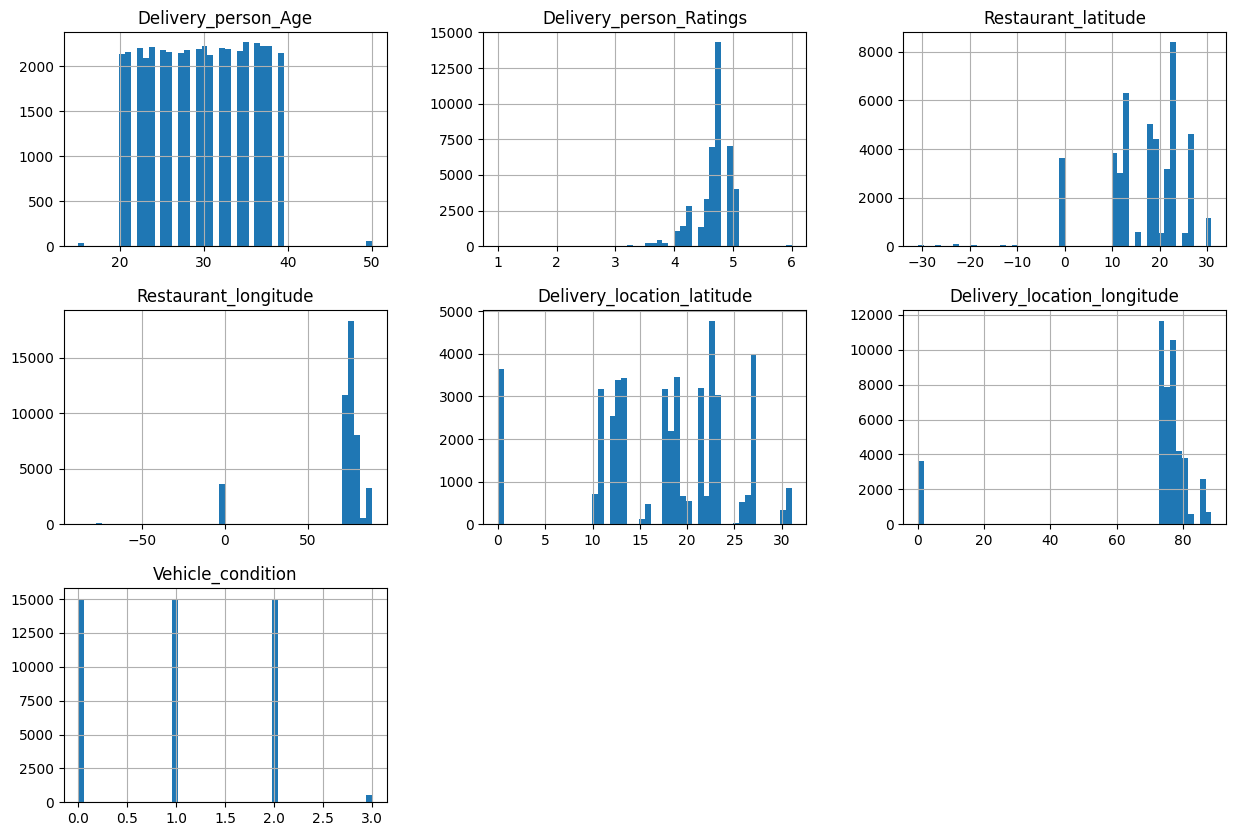

In [ ]:
df.hist(bins=50, figsize=(15, 10))
plt.show()

## Delivery_Person_ID

In [ ]:
df['Delivery_person_ID'].value_counts()

PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: Delivery_person_ID, Length: 1320, dtype: int64

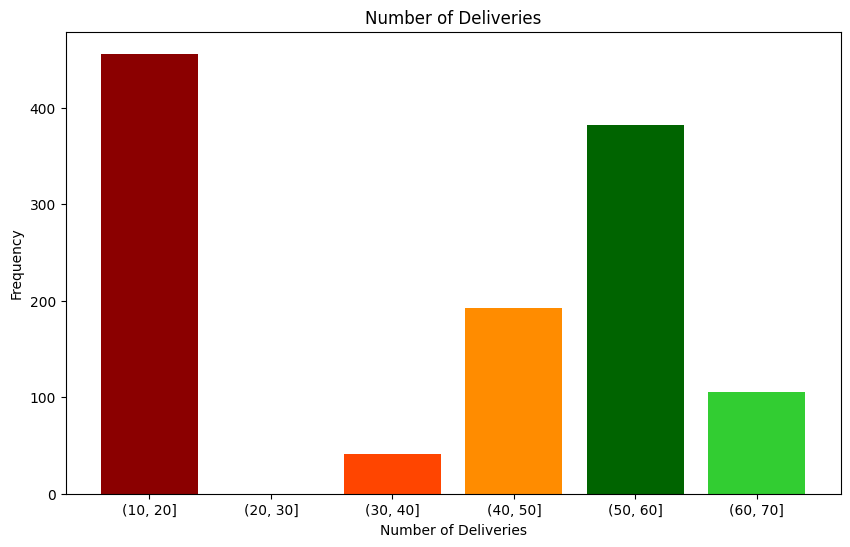

In [ ]:
delivery_person_counts = df['Delivery_person_ID'].value_counts()

delivery_categories = pd.cut(delivery_person_counts, bins=range(10, 71, 10))
category_counts = delivery_categories.value_counts().sort_index()

plt.figure(figsize=(10, 6))
colors = ['darkred', 'salmon', 'orangered', 'darkorange', 'darkgreen', 'limegreen']
plt.bar(category_counts.index.astype(str), category_counts.values, color=colors)
plt.title('Number of Deliveries')
plt.xlabel('Number of Deliveries')
plt.ylabel('Frequency')
plt.show()

* More than 400 person delivered 10 to 20 numbers of deliveries.

## Delivery Person Age

<ipython-input-16-18ba03e5e2e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery_person_Age'])


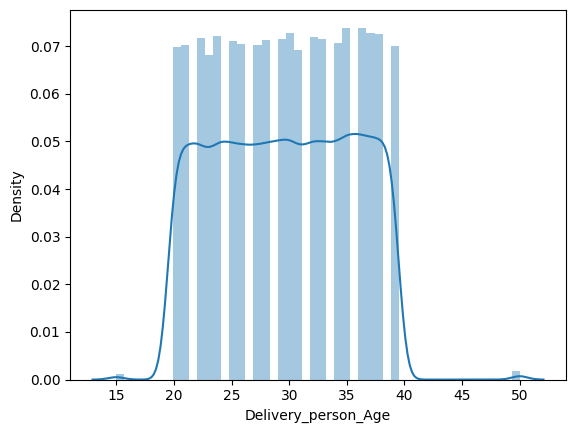

In [ ]:
sns.distplot(df['Delivery_person_Age'])
plt.show()

* Almost uniform distribution from range 20-40.

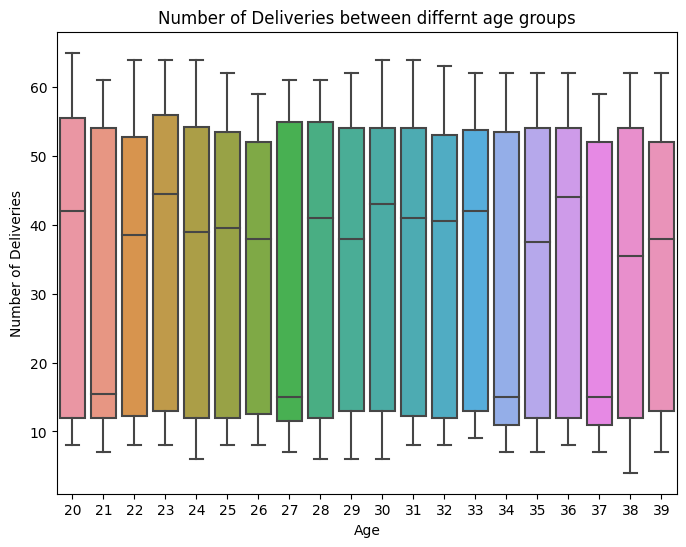

In [ ]:
deliveries_by_person_df = pd.DataFrame(df.groupby('Delivery_person_ID')['Delivery_person_Age'].count())
deliveries_by_person_df = deliveries_by_person_df.rename(columns = {'Delivery_person_Age': 'Number_of_Deliveries'})
deliveries_by_person_df['Delivery_person_Age'] = df.groupby('Delivery_person_ID')['Delivery_person_Age'].first().astype(int)
# deliveries_by_person_df

plt.figure(figsize=(8, 6))
sns.boxplot(data=deliveries_by_person_df, x='Delivery_person_Age', y='Number_of_Deliveries')
plt.title("Number of Deliveries between differnt age groups")
plt.xlabel("Age")
plt.ylabel("Number of Deliveries")
plt.show()

* Age group of 21, 27, 34, 37 has the lower average number of deliveries compared to other age groups.

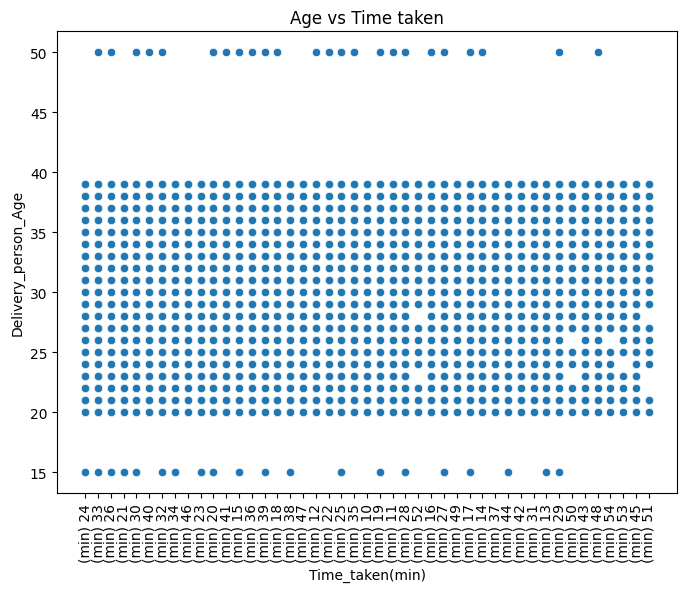

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(y=df['Delivery_person_Age'], x=df['Time_taken(min)'])
plt.xticks(rotation=90)
plt.title('Age vs Time taken')
plt.show()

* There is not correlation between Delivery Person's Age and Time taken to deliver the food.

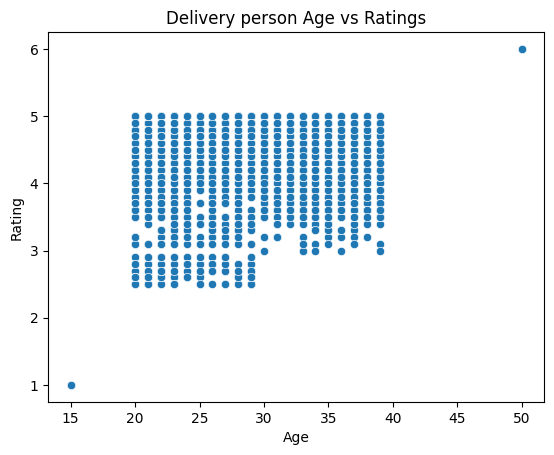

In [ ]:
sns.scatterplot(x=df['Delivery_person_Age'], y=df['Delivery_person_Ratings'])
plt.title("Delivery person Age vs Ratings")
plt.xlabel("Age")
plt.ylabel("Rating")
plt.show()

* There is a person with the age of 15 delivering the food, which is an outlier.

<ipython-input-20-a6ae4eb94752>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(festival_age, color='green')


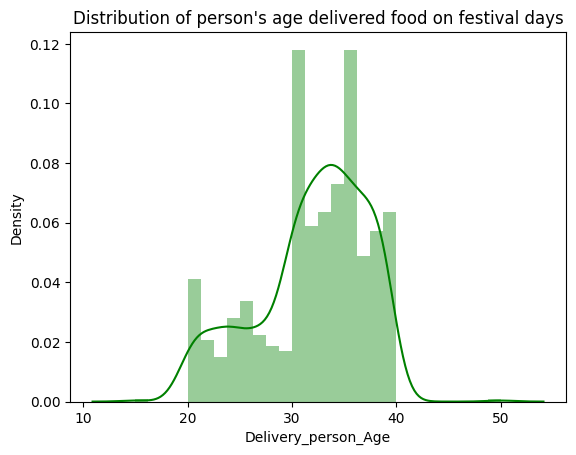

In [ ]:
festival_age = df[df['Festival'].str.strip().str.lower() == 'yes']['Delivery_person_Age']
sns.distplot(festival_age, color='green')
plt.title("Distribution of person's age delivered food on festival days")
plt.show()

* Most of the people in age range of 30-40 do deliveries during festival, where range 20-30 decreases during that time.

In [ ]:
deliveries_by_person_df

Number_of_Deliveries  Delivery_person_Age
Delivery_person_ID                                           
AGRRES010DEL01                        13                   34
AGRRES010DEL02                        14                   37
AGRRES010DEL03                        13                   33
AGRRES01DEL01                          9                   34
AGRRES01DEL02                         14                   24
...                                  ...                  ...
VADRES19DEL02                         58                   38
VADRES19DEL03                         38                   29
VADRES20DEL01                         56                   34
VADRES20DEL02                         49                   36
VADRES20DEL03                         34                   35

[1320 rows x 2 columns]

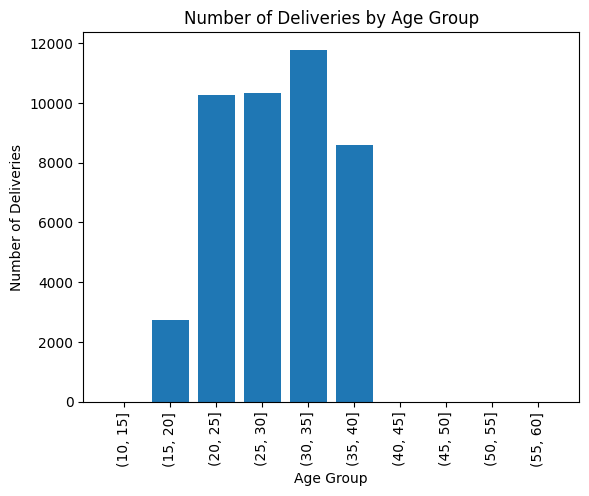

In [ ]:
deliveries_by_person_df = pd.DataFrame(df.groupby('Delivery_person_ID')['Delivery_person_Age'].count())
deliveries_by_person_df = deliveries_by_person_df.rename(columns = {'Delivery_person_Age': 'Number_of_Deliveries'})
deliveries_by_person_df['Delivery_person_Age'] = df.groupby('Delivery_person_ID')['Delivery_person_Age'].first().astype(int)

age_bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
deliveries_by_person_df['Delivery_Person_Age_group'] = pd.cut(deliveries_by_person_df['Delivery_person_Age'], bins=age_bins)
deliveries_by_age_group = deliveries_by_person_df.groupby('Delivery_Person_Age_group')['Number_of_Deliveries'].sum()
plt.bar(deliveries_by_age_group.index.astype(str), deliveries_by_age_group)

plt.xlabel('Age Group')
plt.ylabel('Number of Deliveries')
plt.title('Number of Deliveries by Age Group')
plt.xticks(rotation=90)
plt.show()

* Most of the deliveries are made by age range of (30, 35) followed by age range of (25, 30) and (20, 25).

## Delivery Person Ratings

<ipython-input-23-17e346c115bd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delivery_person_Ratings'], bins=10)


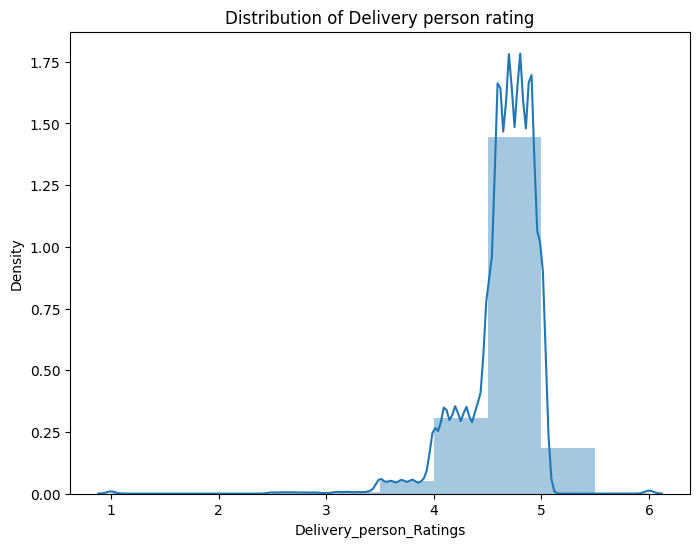

In [ ]:
plt.figure(figsize=(8, 6))
sns.distplot(df['Delivery_person_Ratings'], bins=10)
plt.title('Distribution of Delivery person rating')
plt.show()

* Most of the delivery person has rating between 4 and 5.
* There is a person with rating of 6. We can consider it as an outlier.

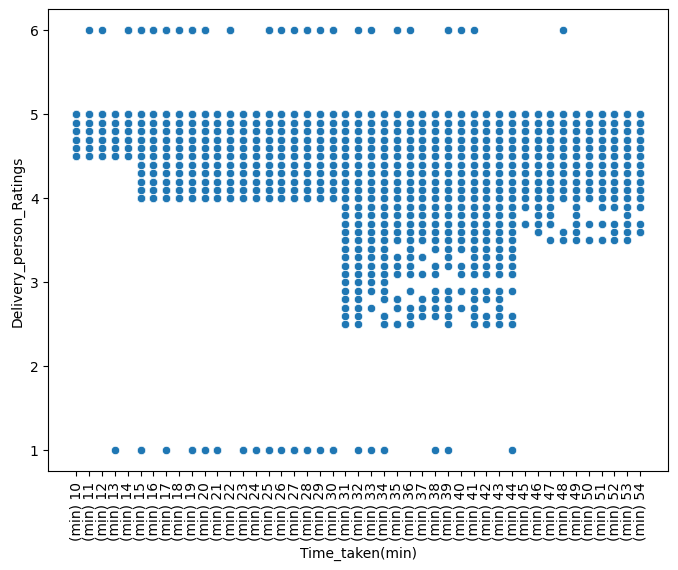

In [ ]:
plt.figure(figsize=(8, 6))
sorted_df = df.sort_values('Time_taken(min)')
sns.scatterplot(y=sorted_df['Delivery_person_Ratings'], x=sorted_df['Time_taken(min)'])
plt.xticks(rotation=90)
plt.show()

* There is no correlation between person's rating and time taken to deliver the food.

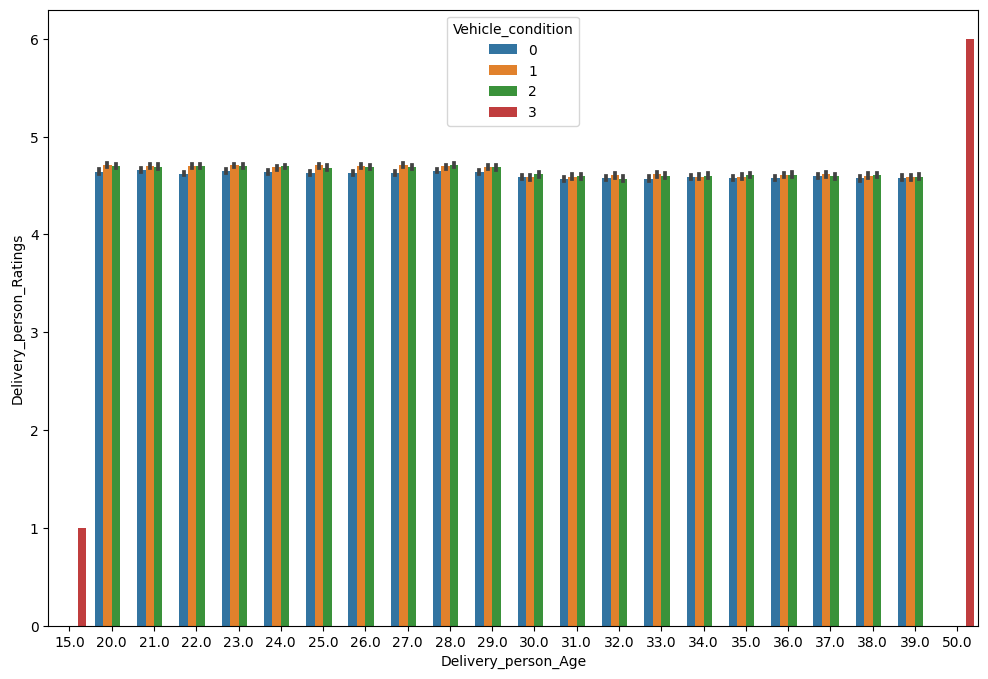

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df['Delivery_person_Age'], y=df['Delivery_person_Ratings'], hue=df['Vehicle_condition'])
plt.show()

* Vehicle condition does not influence the delivery person ratings.

In [ ]:
# df['Delivery_person_Age'].value_counts()
# grouped_ratings = df.groupby(['Festival', 'City'])['Delivery_person_Ratings'].mean().reset_index()

# plt.figure(figsize=(10, 6))
# sns.barplot(data=grouped_ratings, x='Festival', y='Delivery_person_Ratings', hue='City')
# plt.title('Delivery Person Ratings by Festival and City')
# plt.xlabel('Festival')
# plt.ylabel('Average Ratings')
# plt.legend(title='City')
# plt.show()

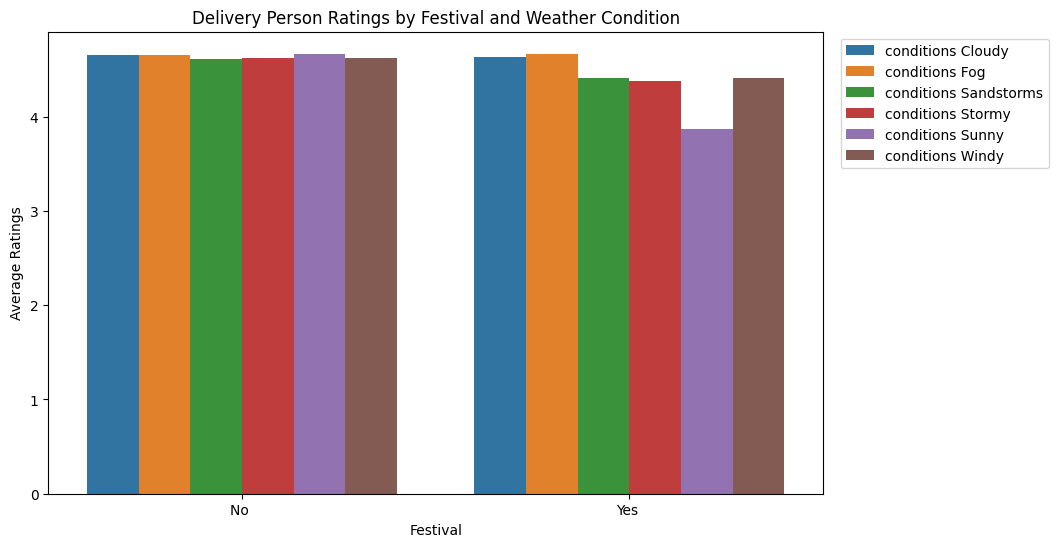

In [ ]:
grouped_ratings = df.groupby(['Festival', 'Weatherconditions'])['Delivery_person_Ratings'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_ratings, x='Festival', y='Delivery_person_Ratings', hue='Weatherconditions')
plt.title('Delivery Person Ratings by Festival and Weather Condition')
plt.xlabel('Festival')
plt.ylabel('Average Ratings')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

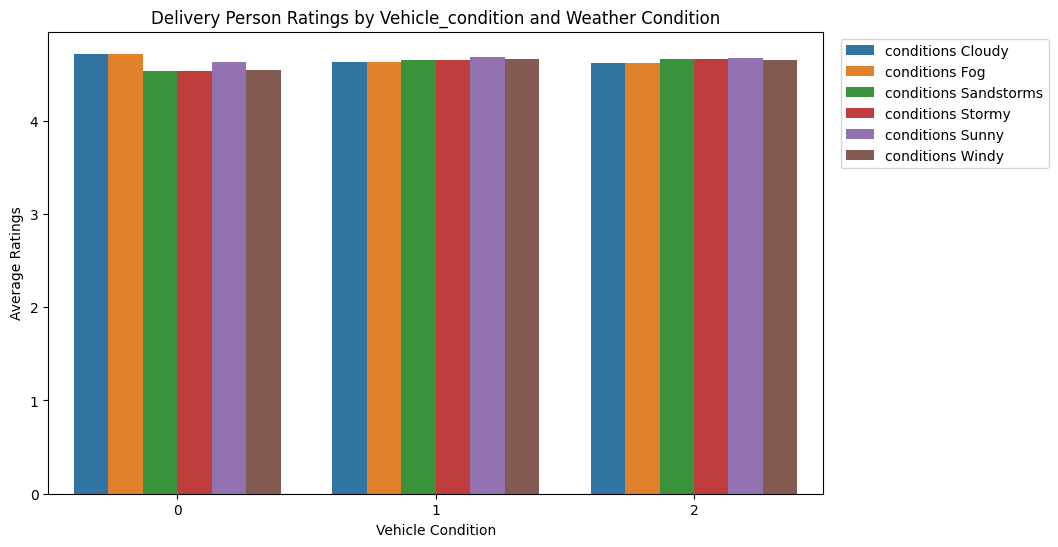

In [ ]:
grouped_ratings = df.groupby(['Vehicle_condition', 'Weatherconditions'])['Delivery_person_Ratings'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_ratings, x='Vehicle_condition', y='Delivery_person_Ratings', hue='Weatherconditions')
plt.title('Delivery Person Ratings by Vehicle_condition and Weather Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Average Ratings')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

* Vehicle condition and Weather Condition does not effect the Delivery person rating.

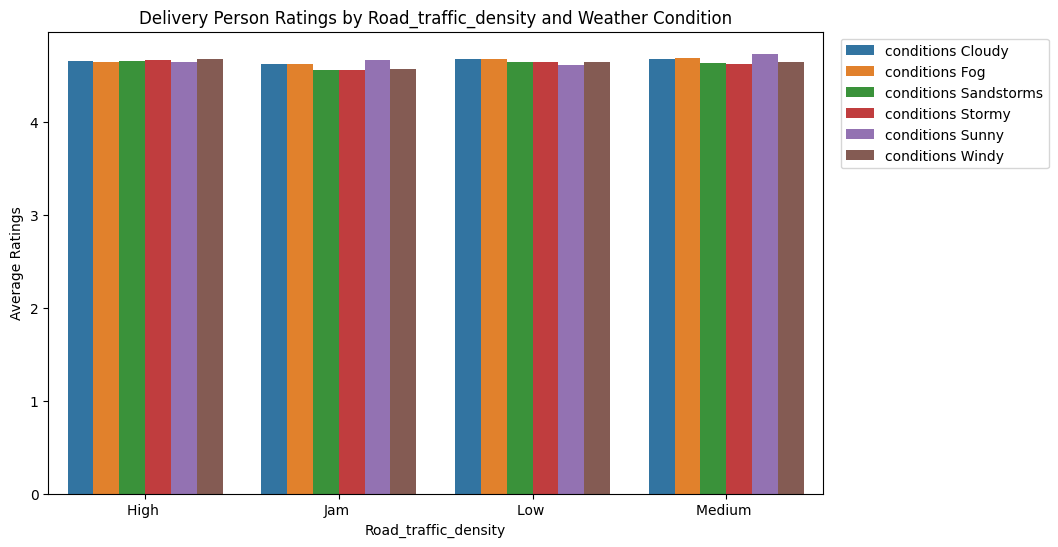

In [ ]:
grouped_ratings = df.groupby(['Road_traffic_density', 'Weatherconditions'])['Delivery_person_Ratings'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_ratings, x='Road_traffic_density', y='Delivery_person_Ratings', hue='Weatherconditions')
plt.title('Delivery Person Ratings by Road_traffic_density and Weather Condition')
plt.xlabel('Road_traffic_density')
plt.ylabel('Average Ratings')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

* Road traffic density and Weather Condition does not influence the delivery person rating.

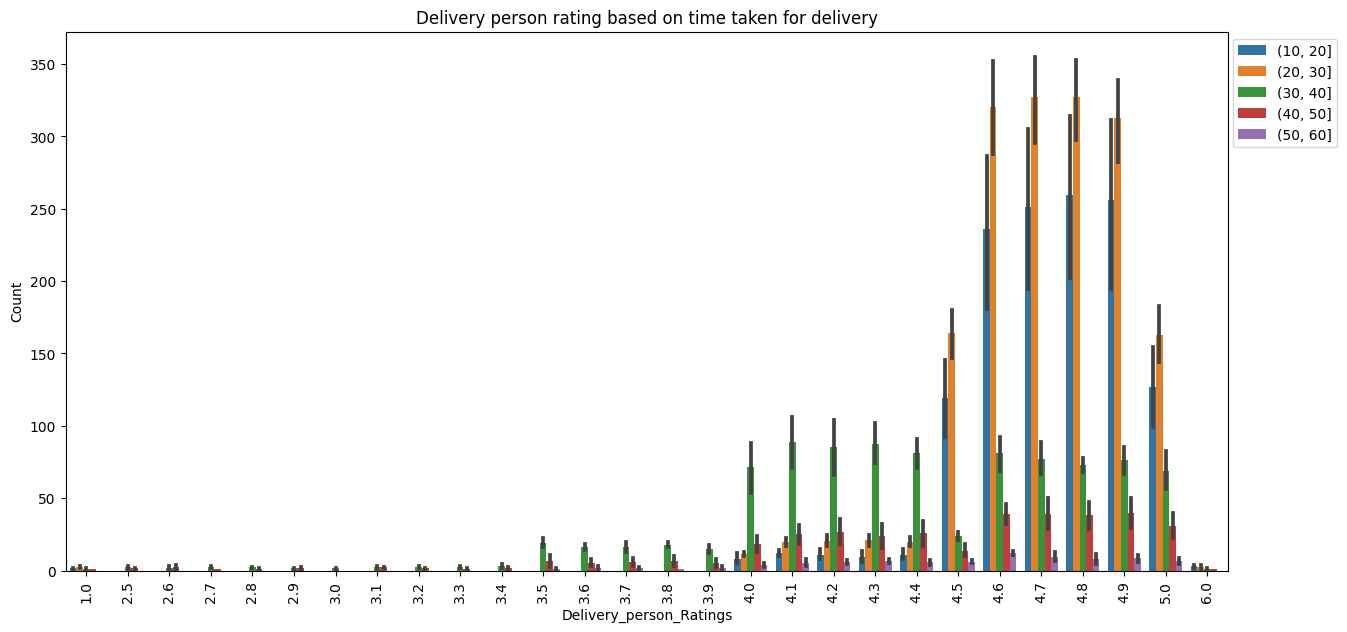

In [ ]:
plt.figure(figsize=(15, 7))
temp = df.groupby(['Delivery_person_Ratings'])['Time_taken(min)'].value_counts().sort_index().reset_index(name='Count')
temp['Time_taken(min)_grouped'] = temp['Time_taken(min)'].str.split(" ", expand=True)[1]

time_bins = [10, 20, 30, 40, 50, 60]
temp['Time_taken(min)_grouped'] = pd.to_numeric(temp['Time_taken(min)_grouped'], errors='coerce')
temp['Time_taken(min)_grouped'] = pd.cut(temp['Time_taken(min)_grouped'], bins=time_bins)
sns.barplot(x=temp['Delivery_person_Ratings'], y=temp['Count'], hue=temp['Time_taken(min)_grouped'])
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=90)
plt.title('Delivery person rating based on time taken for delivery')
plt.show()

* Delivery person with the low delivery time has higher delivery person rating.

## Restaurant Location Longitude and Latitude

In [ ]:
# Check for missing, zero, and NaN values in Restaurant longitude and latitude
missing_longitude = df['Restaurant_longitude'].isnull().sum()
missing_latitude = df['Restaurant_latitude'].isnull().sum()
zero_longitude = (df['Restaurant_longitude'] == 0).sum()
zero_latitude = (df['Restaurant_latitude'] == 0).sum()
nan_longitude = np.isnan(df['Restaurant_longitude']).sum()
nan_latitude = np.isnan(df['Restaurant_latitude']).sum()

print(f"Missing Restaurant longitude values: {missing_longitude}")
print(f"Missing Restaurant latitude values: {missing_latitude}")
print(f"Zero Restaurant longitude values: {zero_longitude}")
print(f"Zero Restaurant latitude values: {zero_latitude}")
print(f"NaN Restaurant longitude values: {nan_longitude}")
print(f"NaN Restaurant latitude values: {nan_latitude}")

Missing Restaurant longitude values: 0
Missing Restaurant latitude values: 0
Zero Restaurant longitude values: 3640
Zero Restaurant latitude values: 3640
NaN Restaurant longitude values: 0
NaN Restaurant latitude values: 0


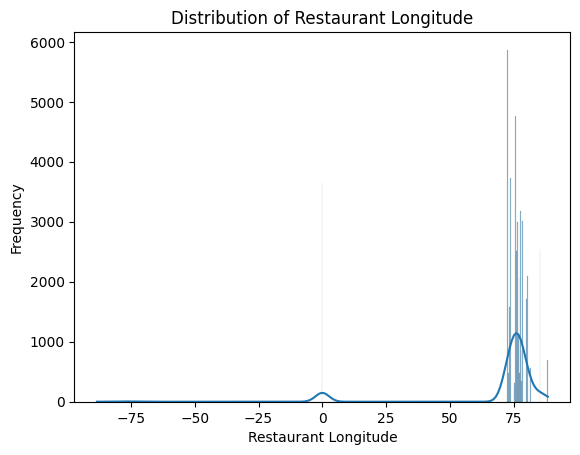

In [ ]:
# Visualize the distribution of Restaurant longitude
sns.histplot(df['Restaurant_longitude'], kde=True)
plt.xlabel('Restaurant Longitude')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Longitude')
plt.show()

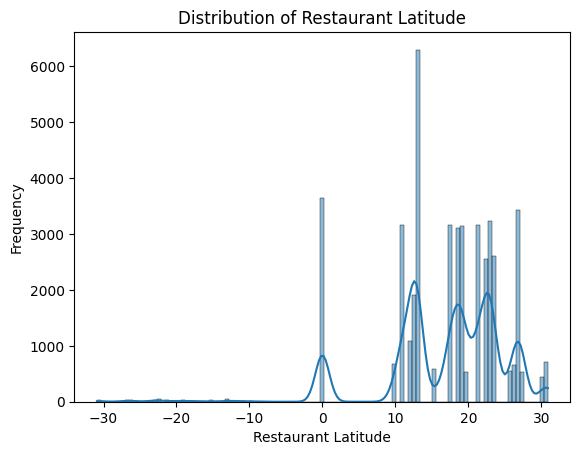

In [ ]:
# Visualize the distribution of Restaurant latitude
sns.histplot(df['Restaurant_latitude'], kde=True)
plt.xlabel('Restaurant Latitude')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Latitude')
plt.show()

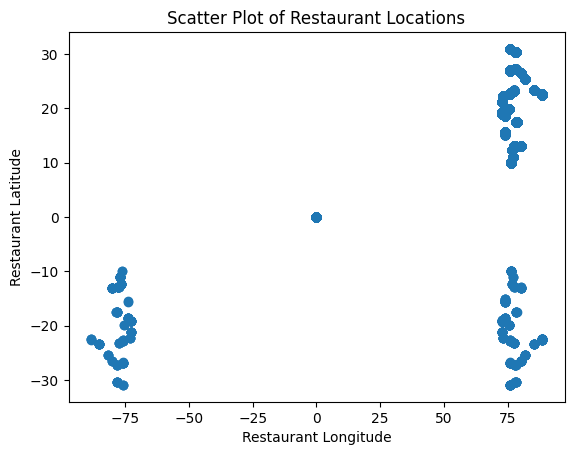

In [ ]:
# Scatter plot of Restaurant locations
plt.scatter(df['Restaurant_longitude'], df['Restaurant_latitude'])
plt.xlabel('Restaurant Longitude')
plt.ylabel('Restaurant Latitude')
plt.title('Scatter Plot of Restaurant Locations')
plt.show()

* Latitude and Longitude with negative values are considered as outliers.

In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap

map = df[['Restaurant_longitude', 'Restaurant_latitude','Delivery_location_longitude', 'Delivery_location_latitude']]
map = map[(map['Restaurant_latitude'] > 0) & (map['Restaurant_longitude'] > 0)]

restaurant_map = map[['Restaurant_latitude', 'Restaurant_longitude']].value_counts().sort_index().reset_index(name='Count')
# # restaurant_map
# bounds = [[22.699358, 88.563452], [108.22, 122.1290]]
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
HeatMap(data=restaurant_map[['Restaurant_latitude', 'Restaurant_longitude', 'Count']]).add_to(m)
m

Restaurant location plays an important role in deciding the time needed for delivery. Restaurant in busy locations are more affected by traffic conditions.

## Delivery Location Longitude and Latitude

In [ ]:
# Delivery location Map
Delivery_map = map[['Delivery_location_latitude', 'Delivery_location_longitude']].value_counts().sort_index().reset_index(name='Count')
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
# m.fit_bounds(bounds)
HeatMap(data=Delivery_map[['Delivery_location_latitude', 'Delivery_location_longitude', 'Count']]).add_to(m)
m

* Delivery location plays an important role in deciding the time needed for delivery. Delivery in busy locations are more affected by traffic conditions.

In [ ]:
restaurant_map

Restaurant_latitude  Restaurant_longitude  Count
0               9.957144             76.296783     41
1               9.959778             76.296106     39
2               9.960846             76.293936     27
3               9.966783             76.242981     31
4               9.970717             76.285447     30
..                   ...                   ...    ...
383            30.899584             75.809346     41
384            30.899992             75.831338     38
385            30.902872             75.826808     32
386            30.905562             75.832841     37
387            30.914057             75.839820     42

[388 rows x 3 columns]

In [ ]:
Delivery_map

Delivery_location_latitude  Delivery_location_longitude  Count
0                       9.967144                    76.306783      4
1                       9.969778                    76.306106      3
2                       9.970846                    76.303936      2
3                       9.976783                    76.252981      2
4                       9.977144                    76.316783      4
...                          ...                          ...    ...
4355                   31.039992                    75.971338      3
4356                   31.042872                    75.966808      2
4357                   31.044057                    75.969820      4
4358                   31.045562                    75.972841      3
4359                   31.054057                    75.979820      3

[4360 rows x 3 columns]

## Weather Condition

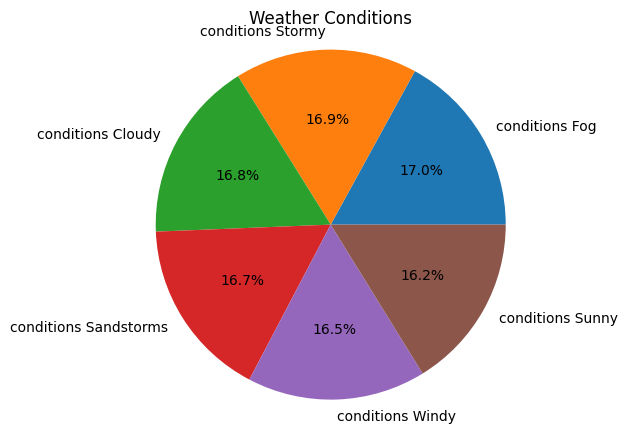

In [ ]:
plt.figure(figsize=(6, 5))
value_counts = df['Weatherconditions'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Weather Conditions')
plt.show()

* Equal distribution of Weather Condition. Less important to model.

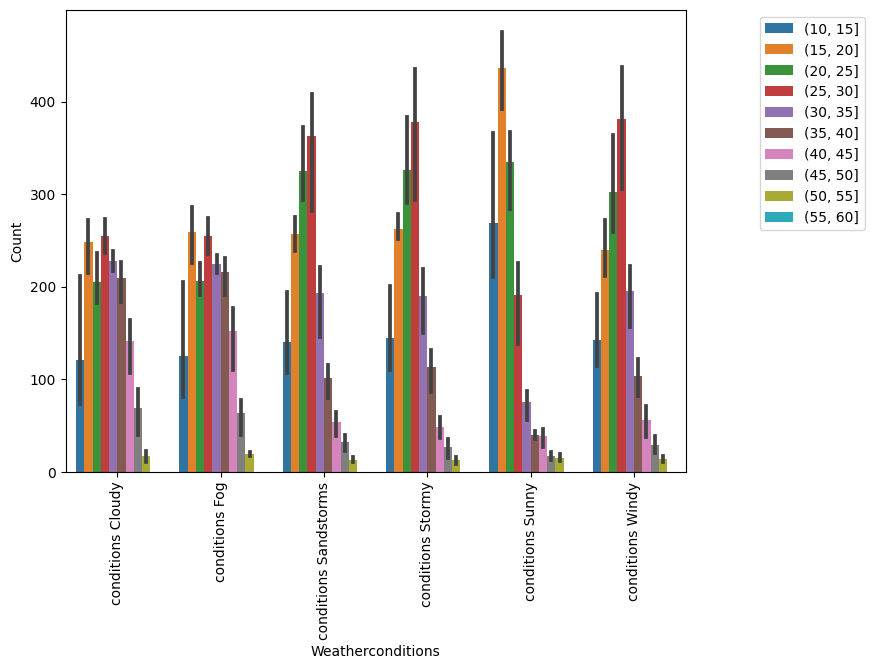

In [ ]:
plt.figure(figsize=(8, 6))
temp = df.groupby(['Weatherconditions'])['Time_taken(min)'].value_counts().sort_index().reset_index(name='Count')
temp['Time_taken(min)_grouped'] = temp['Time_taken(min)'].str.split(" ", expand=True)[1]

time_bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
temp['Time_taken(min)_grouped'] = pd.to_numeric(temp['Time_taken(min)_grouped'], errors='coerce')
temp['Time_taken(min)_grouped'] = pd.cut(temp['Time_taken(min)_grouped'], bins=time_bins)
sns.barplot(x=temp['Weatherconditions'], y=temp['Count'], hue=temp['Time_taken(min)_grouped'])
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

* In every weather condition most of the deliveries took 25-30 mins. However, on sunny day most of the deliveries took 10-15 mins.

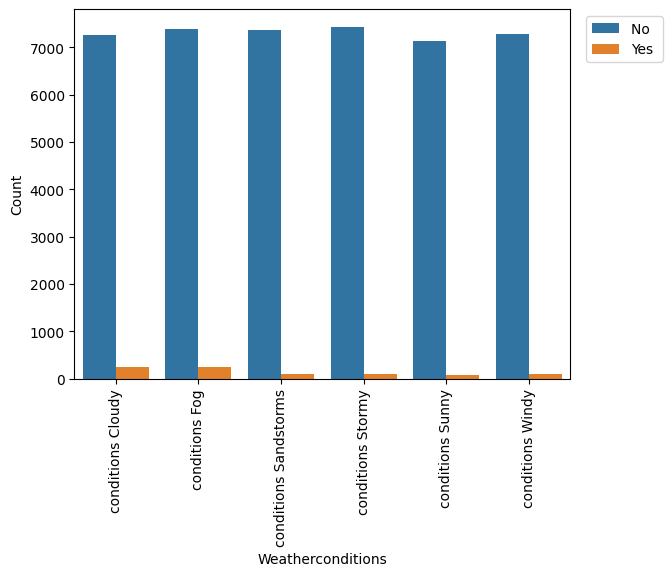

In [ ]:
temp = df.groupby(['Weatherconditions'])['Festival'].value_counts().sort_index().reset_index(name='Count')
sns.barplot(x=temp['Weatherconditions'], y=temp['Count'], hue=temp['Festival'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=90)
plt.show()

* On festival days more deliveries are being made during cloudy weather as people try to avoid going out in the rain.

## Road Traffic

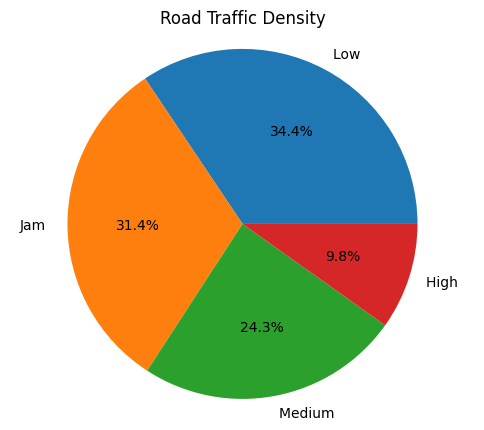

In [ ]:
plt.figure(figsize=(6, 5))
value_counts = df['Road_traffic_density'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Road Traffic Density')
plt.show()

* Most of the deliveries are made during Low and Jam traffic condition.

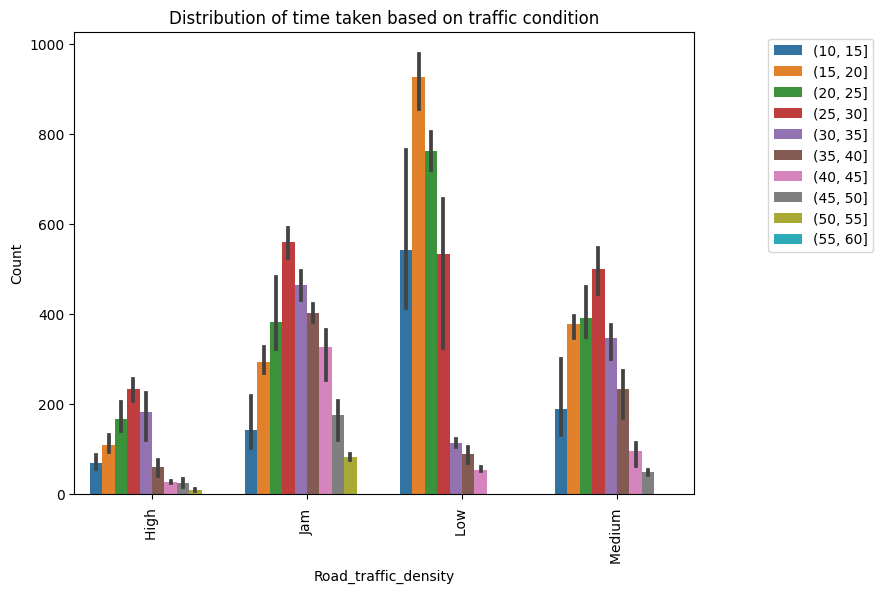

In [ ]:
plt.figure(figsize=(8, 6))
# Group the data by 'Road_traffic_density' and 'Time_taken(min)', count occurrences, and sort by index
temp = df.groupby(['Road_traffic_density'])['Time_taken(min)'].value_counts().sort_index().reset_index(name='Count')
temp['Time_taken(min)_grouped'] = temp['Time_taken(min)'].str.split(" ", expand=True)[1]

time_bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
temp['Time_taken(min)_grouped'] = pd.to_numeric(temp['Time_taken(min)_grouped'], errors='coerce')
temp['Time_taken(min)_grouped'] = pd.cut(temp['Time_taken(min)_grouped'], bins=time_bins)
sns.barplot(x=temp['Road_traffic_density'], y=temp['Count'], hue=temp['Time_taken(min)_grouped'])
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title('Distribution of time taken based on traffic condition')
plt.xticks(rotation=90)
plt.show()

* Road Traffic Density affects the Time taken for deliveries.
* Deliveries during low traffic does not take more than 45 mins while during Jam condition it took more than 45 mins to deliver some of the deliveries.

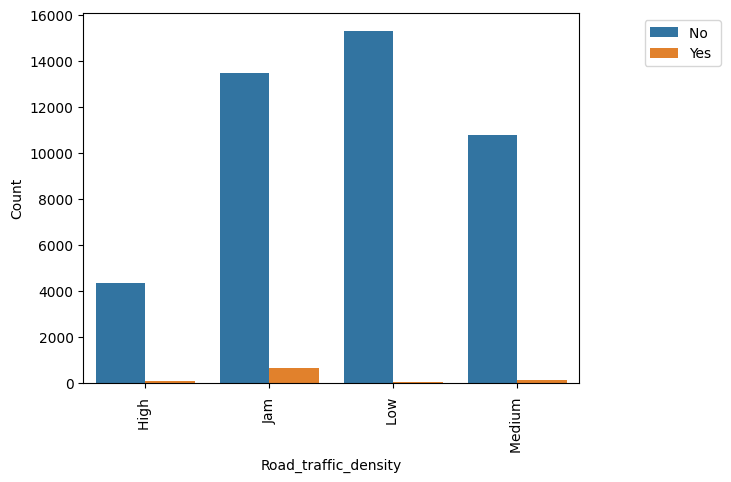

In [ ]:
# Group the data by 'Vehicle_condition' and 'Festival', count occurrences, and sort by index
temp = df.groupby(['Road_traffic_density'])['Festival'].value_counts().sort_index().reset_index(name='Count')
sns.barplot(x=temp['Road_traffic_density'], y=temp['Count'], hue=temp['Festival'])
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

* During the festival days, roads are Jam.

## Vehicle Condition

In [ ]:
df['Vehicle_condition'].value_counts()

2    15034
1    15030
0    15009
3      520
Name: Vehicle_condition, dtype: int64

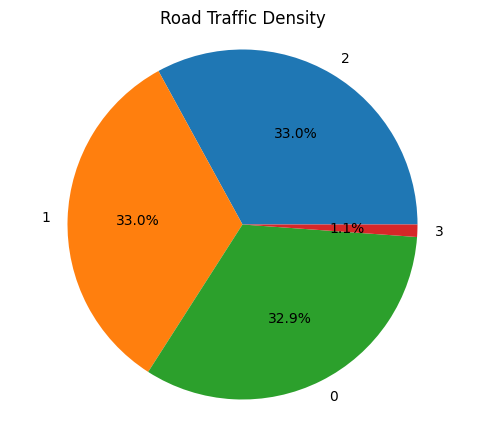

In [ ]:
plt.figure(figsize=(6, 5))
value_counts = df['Vehicle_condition'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Road Traffic Density')
plt.show()

* There are only few delivery person that uses vehicles with bad condition.

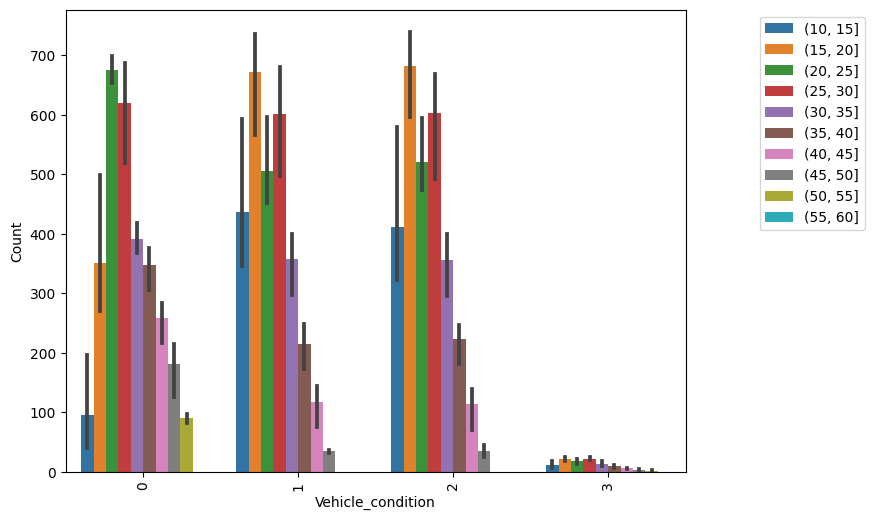

In [ ]:
plt.figure(figsize=(8, 6))

# Group the data by 'Vehicle_condition' and 'Time_taken(min)', count occurrences, and sort by index
temp = df.groupby(['Vehicle_condition'])['Time_taken(min)'].value_counts().sort_index().reset_index(name='Count')
temp['Time_taken(min)_grouped'] = temp['Time_taken(min)'].str.split(" ", expand=True)[1]

time_bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
temp['Time_taken(min)_grouped'] = pd.to_numeric(temp['Time_taken(min)_grouped'], errors='coerce')
temp['Time_taken(min)_grouped'] = pd.cut(temp['Time_taken(min)_grouped'], bins=time_bins)
sns.barplot(x=temp['Vehicle_condition'], y=temp['Count'], hue=temp['Time_taken(min)_grouped'])
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

* The best vehicle condition typically requires 20 to 25 minutes for food delivery, whereas vehicles in good and average conditions take 15 to 20 minutes for the same task.

## Festival

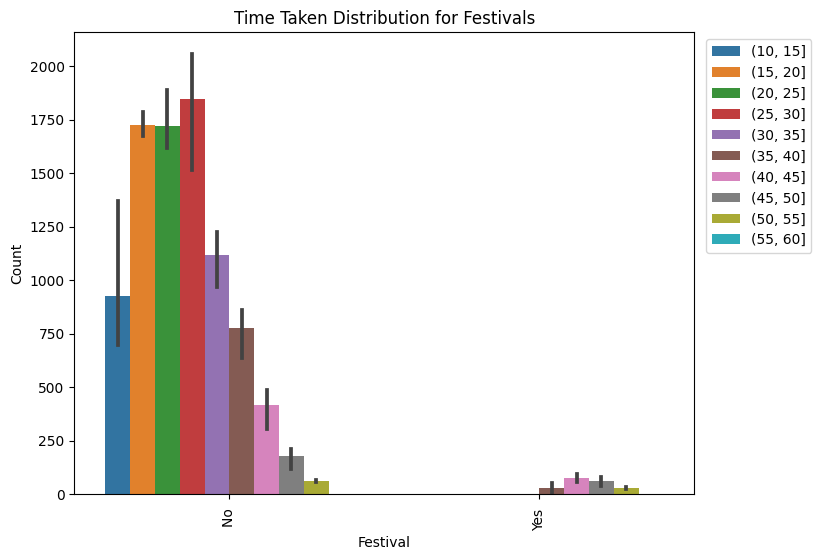

In [ ]:
plt.figure(figsize=(8, 6))

# Group the data by 'Festival' and 'Time_taken(min)', then calculate the counts and sort by index
temp = df.groupby(['Festival'])['Time_taken(min)'].value_counts().sort_index().reset_index(name='Count')

# Extract the minute values from 'Time_taken(min)' and create a new column 'Time_taken(min)_grouped'
temp['Time_taken(min)_grouped'] = temp['Time_taken(min)'].str.split(" ", expand=True)[1]

time_bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
temp['Time_taken(min)_grouped'] = pd.to_numeric(temp['Time_taken(min)_grouped'], errors='coerce')
temp['Time_taken(min)_grouped'] = pd.cut(temp['Time_taken(min)_grouped'], bins=time_bins)
sns.barplot(x=temp['Festival'], y=temp['Count'], hue=temp['Time_taken(min)_grouped'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title("Time Taken Distribution for Festivals")
plt.xticks(rotation=90)
plt.show()

* Delivery times were longer during festival days as opposed to regular days.

## Order date

In [ ]:
# Count the number of missing or null values in the "Order date" column
missing_values = df['Order_Date'].isnull().sum()
print("Number of missing or null values in Order date:", missing_values)

Number of missing or null values in Order date: 0


<ipython-input-51-2bb26b6f72c9>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Month_Year'] = pd.to_datetime(df['Order_Date']).dt.to_period('M')


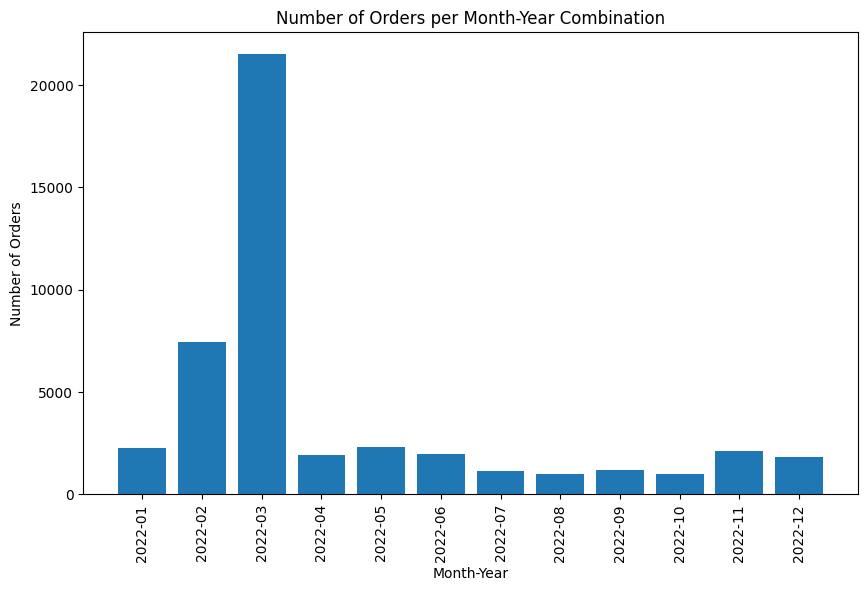

In [ ]:
# Histogram for number of orders per month/year

# Extract month and year from "Order_Date" column
df['Month_Year'] = pd.to_datetime(df['Order_Date']).dt.to_period('M')

# Count the number of orders per month-year combination
orders_per_month_year = df['Month_Year'].value_counts()

# Sort the values by month-year
orders_per_month_year = orders_per_month_year.sort_index()

plt.figure(figsize=(10, 6))
plt.bar(orders_per_month_year.index.astype(str), orders_per_month_year.values)
plt.xlabel('Month-Year')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month-Year Combination')
plt.xticks(rotation=90)
plt.show()

* March has the more than 20000 number of deliveries, which is higher than any other months in year 2022.

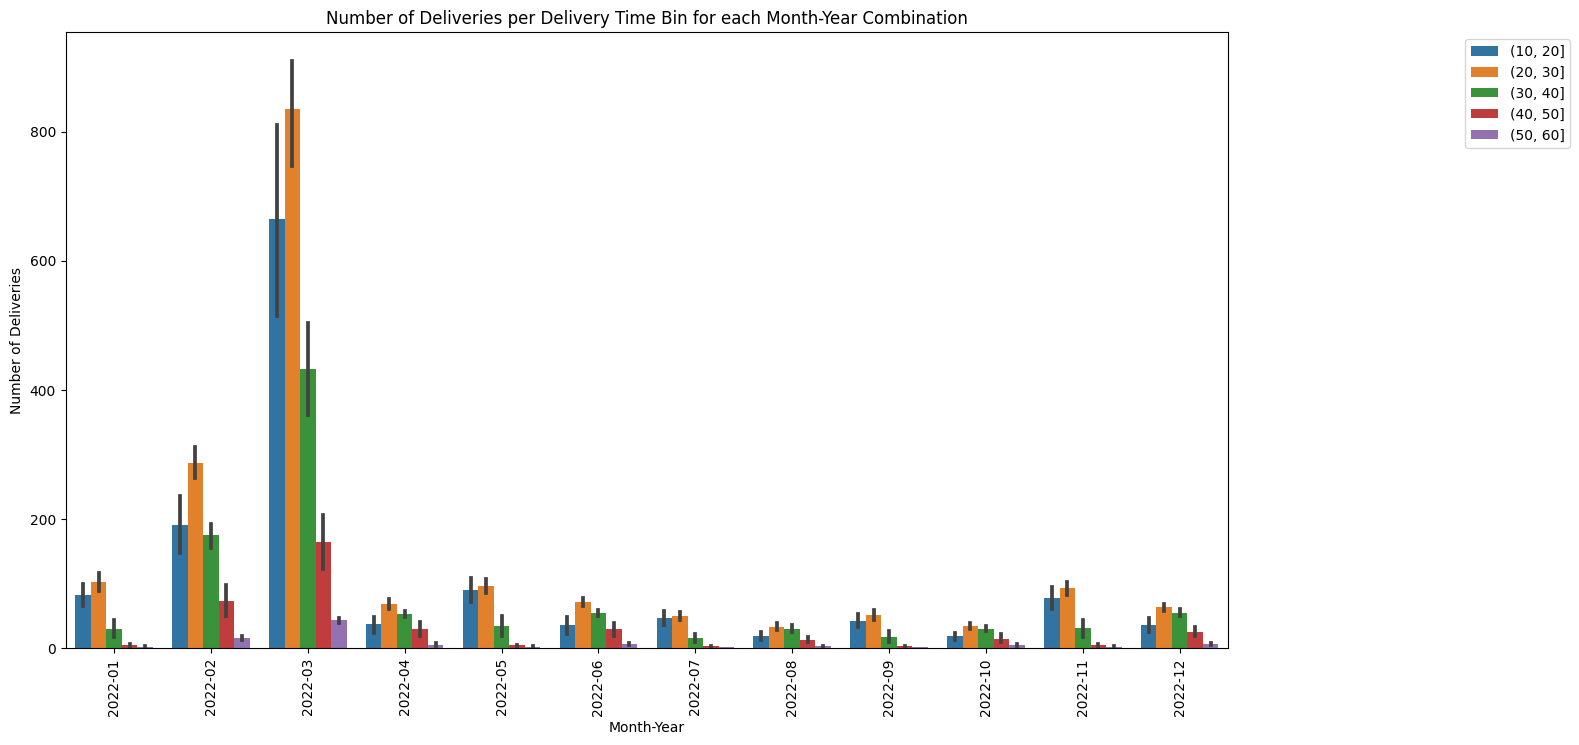

In [ ]:
# Define time bins
time_bins = [10, 20, 30, 40, 50, 60]

# Group by Month_Year and Time_taken(min), and count the number of deliveries per bin
temp = df.groupby(['Month_Year', 'Time_taken(min)']).size().reset_index(name='Count')
temp['Time_taken(min)_grouped'] = temp['Time_taken(min)'].str.split(" ", expand=True)[1]

# Convert the time component to numeric and categorize into time bins
temp['Time_taken(min)_grouped'] = pd.to_numeric(temp['Time_taken(min)_grouped'], errors='coerce')
temp['Time_taken(min)_grouped'] = pd.cut(temp['Time_taken(min)_grouped'], bins=time_bins)

# Plot the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Month_Year', y='Count', hue='Time_taken(min)_grouped', data=temp)
plt.xlabel('Month-Year')
plt.ylabel('Number of Deliveries')
plt.title('Number of Deliveries per Delivery Time Bin for each Month-Year Combination')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

* March 2022 had the most number of orders placed. Most of the orders in that month took average deliverey time of 15-20 mins.

## Time ordered and Time order picked

In [ ]:
missing_values_ordered = df['Time_Orderd'].isnull().sum()
nan_count_ordered = (df['Time_Orderd'] == 'NaN ').sum()

missing_values_picked = df['Time_Order_picked'].isnull().sum()
nan_count_picked = (df['Time_Order_picked'] == 'NaN ').sum()

print("Number of missing values in Time_Orderd:", missing_values_ordered)
print("Number of 'NaN' values in Time_Ordered:", nan_count_ordered)
print()
print("Number of missing values in Time_Order_picked:", missing_values_picked)
print("Number of 'NaN' values in Time_Order_Picked:", nan_count_picked)

Number of missing values in Time_Orderd: 1731
Number of 'NaN' values in Time_Ordered: 0

Number of missing values in Time_Order_picked: 0
Number of 'NaN' values in Time_Order_Picked: 0


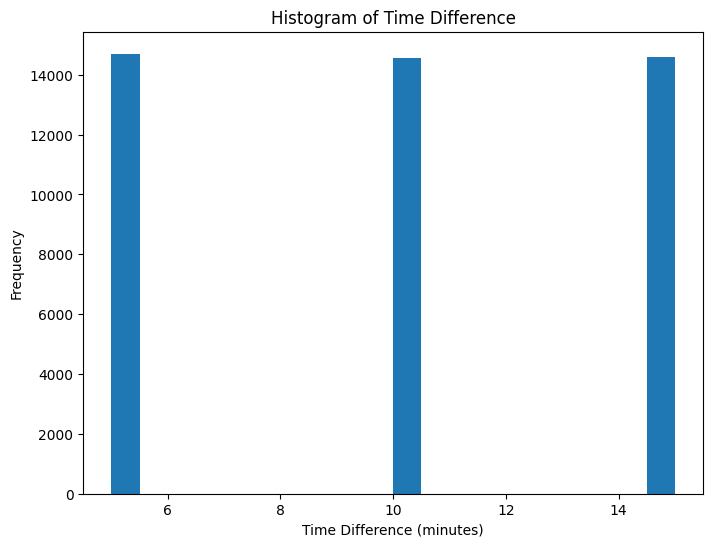

Statistics of Time Difference:
count    43862.000000
mean         9.989399
std          4.087516
min          5.000000
25%          5.000000
50%         10.000000
75%         15.000000
max         15.000000
Name: Time_Difference, dtype: float64


In [ ]:
# Calculate the time difference between Time_Order_picked and Time_Ordered
data_filtered = df[df['Time_Orderd'] != 'NaN '].copy()
data_filtered.reset_index(drop=True, inplace=True)

data_filtered['Time_Orderd'] = pd.to_datetime(data_filtered['Time_Orderd'], format='%H:%M:%S').dt.time
data_filtered['Time_Order_picked'] = pd.to_datetime(data_filtered['Time_Order_picked'], format='%H:%M:%S').dt.time

# Calculate the time difference between 'Time_Order_picked' and 'Time_Orderd' columns in minutes
data_filtered['Time_Difference'] = np.where(
    data_filtered['Time_Order_picked'] >= data_filtered['Time_Orderd'],
    (pd.to_timedelta(data_filtered['Time_Order_picked'].astype(str)) - pd.to_timedelta(data_filtered['Time_Orderd'].astype(str))).dt.total_seconds() / 60,
    (pd.to_timedelta(data_filtered['Time_Order_picked'].astype(str)) + pd.to_timedelta('1 day') - pd.to_timedelta(data_filtered['Time_Orderd'].astype(str))).dt.total_seconds() / 60
)

plt.figure(figsize=(8, 6))
plt.hist(data_filtered['Time_Difference'].dropna(), bins=20)
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Time Difference')
plt.show()

# Print the statistics of the time difference
time_diff_stats = data_filtered['Time_Difference'].describe()
print("Statistics of Time Difference:")
print(time_diff_stats)

<ipython-input-55-d3de744feb20>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_filtered['Month_Year'] = pd.to_datetime(data_filtered['Order_Date']).dt.to_period('M')


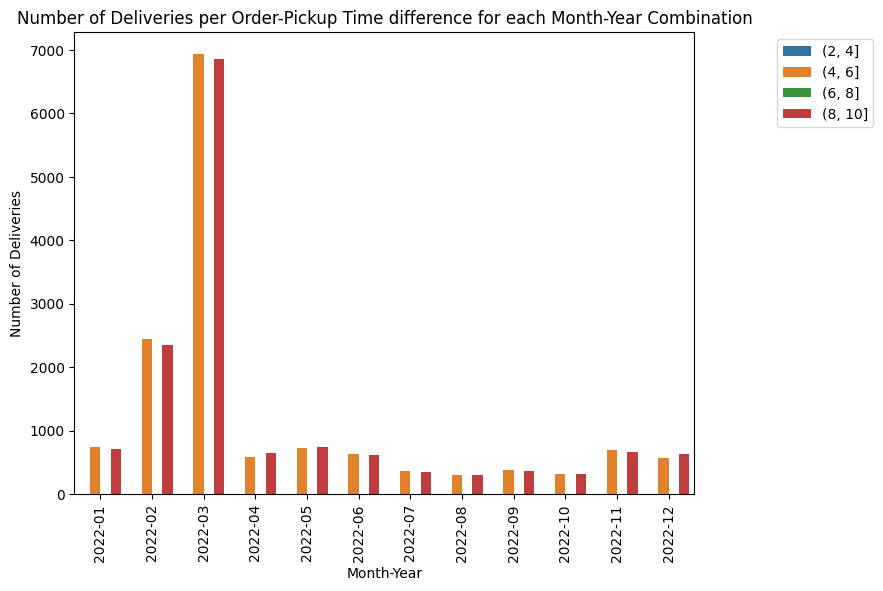

In [ ]:
# Define time bins
time_bins = [2, 4, 6, 8, 10]

data_filtered['Month_Year'] = pd.to_datetime(data_filtered['Order_Date']).dt.to_period('M')

temp = data_filtered.groupby(['Month_Year', 'Time_Difference']).size().reset_index(name='Count')
temp['Time_Difference_grouped'] = pd.cut(temp['Time_Difference'], bins=time_bins)

plt.figure(figsize=(8, 6))
sns.barplot(x='Month_Year', y='Count', hue='Time_Difference_grouped', data=temp)
plt.xlabel('Month-Year')
plt.ylabel('Number of Deliveries')
plt.title('Number of Deliveries per Order-Pickup Time difference for each Month-Year Combination')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

Most of the orders take 4-6 minutes or 8-10 minutes to be prepared.

## Type of order and Type of vehicle

In [ ]:
# Examine unique values in 'Type of order' column
unique_orders = df['Type_of_order'].unique()
print("Unique Orders:")
print(unique_orders)

# Examine unique values in 'Type of vehicle' column
unique_vehicles = df['Type_of_vehicle'].unique()
print("\nUnique Vehicles:")
print(unique_vehicles)

Unique Orders:
['Snack ' 'Drinks ' 'Buffet ' 'Meal ']

Unique Vehicles:
['motorcycle ' 'scooter ' 'electric_scooter ' 'bicycle ']


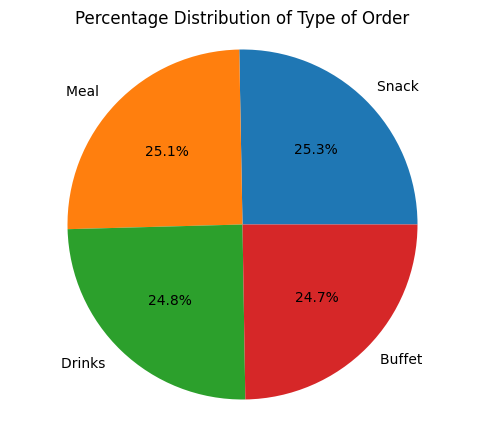

In [ ]:
plt.figure(figsize=(6, 5))
order_counts = df['Type_of_order'].value_counts()
plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage Distribution of Type of Order')
plt.show()

* Type of food has same distribution

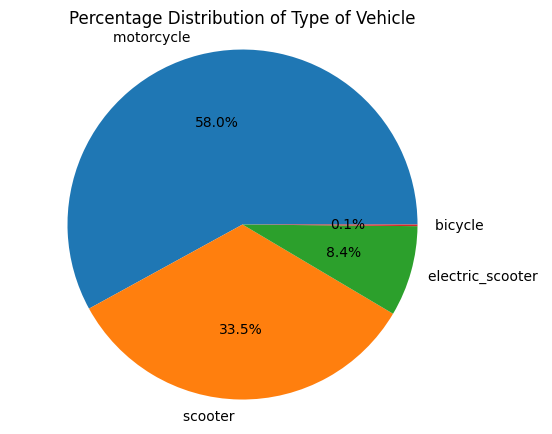

In [ ]:
plt.figure(figsize=(6, 5))
vehicle_counts = df['Type_of_vehicle'].value_counts()
plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Percentage Distribution of Type of Vehicle')
plt.show()

* Most of the deliveries are made by using motorcycle and scooter.

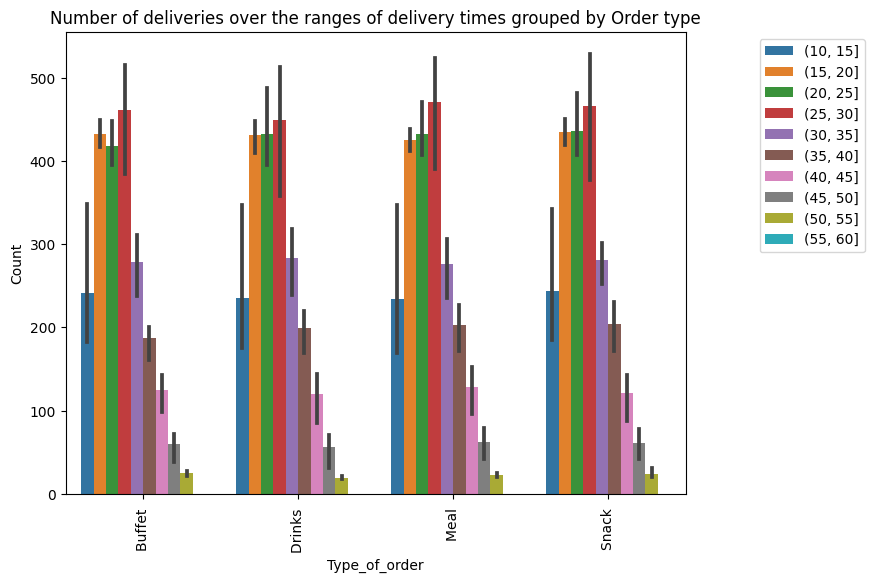

In [ ]:
plt.figure(figsize=(8, 6))
temp = df.groupby(['Type_of_order'])['Time_taken(min)'].value_counts().sort_index().reset_index(name='Count')
temp['Time_taken(min)_grouped'] = temp['Time_taken(min)'].str.split(" ", expand=True)[1]

time_bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
temp['Time_taken(min)_grouped'] = pd.to_numeric(temp['Time_taken(min)_grouped'], errors='coerce')
temp['Time_taken(min)_grouped'] = pd.cut(temp['Time_taken(min)_grouped'], bins=time_bins)
sns.barplot(x=temp['Type_of_order'], y=temp['Count'], hue=temp['Time_taken(min)_grouped'])
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.title('Number of deliveries over the ranges of delivery times grouped by Order type')
plt.show()

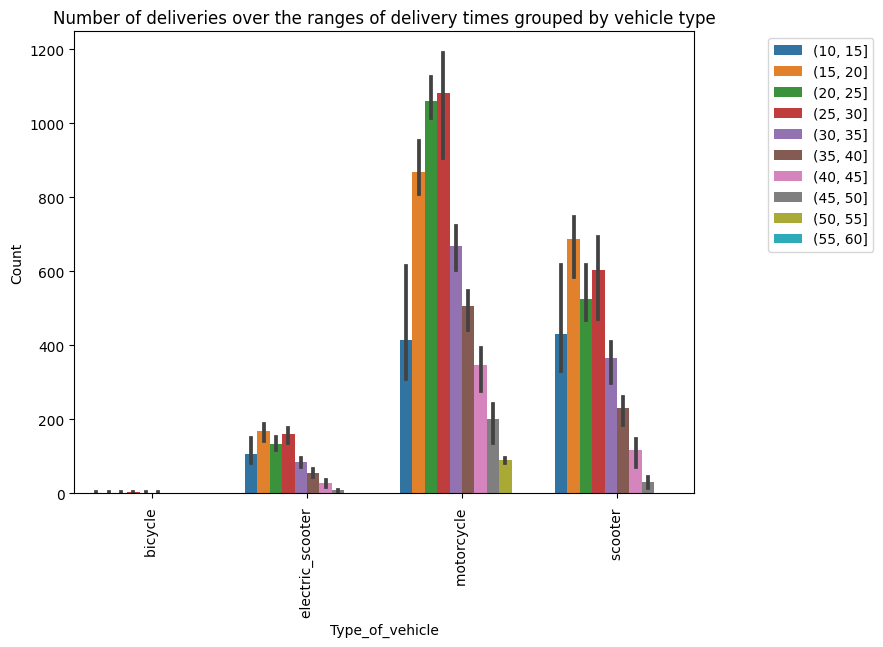

In [ ]:
plt.figure(figsize=(8, 6))
temp = df.groupby(['Type_of_vehicle'])['Time_taken(min)'].value_counts().sort_index().reset_index(name='Count')
temp['Time_taken(min)_grouped'] = temp['Time_taken(min)'].str.split(" ", expand=True)[1]

time_bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
temp['Time_taken(min)_grouped'] = pd.to_numeric(temp['Time_taken(min)_grouped'], errors='coerce')
temp['Time_taken(min)_grouped'] = pd.cut(temp['Time_taken(min)_grouped'], bins=time_bins)
sns.barplot(x=temp['Type_of_vehicle'], y=temp['Count'], hue=temp['Time_taken(min)_grouped'])
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.title('Number of deliveries over the ranges of delivery times grouped by vehicle type')
plt.show()

* Significant deliveries are typically delivered via motorcycles, with delivery times ranging from 25 to 30 minutes. On the other hand, scooters tend to complete major deliveries within a time frame of 15 to 20 minutes.

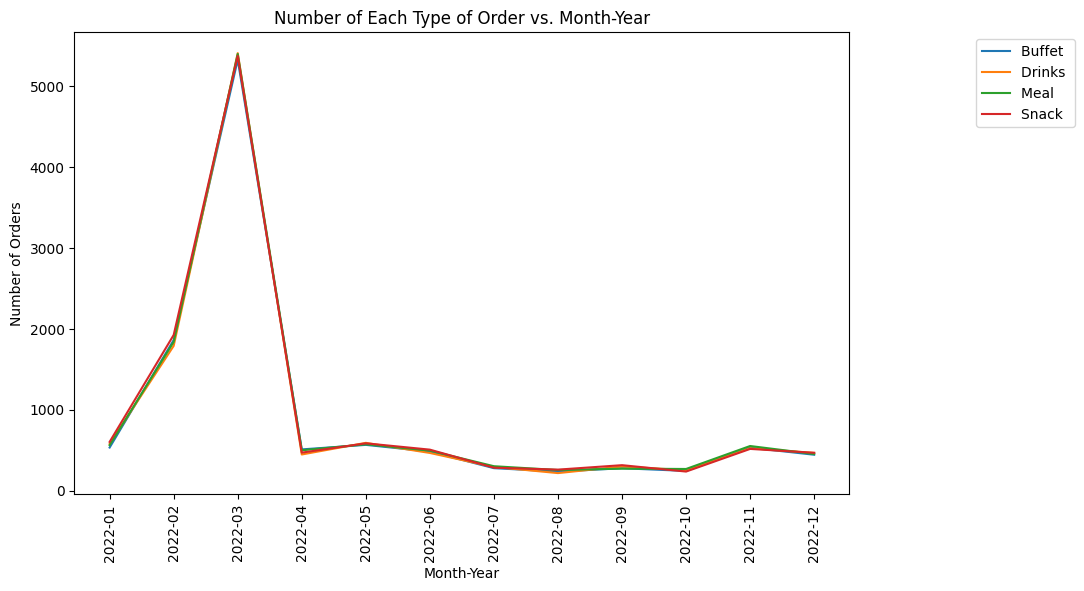

In [ ]:
# Group by Month_Year and Type_of_order, and count the number of each type of order per month-year combination
order_counts_per_month = data_filtered.groupby(['Month_Year', 'Type_of_order']).size().reset_index(name='Count')

# Convert "Month_Year" to string for plotting
order_counts_per_month['Month_Year'] = order_counts_per_month['Month_Year'].astype(str)

# Create a line graph
plt.figure(figsize=(10, 6))

# Loop through each type of order and plot a line for each
for order_type in order_counts_per_month['Type_of_order'].unique():
    order_type_data = order_counts_per_month[order_counts_per_month['Type_of_order'] == order_type]
    plt.plot(order_type_data['Month_Year'], order_type_data['Count'], label=order_type)

plt.xlabel('Month-Year')
plt.ylabel('Number of Orders')
plt.title('Number of Each Type of Order vs. Month-Year')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()

* No significant difference between order type over the given period of time.

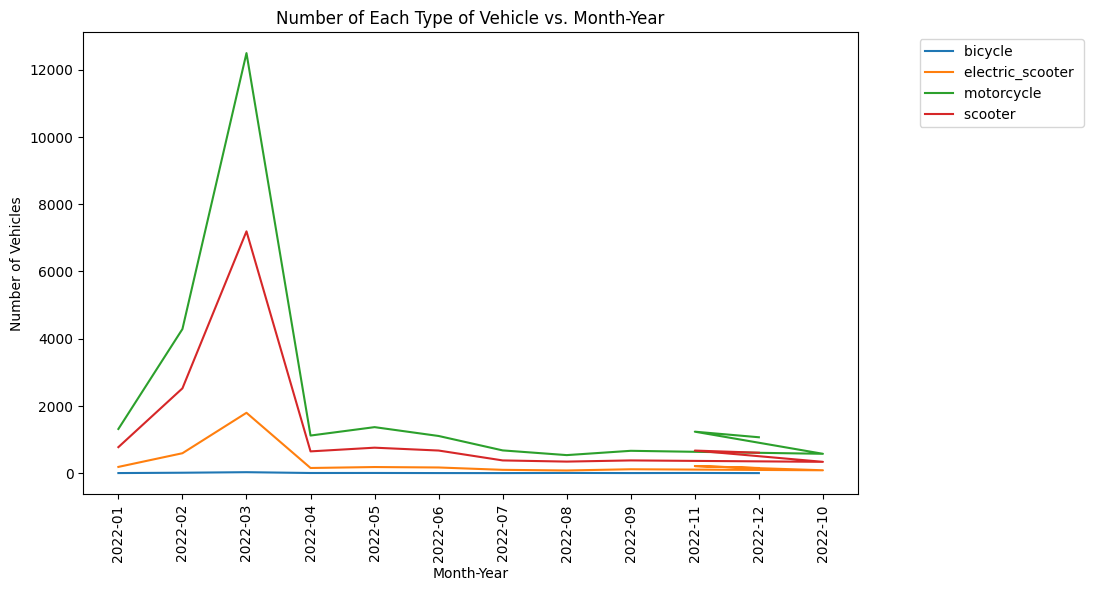

In [ ]:
vehicle_counts_per_month = data_filtered.groupby(['Month_Year', 'Type_of_vehicle']).size().reset_index(name='Count')

# Convert "Month_Year" to string for plotting
vehicle_counts_per_month['Month_Year'] = vehicle_counts_per_month['Month_Year'].astype(str)

# Create a line graph
plt.figure(figsize=(10, 6))

# Loop through each type of vehicle and plot a line for each
for vehicle_type in vehicle_counts_per_month['Type_of_vehicle'].unique():
    vehicle_type_data = vehicle_counts_per_month[vehicle_counts_per_month['Type_of_vehicle'] == vehicle_type]
    plt.plot(vehicle_type_data['Month_Year'], vehicle_type_data['Count'], label=vehicle_type)

plt.xlabel('Month-Year')
plt.ylabel('Number of Vehicles')
plt.title('Number of Each Type of Vehicle vs. Month-Year')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=90)
plt.show()


The number of deliveries across order types and vehicle types have been consistent throughout the months. Most of the orders were delivered on the motorcycles while the bicycle is the least used vehicle for delivery.

## Multiple deliveries

In [ ]:
# Count the number of rows with NaN string values in "Multiple Deliveries" column
nan_rows_count = df[df['multiple_deliveries'] == 'NaN '].shape[0]
print("Number of rows with NaN values in 'Multiple Deliveries' column:", nan_rows_count)

Number of rows with NaN values in 'Multiple Deliveries' column: 0


Number of Deliveries with Multiple Deliveries (excluding NaN): 33212.0
Percentage of Deliveries with Multiple Deliveries (excluding NaN): 72.84%


<ipython-input-64-c576e7e90889>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  filtered_data.loc[:, 'multiple_deliveries'] = pd.to_numeric(filtered_data['multiple_deliveries'])


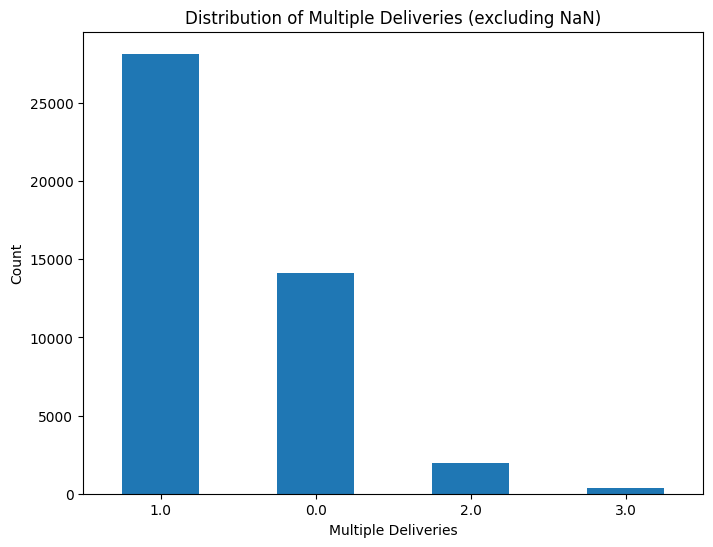

In [ ]:
# Filter the rows with non-NaN string values in "Multiple Deliveries" column
filtered_data = df[df['multiple_deliveries'] != 'NaN '].copy()

# Convert the values in "multiple_deliveries" column to numeric
filtered_data.loc[:, 'multiple_deliveries'] = pd.to_numeric(filtered_data['multiple_deliveries'])

# Count the number of deliveries with multiple deliveries
multiple_deliveries_count = filtered_data['multiple_deliveries'].sum()

# Calculate the percentage of deliveries with multiple deliveries
total_deliveries = len(filtered_data)
percentage_multiple_deliveries = (multiple_deliveries_count / total_deliveries) * 100

# Print the results
print("Number of Deliveries with Multiple Deliveries (excluding NaN):", multiple_deliveries_count)
print("Percentage of Deliveries with Multiple Deliveries (excluding NaN): {:.2f}%".format(percentage_multiple_deliveries))

# Plot the distribution of multiple deliveries
plt.figure(figsize=(8, 6))
filtered_data['multiple_deliveries'].value_counts().plot(kind='bar')
plt.xlabel('Multiple Deliveries')
plt.ylabel('Count')
plt.title('Distribution of Multiple Deliveries (excluding NaN)')
plt.xticks(rotation=0)
plt.show()

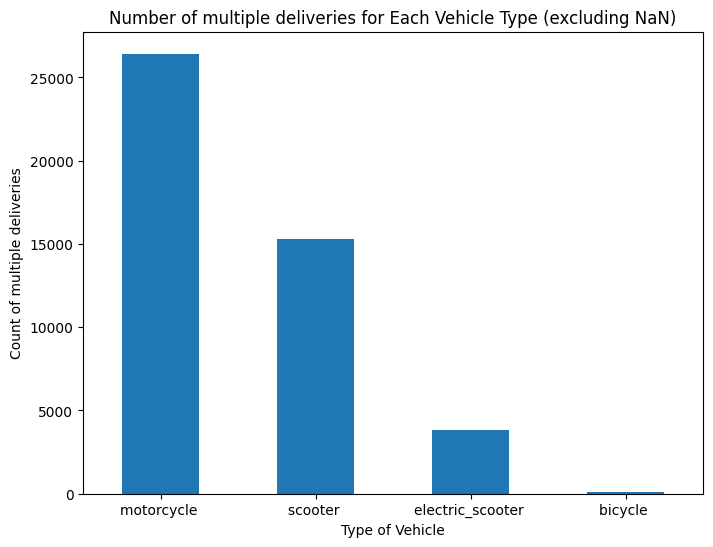

In [ ]:
# Plot the distribution of multiple deliveries
plt.figure(figsize=(8, 6))
vehicle_counts = filtered_data['Type_of_vehicle'].value_counts()
vehicle_counts.plot(kind='bar')
plt.xlabel('Type of Vehicle')
plt.ylabel('Count of multiple deliveries')
plt.title('Number of multiple deliveries for Each Vehicle Type (excluding NaN)')
plt.xticks(rotation=0)
plt.show()

* Motorcycles are primarily utilized for significant deliveries.

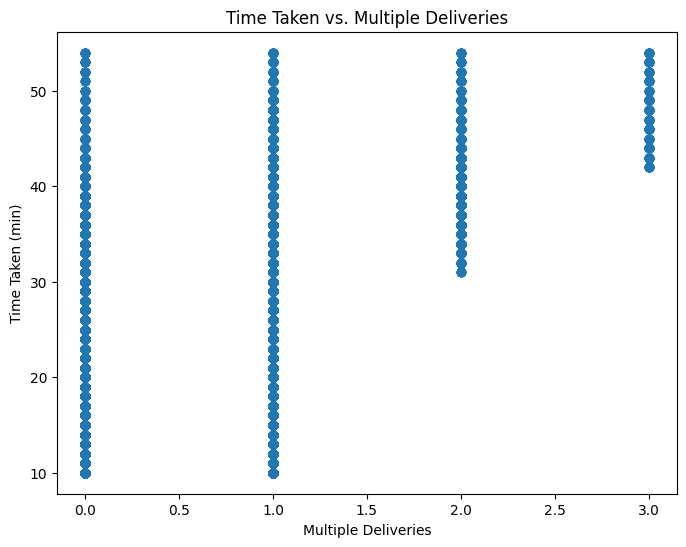

In [ ]:
# Convert the values in "multiple_deliveries" column to numeric
filtered_data['multiple_deliveries'] = pd.to_numeric(filtered_data['multiple_deliveries'])
filtered_data['Time_taken(min)_grouped'] = filtered_data['Time_taken(min)'].str.split(" ", expand=True)[1]

# Convert the values in "multiple_deliveries" column to numeric
filtered_data['multiple_deliveries'] = pd.to_numeric(filtered_data['multiple_deliveries'])

# Convert the 'Time_taken(min)_grouped' column to numeric
filtered_data['Time_taken(min)_grouped'] = pd.to_numeric(filtered_data['Time_taken(min)_grouped'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_data['multiple_deliveries'], filtered_data['Time_taken(min)_grouped'])
plt.xlabel('Multiple Deliveries')
plt.ylabel('Time Taken (min)')
plt.title('Time Taken vs. Multiple Deliveries')
plt.show()

Multiple deliveries cause an increase in the time taken for the delivery. 2-3 combined deliveries need a large amount of time to reach the customer as opposed to 0-1 multiple deliveries.

## City

In [ ]:
# Count of each unique value in the 'City' column
city_counts = df['City'].value_counts()

# Count of entries equal to string 'NaN' in the 'City' column
nan_count = (df['City'] == 'NaN ').sum()

# Percentage of entries equal to string 'NaN'
nan_percentage = (nan_count / len(df)) * 100

print("Count of each unique value in the 'City' column:")
print(city_counts)

print("\nNumber of entries equal to 'NaN' in the 'City' column:", nan_count)
print("Percentage of entries equal to 'NaN': {:.2f}%".format(nan_percentage))


Count of each unique value in the 'City' column:
Metropolitian     34093
Urban             10136
Semi-Urban          164
Name: City, dtype: int64

Number of entries equal to 'NaN' in the 'City' column: 0
Percentage of entries equal to 'NaN': 0.00%


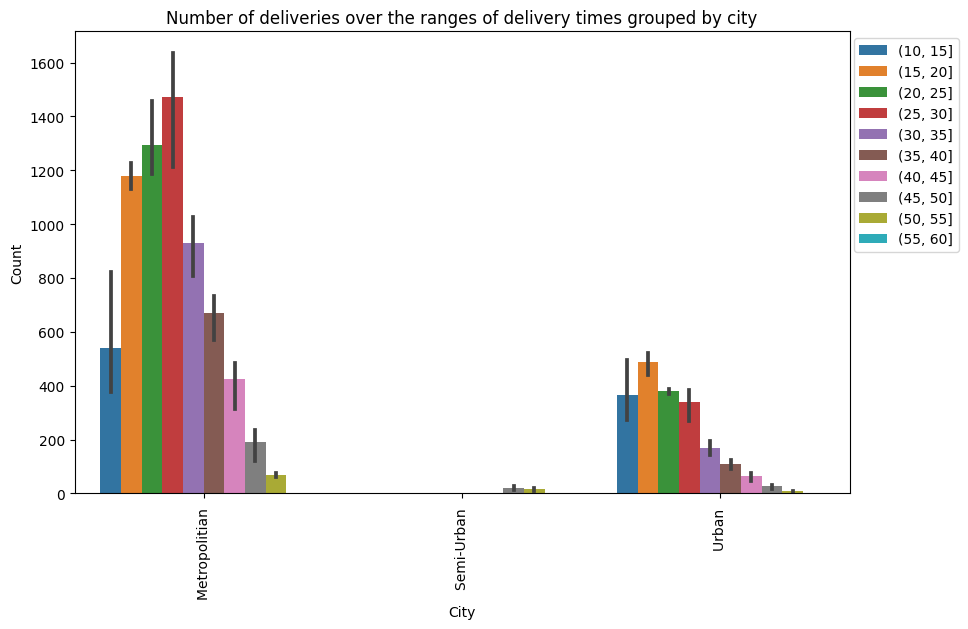

In [ ]:
plt.figure(figsize=(10, 6))
temp = df.groupby(['City'])['Time_taken(min)'].value_counts().sort_index().reset_index(name='Count')
temp['Time_taken(min)_grouped'] = temp['Time_taken(min)'].str.split(" ", expand=True)[1]

time_bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
temp['Time_taken(min)_grouped'] = pd.to_numeric(temp['Time_taken(min)_grouped'], errors='coerce')
temp['Time_taken(min)_grouped'] = pd.cut(temp['Time_taken(min)_grouped'], bins=time_bins)
sns.barplot(x=temp['City'], y=temp['Count'], hue=temp['Time_taken(min)_grouped'])
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=90)
plt.title('Number of deliveries over the ranges of delivery times grouped by city')
plt.show()

In metropolitian cities, most of the deliveries take 25-30 mins, while in urban cities, most of the deliveries take 15-20 mins. Thus, the average time required for order deliveries is more in the metropolitian cities.

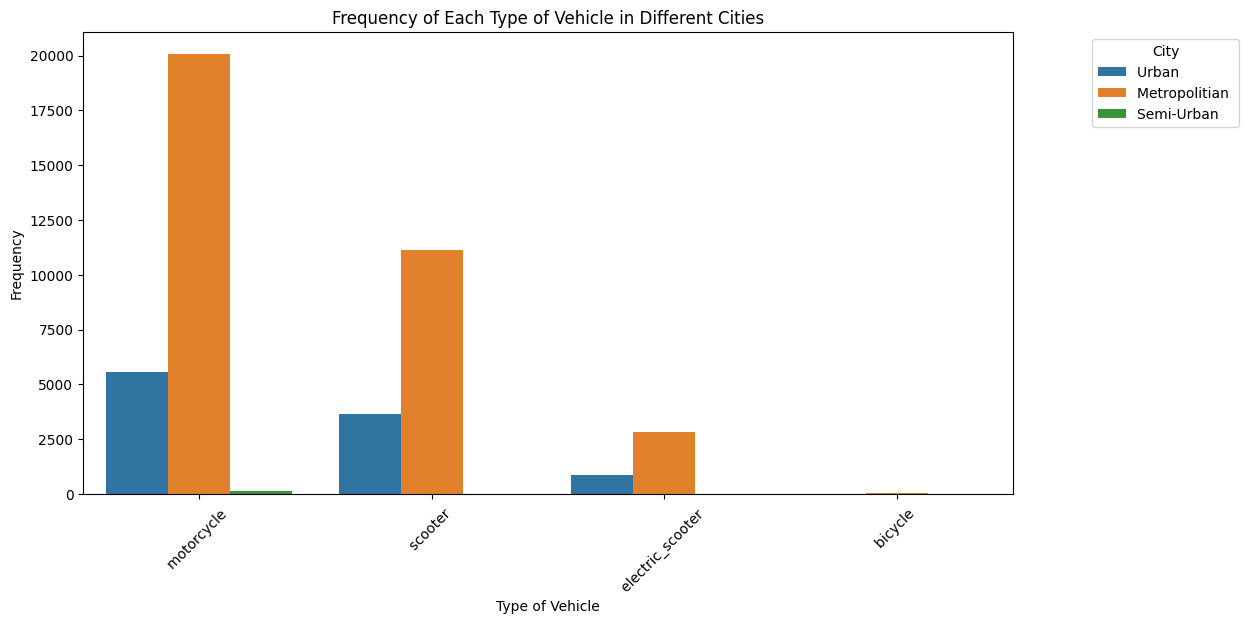

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Type_of_vehicle', hue='City', data=df)
plt.xlabel('Type of Vehicle')
plt.ylabel('Frequency')
plt.title('Frequency of Each Type of Vehicle in Different Cities')
plt.legend(title='City', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=45)
plt.show()

Motorcycle is the most widely used vehicle in all of the types of cities, while bicycle is the least popular vehicle.

## Time Taken

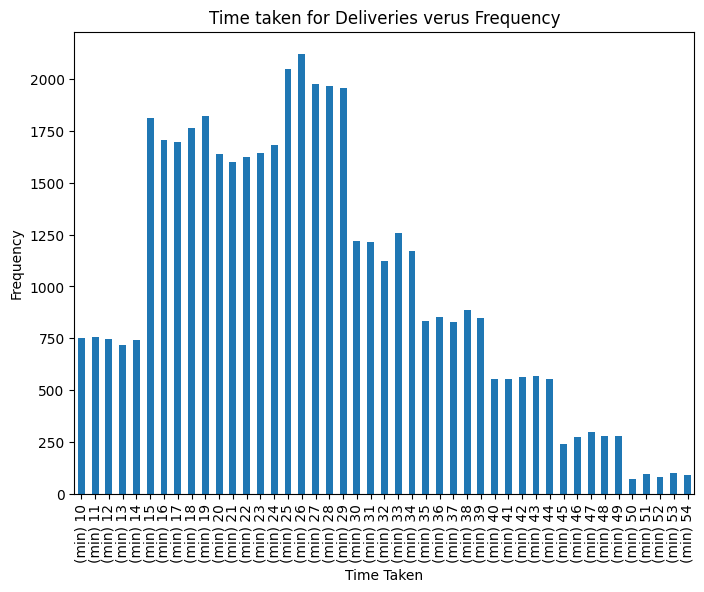

In [ ]:
plt.figure(figsize=(8, 6))
df['Time_taken(min)'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Time Taken')
plt.ylabel('Frequency')
plt.title('Time taken for Deliveries verus Frequency')
plt.show()

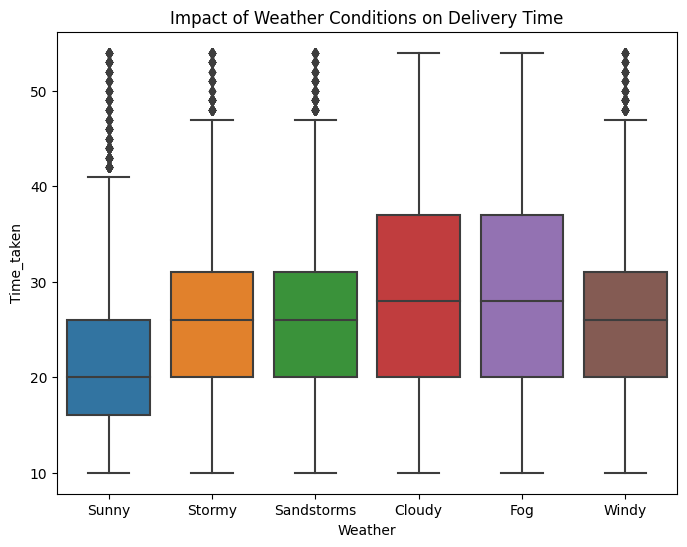

In [ ]:
# Boxplot Analysis with respect to Time taken: Weather Condition
plt.figure(figsize=(8, 6))
temp = pd.DataFrame()
temp['Time_taken'] = df['Time_taken(min)'].str.split(" ", expand=True)[1]
temp['Weather'] = df['Weatherconditions'].str.split(" ", expand=True)[1]
temp['Time_taken'] = temp['Time_taken'].astype(int)
sns.boxplot(y=temp['Time_taken'], x=temp['Weather'])
plt.title("Impact of Weather Conditions on Delivery Time")
plt.show()

* Cloudy and fog weather condition took more time to deliver food compare to other weather conditions.

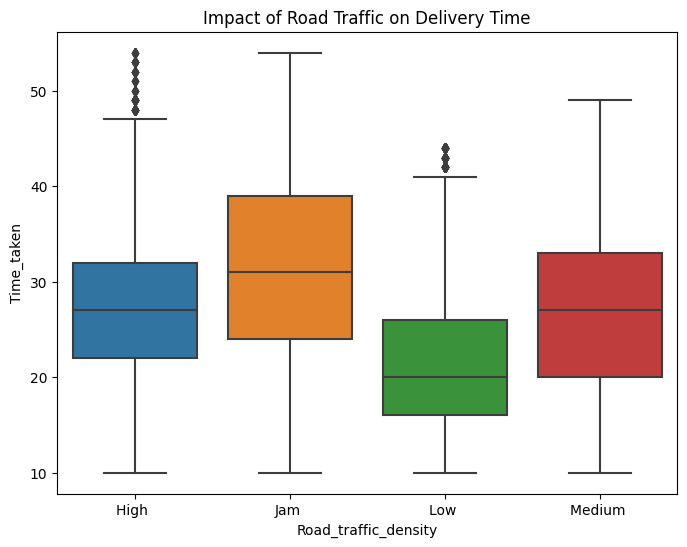

In [ ]:
# Boxplot Analysis with respect to Time taken: Road Traffic Density
plt.figure(figsize=(8, 6))
temp = pd.DataFrame()
temp['Time_taken'] = df['Time_taken(min)'].str.split(" ", expand=True)[1]
temp['Time_taken'] = temp['Time_taken'].astype(int)
sns.boxplot(y=temp['Time_taken'], x=df['Road_traffic_density'])
plt.title("Impact of Road Traffic on Delivery Time")
plt.show()

* Appears to be a promising correlation between road traffic density and the duration it takes to deliver food.

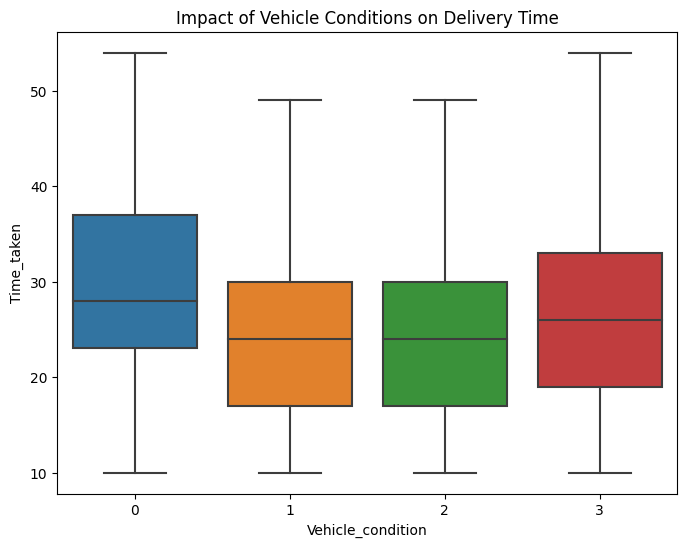

In [ ]:
# Boxplot Analysis with respect to Time taken: Vehicle Condition
plt.figure(figsize=(8, 6))
temp = pd.DataFrame()
temp['Time_taken'] = df['Time_taken(min)'].str.split(" ", expand=True)[1]
temp['Time_taken'] = temp['Time_taken'].astype(int)
sns.boxplot(y=temp['Time_taken'], x=df['Vehicle_condition'])
plt.title("Impact of Vehicle Conditions on Delivery Time")
plt.show()

* There is a slight correlation between vehicle condition and time taken to deliver the food.
* Even there is a low number of deliveries made by person whose vehicle condition is poor, has taken max time.

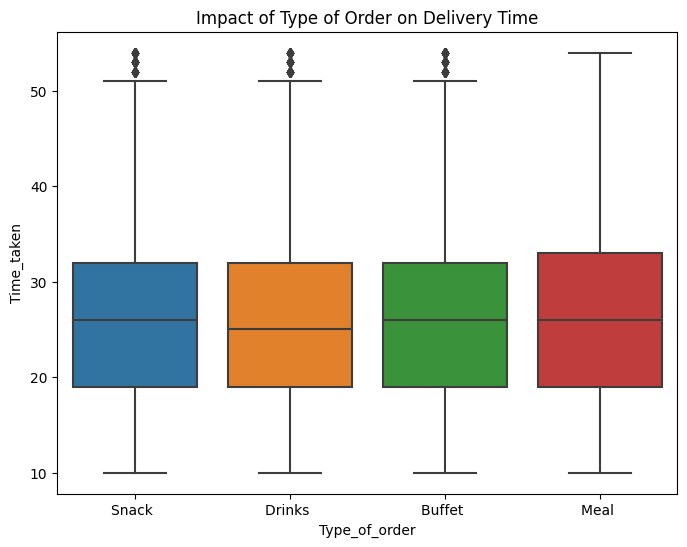

In [ ]:
# Boxplot Analysis with respect to Time taken: Type of Order
plt.figure(figsize=(8, 6))
temp = pd.DataFrame()
temp['Time_taken'] = df['Time_taken(min)'].str.split(" ", expand=True)[1]
temp['Time_taken'] = temp['Time_taken'].astype(int)
sns.boxplot(y=temp['Time_taken'], x=df['Type_of_order'])
plt.title("Impact of Type of Order on Delivery Time")
plt.show()

* There is no significant correlation between type of order and time taken to deliver the order.

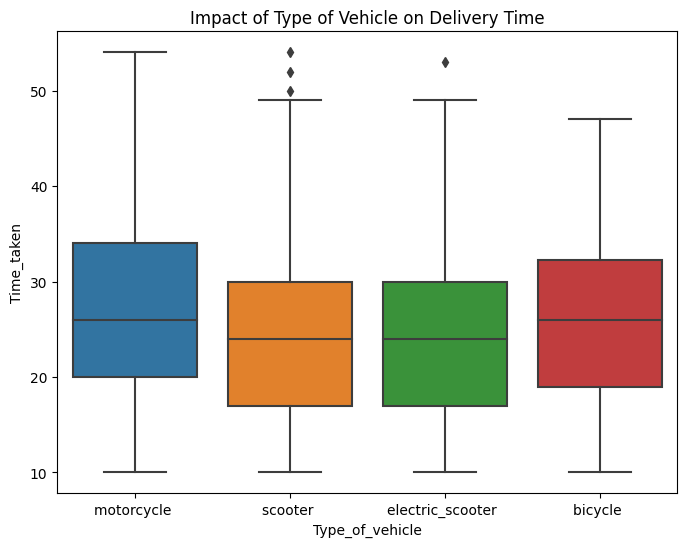

In [ ]:
# Boxplot Analysis with respect to Time taken: Type of Vehicle
plt.figure(figsize=(8, 6))
temp = pd.DataFrame()
temp['Time_taken'] = df['Time_taken(min)'].str.split(" ", expand=True)[1]
temp['Time_taken'] = temp['Time_taken'].astype(int)
sns.boxplot(y=temp['Time_taken'], x=df['Type_of_vehicle'])
plt.title("Impact of Type of Vehicle on Delivery Time")
plt.show()

* No significant correlation between type of vehicle and time taken to deliver the food.
* Even with major number of deliveries made by motorcycle and scooter there is not much mean difference in vehicle types.

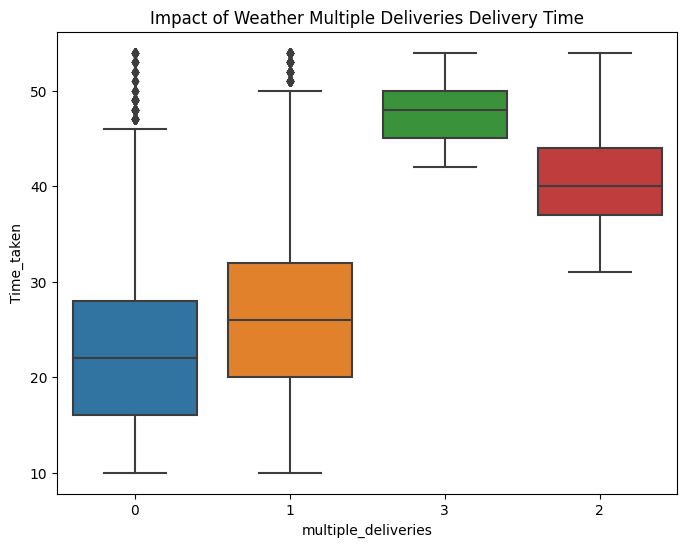

In [ ]:
# Boxplot Analysis with respect to Time taken: Multiple Deliveries
plt.figure(figsize=(8, 6))
temp = pd.DataFrame()
temp['Time_taken'] = df['Time_taken(min)'].str.split(" ", expand=True)[1]
temp['Time_taken'] = temp['Time_taken'].astype(int)
sns.boxplot(y=temp['Time_taken'], x=df['multiple_deliveries'])
plt.title("Impact of Weather Multiple Deliveries Delivery Time")
plt.show()

* Number of Deliveries affects the time taken to finish the delivery. Hence, Multiple Deliveries is an important feature.

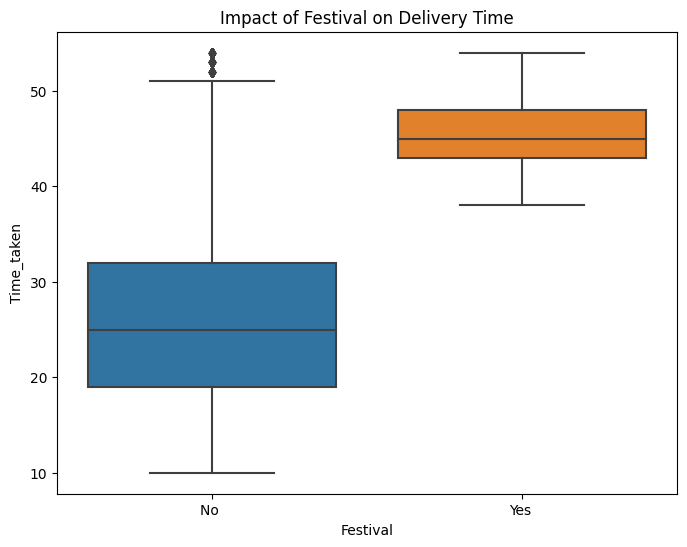

In [ ]:
# Boxplot Analysis with respect to Time taken: Festival
plt.figure(figsize=(8, 6))
temp = pd.DataFrame()
temp['Time_taken'] = df['Time_taken(min)'].str.split(" ", expand=True)[1]
temp['Time_taken'] = temp['Time_taken'].astype(int)
sns.boxplot(y=temp['Time_taken'], x=df['Festival'])
plt.title("Impact of Festival on Delivery Time")
plt.show()

* The delivery time for food is longer during festivals as compared to regular non-festival days.

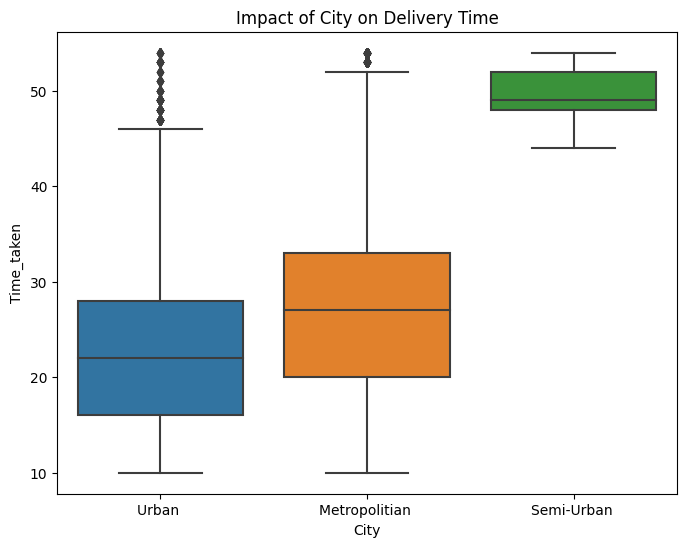

In [ ]:
# Boxplot Analysis with respect to Time taken: City
plt.figure(figsize=(8, 6))
temp = pd.DataFrame()
temp['Time_taken'] = df['Time_taken(min)'].str.split(" ", expand=True)[1]
temp['Time_taken'] = temp['Time_taken'].astype(int)
sns.boxplot(y=temp['Time_taken'], x=df['City'])
plt.title("Impact of City on Delivery Time")
plt.show()

* The type of city has an impact on the delivery time taken.

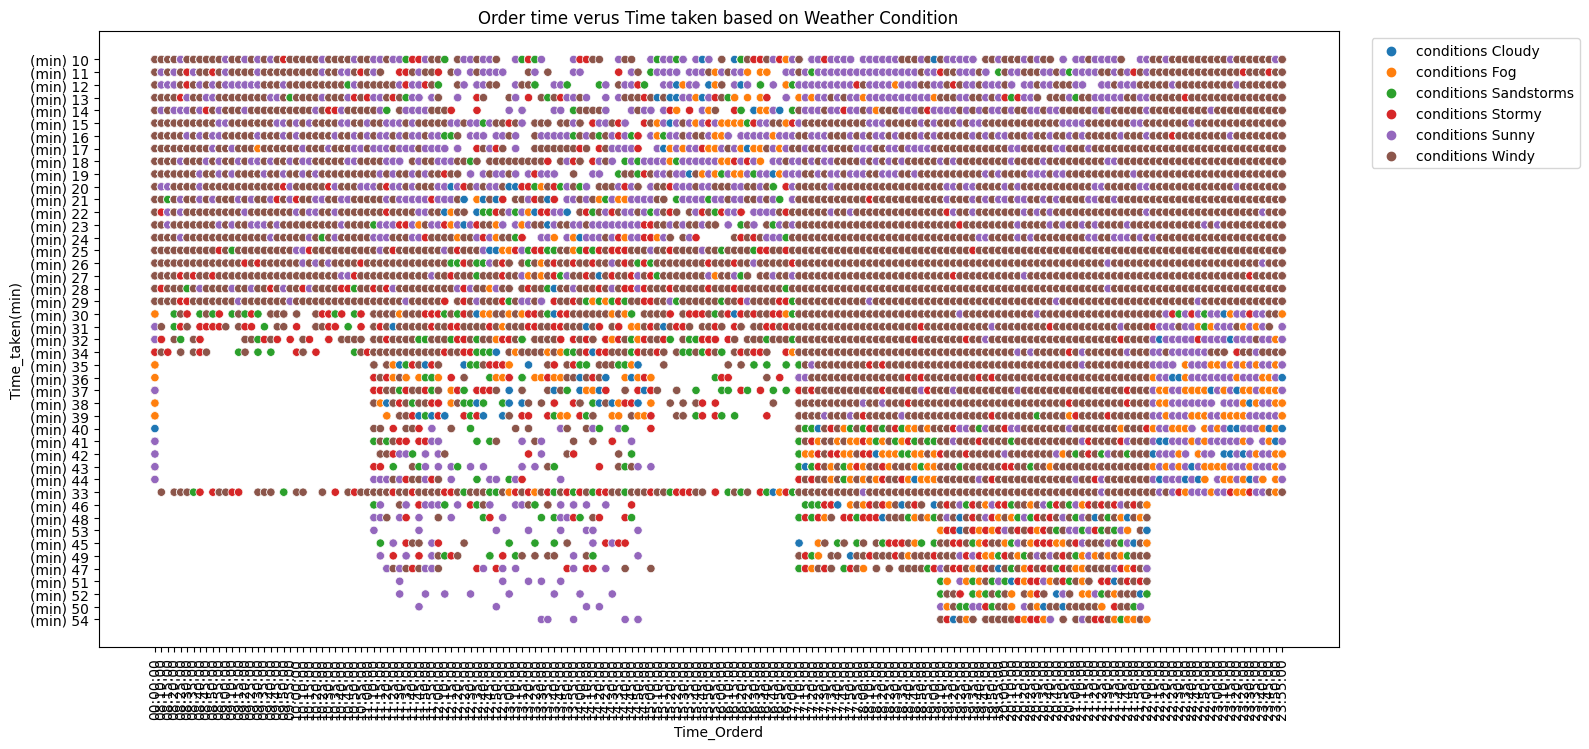

In [ ]:
# Order time verus Time taken based on Weather Condition
plt.figure(figsize=(16, 8))
sorted_df = df.sort_values(['Time_Orderd', 'Time_taken(min)', 'Weatherconditions'], ascending=[True, True, True])
sns.scatterplot(x=sorted_df['Time_Orderd'], y=sorted_df['Time_taken(min)'], hue=sorted_df['Weatherconditions'])
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=90)
plt.title('Order time verus Time taken based on Weather Condition')
plt.show()

* One important thing to notice is that most of the deliveries that took more time are during sunny day around afternoon.

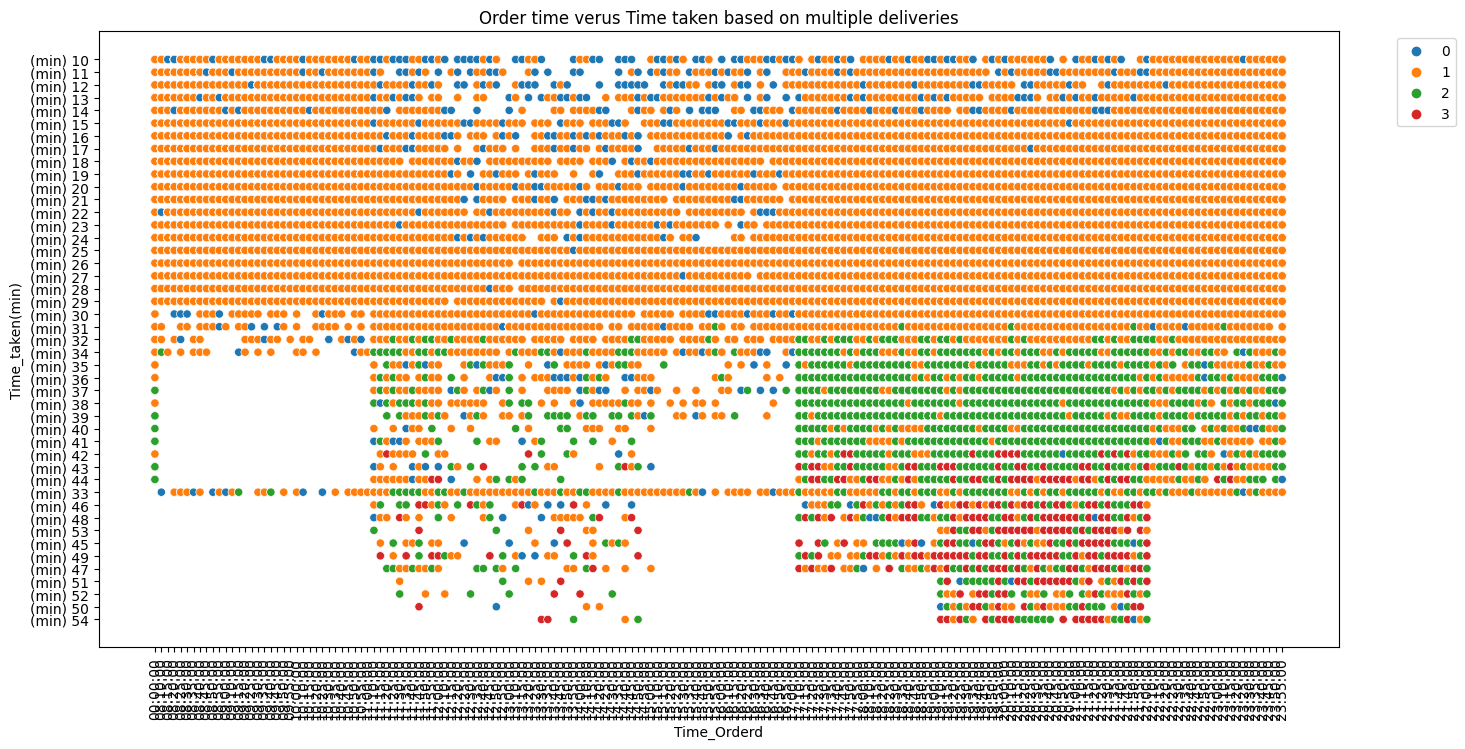

In [ ]:
# Order time verus Time taken based on multiple deliveries
plt.figure(figsize=(16, 8))
sorted_df = df.sort_values(['Time_Orderd', 'Time_taken(min)', 'multiple_deliveries'], ascending=[True, True, True])
sns.scatterplot(x=sorted_df['Time_Orderd'], y=sorted_df['Time_taken(min)'], hue=sorted_df['multiple_deliveries'])
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.xticks(rotation=90)
plt.title('Order time verus Time taken based on multiple deliveries')
plt.show()

* More than 2 deliveries took more than 30 mins for every deliveries.

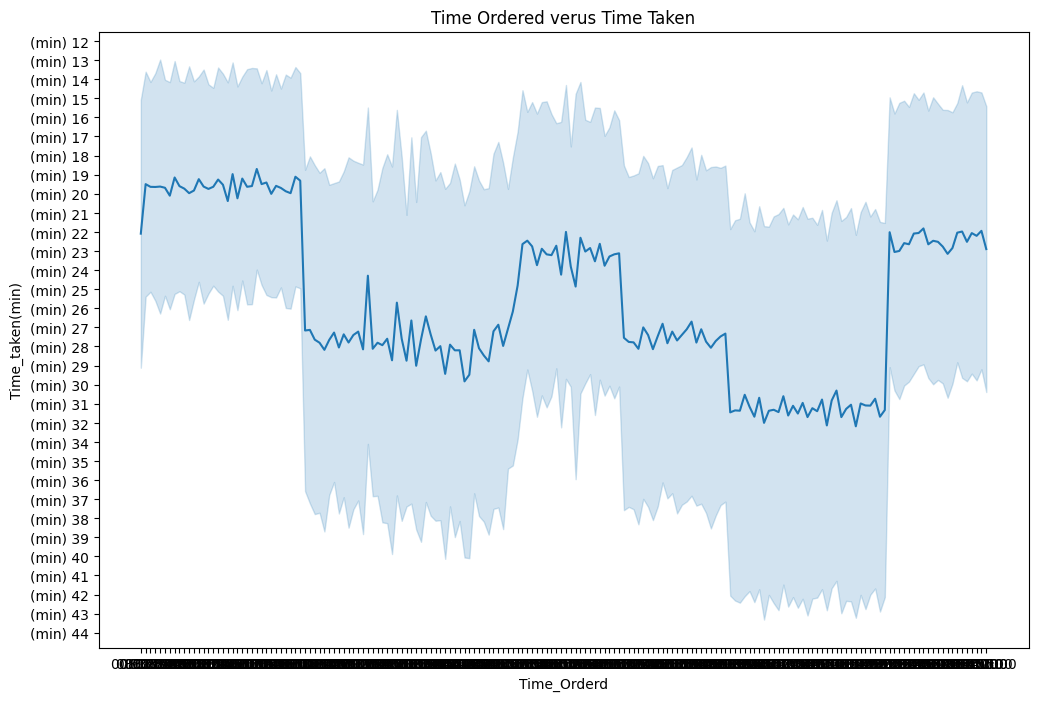

In [ ]:
# Time ordered verus time taken
plt.figure(figsize=(12, 8))
sorted_df = df.sort_values(['Time_Orderd', 'Time_taken(min)'], ascending=[True, True])
sns.lineplot(x='Time_Orderd', y='Time_taken(min)', data=sorted_df, errorbar='sd')
plt.title('Time Ordered verus Time Taken')
plt.show()

* The standard deviation of delivery times for both early and late deliveries falls within the range of 19 to 23. However, deliveries made at other times tend to have longer durations.

#**Now we will do Data Preprocessing and Data Cleaning**

Data Preprocessing Choices:

Handling Missing Values: Missing values can lead to biased or inaccurate model predictions. Imputation is chosen to preserve the existing data while filling in missing values with reasonable estimates.

Data Normalization: Normalizing features helps algorithms converge faster during training and avoids dominance of features with larger scales.

Feature Engineering: Additional features like time of day and day of the week can capture temporal patterns, potentially improving model accuracy. Calculating distances or route complexity features can capture spatial aspects of delivery.

Categorical Encoding: Categorical encoding ensures that categorical variables can be effectively used by machine learning algorithms.

Outlier Detection and Handling: Outliers can distort the model's performance, and their identification and handling ensure the model's robustness.

It's important to note that these preprocessing steps may vary depending on the specific characteristics of the data, the goals of the analysis, and domain knowledge. Each step should be carefully considered and validated to ensure they improve the quality and reliability of the dataset for building a predictive model.

# **Data Cleaning**

Time_taken(min) column contains the text '(min)' in it, which should be removed so that it is converted to a numeric data type. Similarly, the text 'conditions' must be removed from the Weatherconditions column.

Some restaurant latitudes and longitudes have incorrect values, these rows have been removed from the data frame.

In [ ]:
def clean_delivery_data(df):
    # Extract the numeric part from 'Time_taken(min)' column and convert to integers
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(" ")[1].strip()))

    # Remove ratings with 6 value
    df.drop(df[df['Delivery_person_Ratings'] == 6].index, inplace=True)

    # Remove record with age of 15
    df.drop(df[df['Delivery_person_Age'] == 15].index, inplace=True)

    # Extract the second part from 'Weatherconditions' column and handle missing values
    df['Weatherconditions'] = df['Weatherconditions'].apply(lambda x: x.split(" ")[1].strip() if not pd.isna(x) else np.nan)

    # Remove incorrect locations based on latitude and longitude
    df.drop(df[(df['Restaurant_latitude'] <= 0) | (df['Restaurant_longitude'] <= 0)].index, inplace=True)

    return df

In [ ]:
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37.0                      4.9   
1  0xb379     BANGRES18DEL02                  34.0                      4.5   
2  0x5d6d     BANGRES19DEL01                  23.0                      4.4   
3  0x7a6a    COIMBRES13DEL02                  38.0                      4.7   
4  0x70a2     CHENRES12DEL01                  32.0                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd  ...  \
0                    75.912471  19-03-2022    11:30:00  ...   
1                    77.813237  25-03-2022    19:45:00  ...   
2                    77.688400  19-03-2022    08:30:00  ...   
3                    77.026494  05-04-2022    18:00:00  ...   
4                    80.289982  26-03-2022    13:30:00  ...   

       Weatherconditions Road_traffic_density Vehicle_condition  \
0       conditions Sunny                High                  2   
1      conditions Stormy                 Jam                  2   
2  conditions Sandstorms                 Low                  0   
3       conditions Sunny              Medium                  0   
4      conditions Cloudy                High                  1   

   Type_of_order Type_of_vehicle multiple_deliveries Festival            City  \
0         Snack      motorcycle                    0      No           Urban    
1         Snack         scooter                    1      No   Metropolitian    
2        Drinks      motorcycle                    1      No           Urban    
3        Buffet      motorcycle                    1      No   Metropolitian    
4         Snack         scooter                    1      No   Metropolitian    

  Time_taken(min) Month_Year  
0        (min) 24    2022-03  
1        (min) 33    2022-03  
2        (min) 26    2022-03  
3        (min) 21    2022-05  
4        (min) 30    2022-03  

[5 rows x 21 columns]

In [ ]:
df = clean_delivery_data(df)
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37.0                      4.9   
1  0xb379     BANGRES18DEL02                  34.0                      4.5   
2  0x5d6d     BANGRES19DEL01                  23.0                      4.4   
3  0x7a6a    COIMBRES13DEL02                  38.0                      4.7   
4  0x70a2     CHENRES12DEL01                  32.0                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd  ... Weatherconditions  \
0                    75.912471  19-03-2022    11:30:00  ...             Sunny   
1                    77.813237  25-03-2022    19:45:00  ...            Stormy   
2                    77.688400  19-03-2022    08:30:00  ...        Sandstorms   
3                    77.026494  05-04-2022    18:00:00  ...             Sunny   
4                    80.289982  26-03-2022    13:30:00  ...            Cloudy   

  Road_traffic_density Vehicle_condition  Type_of_order Type_of_vehicle  \
0                High                  2         Snack      motorcycle    
1                 Jam                  2         Snack         scooter    
2                 Low                  0        Drinks      motorcycle    
3              Medium                  0        Buffet      motorcycle    
4                High                  1         Snack         scooter    

  multiple_deliveries Festival            City Time_taken(min)  Month_Year  
0                   0      No           Urban               24     2022-03  
1                   1      No   Metropolitian               33     2022-03  
2                   1      No           Urban               26     2022-03  
3                   1      No   Metropolitian               21     2022-05  
4                   1      No   Metropolitian               30     2022-03  

[5 rows x 21 columns]

In [ ]:
df[['Time_taken(min)','Weatherconditions']].head()

Time_taken(min) Weatherconditions
0               24             Sunny
1               33            Stormy
2               26        Sandstorms
3               21             Sunny
4               30            Cloudy

The numeric data columns have been converted to float type. The values in Order_Date column are not in the same format. They have been converted so that all the dates follow a common format.

In [ ]:
def convert_data_types(df):
    # Convert 'Delivery_person_Age', 'Delivery_person_Ratings', and 'multiple_deliveries' to float64
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')

    # Convert 'Order_Date' column to datetime format, handling mixed date formats
    df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

    # Separate dates with NaT (Not-a-Time) values based on the '/' or '-' separator
    dates_with_slash = df['Order_Date'][df['Order_Date'].dt.strftime('%m/%d/%Y').notnull()]
    dates_with_hyphen = df['Order_Date'][df['Order_Date'].dt.strftime('%m-%d-%Y').notnull()]

    # Reformat dates with the '/' separator to the desired format '%d-%m-%Y'
    df.loc[dates_with_slash.index, 'Order_Date'] = dates_with_slash.dt.strftime('%d-%m-%Y')

    return df

In [ ]:
df = convert_data_types(df)
df[['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries','Order_Date']].head()

<ipython-input-86-a77abfd75c39>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
<ipython-input-86-a77abfd75c39>:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.loc[dates_with_slash.index, 'Order_Date'] = dates_with_slash.dt.strftime('%d-%m-%Y')
<ipython-input-86-a77abfd75c39>:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[dates_with_slash.index, 'Order_Date'] = dates_with_slash.dt.strftime('%d

Delivery_person_Age  Delivery_person_Ratings  multiple_deliveries  \
0                 37.0                      4.9                  0.0   
1                 34.0                      4.5                  1.0   
2                 23.0                      4.4                  1.0   
3                 38.0                      4.7                  1.0   
4                 32.0                      4.6                  1.0   

   Order_Date  
0  19-03-2022  
1  25-03-2022  
2  19-03-2022  
3  04-05-2022  
4  26-03-2022

## **Handling NULL/NaN values**

Most of the features have NaN values in form of the string 'NaN '. They have to be converted to NaN which can be recognized by numpy and pandas.

In [ ]:
def convert_nan_to_nan(df):
    # Replace the string 'NaN' with numpy.nan in the DataFrame
    df.replace('NaN ', np.nan, regex=True, inplace=True)

convert_nan_to_nan(df)
# df.head()

In [ ]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1476
Delivery_person_Ratings        1515
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1276
Time_Order_picked                 0
Weatherconditions               371
Road_traffic_density            359
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             897
Festival                        215
City                           1097
Time_taken(min)                   0
Month_Year                        0
dtype: int64

## Delivery Person Id

In [ ]:
df['Delivery_person_ID'].isnull().sum()

0

In [ ]:
df['Delivery_person_ID'].value_counts().sort_values()

BHPRES010DEL03      5
KOLRES010DEL03      6
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES08DEL03       6
                   ..
INDORES15DEL01     65
JAPRES03DEL01      66
VADRES11DEL02      66
PUNERES01DEL01     67
JAPRES11DEL02      67
Name: Delivery_person_ID, Length: 1170, dtype: int64

- No NaN values found in Delivery Id.

* There are few number of delivery person who delivered items more than 50 compared to less number of delivery persons.

* More than 400 Delivery people delivered food in range of (10, 20) , followed by the range of (50, 60) number of deliveries. These data are confirmed by the histplot above.

## Delivery Person Age

In [ ]:
# Printing number of NaN values
print('Number of NaN values: ', df['Delivery_person_Age'].isna().sum())

Number of NaN values:  1476


In [ ]:
df['Delivery_person_Age'].value_counts().sort_index()

20.0    1955
21.0    1961
22.0    2021
23.0    1933
24.0    2035
25.0    1984
26.0    1980
27.0    1966
28.0    1997
29.0    2007
30.0    2036
31.0    1936
32.0    1999
33.0    2010
34.0    1986
35.0    2093
36.0    2070
37.0    2042
38.0    2018
39.0    1968
Name: Delivery_person_Age, dtype: int64

* Most of the values ranges from age 20-39. Hence, it is a good choice to take the range from that range to fill the values.

In [ ]:
def handle_delv_person_age(df):
  df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float32')

  lower_bound = 20
  upper_bound = 40

  missing_count = df['Delivery_person_Age'].isnull().sum()
  random_ages = np.random.randint(lower_bound, upper_bound + 1, size=missing_count)
  print(random_ages)
  df.loc[df['Delivery_person_Age'].isnull(), 'Delivery_person_Age'] = random_ages

handle_delv_person_age(df)

[39 33 25 ... 23 35 39]


In [ ]:
df['Delivery_person_Age'].value_counts().sort_index()

20.0    2040
21.0    2027
22.0    2083
23.0    2005
24.0    2115
25.0    2052
26.0    2034
27.0    2043
28.0    2063
29.0    2062
30.0    2114
31.0    2001
32.0    2077
33.0    2085
34.0    2057
35.0    2164
36.0    2130
37.0    2122
38.0    2076
39.0    2053
40.0      70
Name: Delivery_person_Age, dtype: int64

## Delivery Person Rating

In [ ]:
df['Delivery_person_Ratings'].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , nan, 3.8,
       3.9, 3.7, 2.6, 3.5, 2.5, 3.6, 3.1, 2.7, 3.3, 3.4, 3.2, 2.8, 2.9,
       3. ])

In [ ]:
df['Delivery_person_Ratings'].isnull().sum()

1515

In [ ]:
df['Delivery_person_Ratings'].value_counts().sort_index()

2.5      18
2.6      20
2.7      21
2.8      17
2.9      18
3.0       6
3.1      28
3.2      26
3.3      23
3.4      31
3.5     236
3.6     193
3.7     202
3.8     215
3.9     174
4.0     994
4.1    1320
4.2    1329
4.3    1299
4.4    1243
4.5    3053
4.6    6359
4.7    6494
4.8    6535
4.9    6455
5.0    3649
Name: Delivery_person_Ratings, dtype: int64

<Axes: >

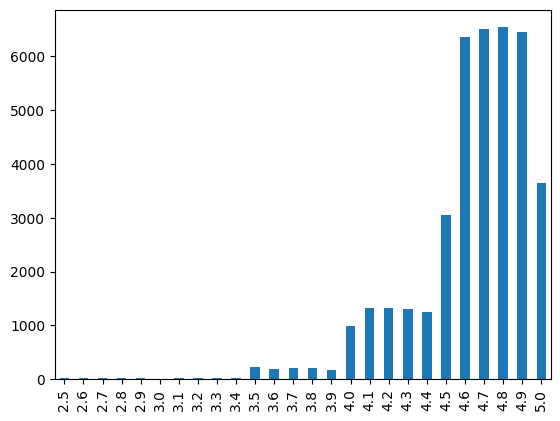

In [ ]:
df['Delivery_person_Ratings'].value_counts().sort_index().plot(kind='bar')

In [ ]:
# df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].mean())
def handle_delv_person_ratings(df):
  df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float).round(2)

  lower_bound = 3.0
  upper_bound = 4.0

  missing_count = df['Delivery_person_Ratings'].isnull().sum()
  random_ratings = np.random.uniform(lower_bound, upper_bound + 1, size=missing_count)
  random_ratings = np.round(random_ratings, decimals=1)
  print(random_ratings)
  df.loc[df['Delivery_person_Ratings'].isnull(), 'Delivery_person_Ratings'] = random_ratings

handle_delv_person_ratings(df)

[3.1 3.5 3.  ... 3.6 4.6 3.7]


- NaN values on the Delivery Person ratings column have been filled with random selection from the available choices of values. This will prevent unbiased predictions.

In [ ]:
df['Delivery_person_Ratings'].isnull().sum()

0

## Delivery Longitude, Delivery Latitude

In [ ]:
df[['Delivery_location_longitude', 'Delivery_location_latitude']].isnull().sum()

Delivery_location_longitude    0
Delivery_location_latitude     0
dtype: int64

## Weather Condition

In [ ]:
df['Weatherconditions'].isnull().sum()

371

In [ ]:
df['Weatherconditions'].value_counts()

Fog           6962
Stormy        6932
Cloudy        6881
Sandstorms    6853
Windy         6792
Sunny         6682
Name: Weatherconditions, dtype: int64

<Axes: >

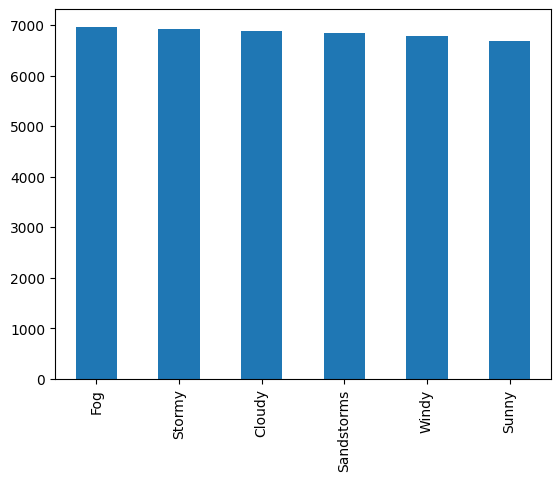

In [ ]:
df['Weatherconditions'].value_counts().plot(kind='bar')

* For better understanding its better to lose the conditions words as a prefix

* Since the weather conditions are almost equally distributed, we can fill the missing values with random choices.

In [ ]:
def handle_weather_conditions(df):
  weather_options = df['Weatherconditions'].unique()[:-1]
  missing_count = df['Weatherconditions'].isnull().sum()
  random_weather = np.random.choice(weather_options, size=missing_count)
  df.loc[df['Weatherconditions'].isnull(), 'Weatherconditions'] = random_weather

handle_weather_conditions(df)

In [ ]:
df['Weatherconditions'].isnull().sum()

0

<Axes: >

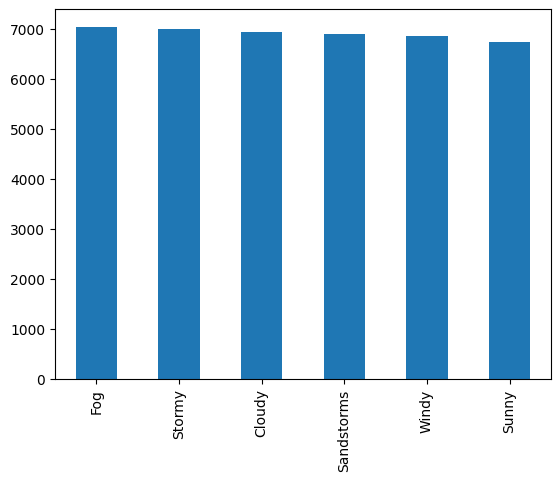

In [ ]:
df['Weatherconditions'].value_counts().plot(kind='bar')

In [ ]:
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37.0                      4.9   
1  0xb379     BANGRES18DEL02                  34.0                      4.5   
2  0x5d6d     BANGRES19DEL01                  23.0                      4.4   
3  0x7a6a    COIMBRES13DEL02                  38.0                      4.7   
4  0x70a2     CHENRES12DEL01                  32.0                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd  ... Weatherconditions  \
0                    75.912471  19-03-2022    11:30:00  ...             Sunny   
1                    77.813237  25-03-2022    19:45:00  ...            Stormy   
2                    77.688400  19-03-2022    08:30:00  ...        Sandstorms   
3                    77.026494  04-05-2022    18:00:00  ...             Sunny   
4                    80.289982  26-03-2022    13:30:00  ...            Cloudy   

  Road_traffic_density Vehicle_condition  Type_of_order Type_of_vehicle  \
0                High                  2         Snack      motorcycle    
1                 Jam                  2         Snack         scooter    
2                 Low                  0        Drinks      motorcycle    
3              Medium                  0        Buffet      motorcycle    
4                High                  1         Snack         scooter    

  multiple_deliveries  Festival            City Time_taken(min)  Month_Year  
0                 0.0       No           Urban               24     2022-03  
1                 1.0       No   Metropolitian               33     2022-03  
2                 1.0       No           Urban               26     2022-03  
3                 1.0       No   Metropolitian               21     2022-05  
4                 1.0       No   Metropolitian               30     2022-03  

[5 rows x 21 columns]

## Road Traffic Density

In [ ]:
df['Road_traffic_density'].isnull().sum()

359

In [ ]:
df['Road_traffic_density'].value_counts()

Low        14095
Jam        12950
Medium     10023
High        4046
Name: Road_traffic_density, dtype: int64

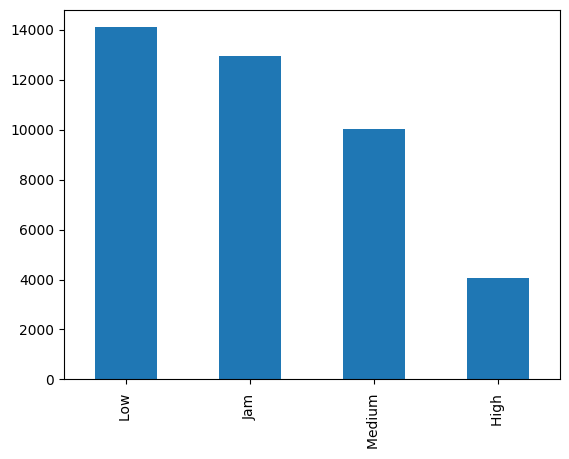

In [ ]:
df['Road_traffic_density'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
def handle_traffic_density(df):
  road_traffic_options = df['Road_traffic_density'].unique()[:-1]
  missing_count = df['Road_traffic_density'].isnull().sum()
  road_traffic_options = np.random.choice(road_traffic_options, size=missing_count)
  df.loc[df['Road_traffic_density'].isnull(), 'Road_traffic_density'] = road_traffic_options

handle_traffic_density(df)

* Missing values in Road_traffic_density have been filled in using the random selections from available choices.

In [ ]:
df['Road_traffic_density'].isnull().sum()

0

<Axes: >

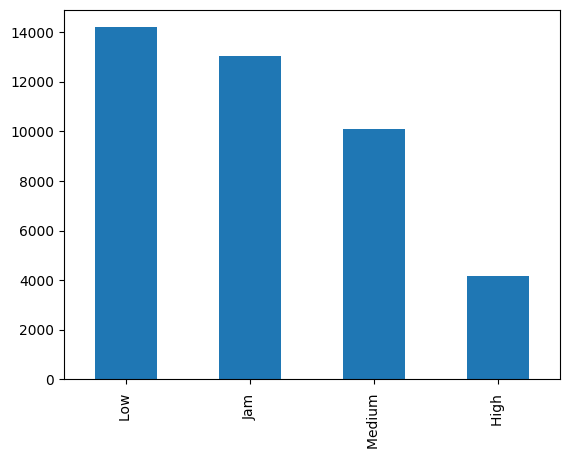

In [ ]:
df['Road_traffic_density'].value_counts().plot(kind='bar')

## Vehicle Condition

In [ ]:
df['Vehicle_condition'].isnull().sum()

0

## Festival

In [ ]:
df['Festival'].isnull().sum()

215

In [ ]:
df['Festival'].unique()

array(['No ', 'Yes ', nan], dtype=object)

In [ ]:
df['Festival'].value_counts()

No      40446
Yes       812
Name: Festival, dtype: int64

* There is a major bias with festival feature. We can simple just take the mode for this as small number of missing values won't affect the results.

In [ ]:
def handle_festival(df):
  df['Festival'] = df['Festival'].fillna(df['Festival'].mode()[0])

handle_festival(df)

In [ ]:
df['Festival'].isnull().sum()

0

In [ ]:
df['Festival'].value_counts()

No      40661
Yes       812
Name: Festival, dtype: int64

## Time Taken

In [ ]:
df['Time_taken(min)'].isnull().sum()

0

## Restaurant Longitude, Restaurant Latitude

In [ ]:
df[['Restaurant_longitude', 'Restaurant_latitude']].isnull().sum()

Restaurant_longitude    0
Restaurant_latitude     0
dtype: int64

## Multiple deliveries

In [ ]:
def handle_multiple_deliveries(df):
  # Printing all unique values in the "multiple_deliveries" column
  unique_values = df['multiple_deliveries'].unique()
  print('Unique values in multiple deliveries:')
  print(unique_values)

  # Replace the NaN values with mode
  df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)

  # Printing all unique values in the "multiple_deliveries" column
  unique_values = df['multiple_deliveries'].unique()
  print('Unique values in multiple deliveries after handling NaN values:')
  print(unique_values)

handle_multiple_deliveries(df)

Unique values in multiple deliveries:
[ 0.  1.  3. nan  2.]
Unique values in multiple deliveries after handling NaN values:
[0. 1. 3. 2.]


* As seen in EDA, most of the deliveries have just one order delivery. However, many deliveries also have two or three orders. Thus, it is appropriate to fill in the missing values with the mode.

## City

In [ ]:
# Get the number of counts of each unique value in the "City" column, including NaN
city_counts = df['City'].value_counts(dropna=False)

print(city_counts)

Metropolitian     31068
Urban              9161
NaN                1097
Semi-Urban          147
Name: City, dtype: int64


* Due to high bias in the City column, it is suitable to fill in the missing values with the mode.

In [ ]:
def handle_city(df):
  # Calculate the mode of the "City" column
  city_mode = df['City'].mode()[0]

  # Impute NaN values in "City" column with the mode
  df['City'].fillna(city_mode, inplace=True)

  # Get the number of counts of each unique value in the "City" column, including NaN
  city_counts = df['City'].value_counts(dropna=False)

  print(city_counts)

handle_city(df)

Metropolitian     32165
Urban              9161
Semi-Urban          147
Name: City, dtype: int64


In [ ]:
# Check null values in the dataframe
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1276
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken(min)                   0
Month_Year                        0
dtype: int64

#**Outlier Detection and Handling for this dataset**

This will help to detect and handle outliers using the Z-score method, and it will replace the outliers in the specified numerical columns with the median value of each column.

In [ ]:
data = pd.read_csv('data.csv')
from scipy import stats

# List of numerical columns where we want to detect outliers
numerical_columns = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Road_traffic_density', 'Time_taken(min)']

# Function to detect and handle outliers using Z-score method
def handle_outliers(column):
    z_scores = np.abs(stats.zscore(data[column]))
    threshold = 3

    # Replace outliers with median value
    median_value = np.median(data[column])
    data[column] = np.where(z_scores > threshold, median_value, data[column])

# Detect and handle outliers in numerical columns
for column in numerical_columns:
    if data[column].dtype in [np.float64, np.int64]:
        handle_outliers(column)

# Print the cleaned dataset
print(data)





            ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0      0x4607     INDORES13DEL02                   37                     4.9   
1      0xb379     BANGRES18DEL02                   34                     4.5   
2      0x5d6d     BANGRES19DEL01                   23                     4.4   
3      0x7a6a    COIMBRES13DEL02                   38                     4.7   
4      0x70a2     CHENRES12DEL01                   32                     4.6   
...        ...                ...                 ...                     ...   
45588  0x7c09      JAPRES04DEL01                   30                     4.8   
45589  0xd641      AGRRES16DEL01                   21                     4.6   
45590  0x4f8d     CHENRES08DEL03                   30                     4.9   
45591  0x5eee    COIMBRES11DEL01                   20                     4.7   
45592  0x5fb2   RANCHIRES09DEL02                   23                     4.9   

       Restaurant_latitude 

# **Feature Engineering**
Feature engineering involves creating new features or transforming existing features in a way that enhances the performance.

Overall, feature engineering is a creative and iterative process that aims to enhance the quality of the data, leading to better model performance and more accurate predictions.

## Delivery Person Id

In [ ]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)',
       'Month_Year'],
      dtype='object')

In [ ]:
def feature_extract(df):
  df['City_code'] = df['Delivery_person_ID'].str.split("RES", expand=True)[0]

feature_extract(df)
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37.0                      4.9   
1  0xb379     BANGRES18DEL02                  34.0                      4.5   
2  0x5d6d     BANGRES19DEL01                  23.0                      4.4   
3  0x7a6a    COIMBRES13DEL02                  38.0                      4.7   
4  0x70a2     CHENRES12DEL01                  32.0                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd  ...  \
0                    75.912471  19-03-2022    11:30:00  ...   
1                    77.813237  25-03-2022    19:45:00  ...   
2                    77.688400  19-03-2022    08:30:00  ...   
3                    77.026494  04-05-2022    18:00:00  ...   
4                    80.289982  26-03-2022    13:30:00  ...   

  Road_traffic_density Vehicle_condition Type_of_order  Type_of_vehicle  \
0                High                  2        Snack       motorcycle    
1                 Jam                  2        Snack          scooter    
2                 Low                  0       Drinks       motorcycle    
3              Medium                  0       Buffet       motorcycle    
4                High                  1        Snack          scooter    

  multiple_deliveries Festival            City Time_taken(min) Month_Year  \
0                 0.0      No           Urban               24    2022-03   
1                 1.0      No   Metropolitian               33    2022-03   
2                 1.0      No           Urban               26    2022-03   
3                 1.0      No   Metropolitian               21    2022-05   
4                 1.0      No   Metropolitian               30    2022-03   

   City_code  
0       INDO  
1       BANG  
2       BANG  
3      COIMB  
4       CHEN  

[5 rows x 22 columns]

## Distance between Restaurant Location and Delivery Location

In [ ]:
def calculate_distance(df):
  df['Distance'] = np.zeros(len(df))
  restaurant_location = df[['Restaurant_latitude', 'Restaurant_longitude']].to_numpy()
  delivery_location = df[['Delivery_location_latitude', 'Delivery_location_longitude']].to_numpy()

  df['Distance'] = np.array([geodesic(restaurant, delivery) for restaurant, delivery in zip(restaurant_location, delivery_location)])
  df['Distance'] = df['Distance'].astype('str').str.extract('(\d+)').astype('int64')

  df.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'], axis=1, inplace=True)

calculate_distance(df)
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37.0                      4.9   
1  0xb379     BANGRES18DEL02                  34.0                      4.5   
2  0x5d6d     BANGRES19DEL01                  23.0                      4.4   
3  0x7a6a    COIMBRES13DEL02                  38.0                      4.7   
4  0x70a2     CHENRES12DEL01                  32.0                      4.6   

   Order_Date Time_Orderd Time_Order_picked Weatherconditions  \
0  19-03-2022    11:30:00          11:45:00             Sunny   
1  25-03-2022    19:45:00          19:50:00            Stormy   
2  19-03-2022    08:30:00          08:45:00        Sandstorms   
3  04-05-2022    18:00:00          18:10:00             Sunny   
4  26-03-2022    13:30:00          13:45:00            Cloudy   

  Road_traffic_density  Vehicle_condition Type_of_order Type_of_vehicle  \
0                High                   2        Snack      motorcycle    
1                 Jam                   2        Snack         scooter    
2                 Low                   0       Drinks      motorcycle    
3              Medium                   0       Buffet      motorcycle    
4                High                   1        Snack         scooter    

   multiple_deliveries Festival            City  Time_taken(min) Month_Year  \
0                  0.0      No           Urban                24    2022-03   
1                  1.0      No   Metropolitian                33    2022-03   
2                  1.0      No           Urban                26    2022-03   
3                  1.0      No   Metropolitian                21    2022-05   
4                  1.0      No   Metropolitian                30    2022-03   

  City_code  Distance  
0      INDO         3  
1      BANG        20  
2      BANG         1  
3     COIMB         7  
4      CHEN         6

In [ ]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)',
       'Month_Year', 'City_code', 'Distance'],
      dtype='object')

In [ ]:
df['Distance'].value_counts().sort_index()

1     3744
2      526
3     3202
4     3703
5      515
6     3208
7     3753
8      511
9     3187
10    3729
11     534
12    3197
13    3648
14      62
16    2543
17    1174
19    2462
20    1775
Name: Distance, dtype: int64

<Axes: xlabel='Distance', ylabel='Time_taken(min)'>

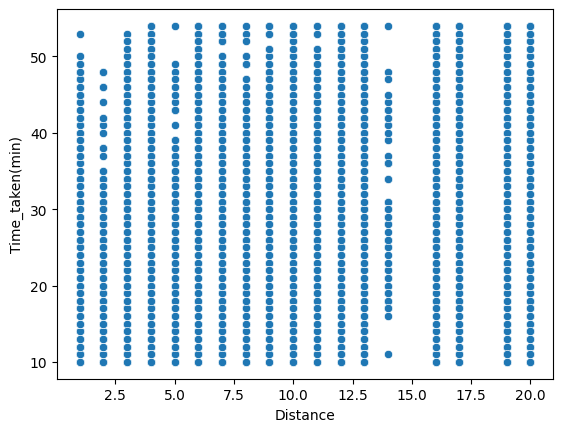

In [ ]:
sns.scatterplot(x=df['Distance'], y=df['Time_taken(min)'])

## Time ordered and Time picked

In [ ]:
# Get the number of missing, null, and NaN values in "Time_Orderd" column
missing_values_ordered = df['Time_Orderd'].isnull().sum()
# Count the number of values equal to "NaN" in "Time_Ordered" column
nan_count_ordered = (df['Time_Orderd'] == 'NaN ').sum()

# Print the counts of missing, null, and NaN values
print("Number of missing values in Time_Orderd:", missing_values_ordered)
print("Number of 'NaN' values in Time_Ordered:", nan_count_ordered)

# Get the number of missing, null, and NaN values in "Time_Order_picked" column
missing_values_picked = df['Time_Order_picked'].isnull().sum()
# Count the number of values equal to "NaN" in "Time_Order_Picked" column
nan_count_picked = (df['Time_Order_picked'] == 'NaN ').sum()

print("Number of missing values in Time_Order_picked:", missing_values_picked)
print("Number of 'NaN' values in Time_Order_Picked:", nan_count_picked)

Number of missing values in Time_Orderd: 1276
Number of 'NaN' values in Time_Ordered: 0
Number of missing values in Time_Order_picked: 0
Number of 'NaN' values in Time_Order_Picked: 0


In [ ]:
def calculate_time_difference_in_minutes(df):
    # Convert 'Time_Orderd' and 'Time_Order_picked' columns to datetime format
    df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'])
    df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'])

    # Add a day to 'Time_Order_picked' when it is earlier than 'Time_Orderd'
    df['Time_Order_picked'] += np.where(df['Time_Order_picked'] < df['Time_Orderd'], pd.Timedelta(days=1), pd.Timedelta(days=0))

    # Calculate the time difference in minutes and store it in the 'Time_Difference' column
    df['Time_Difference'] = (df['Time_Order_picked'] - df['Time_Orderd']).dt.total_seconds() / 60.0

    # Replace missing time differences (NaN) with the median of the non-missing values
    median_difference = df['Time_Difference'].dropna().median()
    df['Time_Difference'].fillna(median_difference, inplace=True)

    df.drop(['Time_Orderd', 'Time_Order_picked'], axis=1, inplace=True)

In [ ]:
calculate_time_difference_in_minutes(df)

<ipython-input-137-3f086cbdc6cf>:7: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  df['Time_Order_picked'] += np.where(df['Time_Order_picked'] < df['Time_Orderd'], pd.Timedelta(days=1), pd.Timedelta(days=0))


In [ ]:
difference_counts = df['Time_Difference'].value_counts(dropna=False)

print(difference_counts)

10.0    14608
5.0     13515
15.0    13350
Name: Time_Difference, dtype: int64


In [ ]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Order_Date', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'Month_Year', 'City_code', 'Distance',
       'Time_Difference'],
      dtype='object')

## Order date

In [ ]:
def add_date_features(data_frame):
  # Convert 'Order_Date' to datetime format
  data_frame['Order_Date'] = pd.to_datetime(data_frame['Order_Date'])

  # Extract day, month, quarter, and year from 'Order_Date'
  data_frame["order_day"] = data_frame.Order_Date.dt.day
  data_frame["order_month"] = data_frame.Order_Date.dt.month
  data_frame["order_quarter"] = data_frame.Order_Date.dt.quarter

  # Extract additional date-related features
  data_frame['order_day_of_week'] = data_frame.Order_Date.dt.day_of_week.astype(int)  # 0 for Monday, 1 for Tuesday, ..., 6 for Sunday
  data_frame["is_month_start"] = data_frame.Order_Date.dt.is_month_start.astype(int)  # 1 if the date is the start of the month, else 0
  data_frame["is_month_end"] = data_frame.Order_Date.dt.is_month_end.astype(int)  # 1 if the date is the end of the month, else 0
  data_frame["is_quarter_start"] = data_frame.Order_Date.dt.is_quarter_start.astype(int)  # 1 if the date is the start of the quarter, else 0
  data_frame["is_quarter_end"] = data_frame.Order_Date.dt.is_quarter_end.astype(int)  # 1 if the date is the end of the quarter, else 0

  # Mark weekends (Saturday and Sunday) with 1, and weekdays with 0
  data_frame['is_weekend'] = np.where(data_frame['order_day_of_week'].isin([5, 6]), 1, 0)

  data_frame.drop(['Order_Date'], axis=1, inplace=True)


In [ ]:
add_date_features(df)
df.head()

<ipython-input-141-04545b21215a>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_frame['Order_Date'] = pd.to_datetime(data_frame['Order_Date'])


ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37.0                      4.9   
1  0xb379     BANGRES18DEL02                  34.0                      4.5   
2  0x5d6d     BANGRES19DEL01                  23.0                      4.4   
3  0x7a6a    COIMBRES13DEL02                  38.0                      4.7   
4  0x70a2     CHENRES12DEL01                  32.0                      4.6   

  Weatherconditions Road_traffic_density  Vehicle_condition Type_of_order  \
0             Sunny                High                   2        Snack    
1            Stormy                 Jam                   2        Snack    
2        Sandstorms                 Low                   0       Drinks    
3             Sunny              Medium                   0       Buffet    
4            Cloudy                High                   1        Snack    

  Type_of_vehicle  multiple_deliveries  ... Time_Difference order_day  \
0     motorcycle                   0.0  ...            15.0        19   
1        scooter                   1.0  ...             5.0        25   
2     motorcycle                   1.0  ...            15.0        19   
3     motorcycle                   1.0  ...            10.0         5   
4        scooter                   1.0  ...            15.0        26   

   order_month order_quarter order_day_of_week  is_month_start  is_month_end  \
0            3             1                 5               0             0   
1            3             1                 4               0             0   
2            3             1                 5               0             0   
3            4             2                 1               0             0   
4            3             1                 5               0             0   

   is_quarter_start  is_quarter_end  is_weekend  
0                 0               0           1  
1                 0               0           0  
2                 0               0           1  
3                 0               0           0  
4                 0               0           1  

[5 rows x 26 columns]

# **Label Encoding**
This technique is used in feature engineering to convert categorical data into numerical values. It involves assigning a unique numerical label to each category or class in a categorical variable.

 Label encoding is commonly used when working with machine learning algorithms that require numerical input, as many algorithms are designed to work with numerical data.

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encode_column(data_frame, column_name):
  label_encoder = LabelEncoder()
  data_frame[column_name] = label_encoder.fit_transform(data_frame[column_name])

### Weathercondition

In [ ]:
# Encoding Weather Condition feature
Weatherconditions_counts = df['Weatherconditions'].value_counts(dropna=False)
print('Values before label encoding:')
print(Weatherconditions_counts)

label_encode_column(df, 'Weatherconditions')

Weatherconditions_counts = df['Weatherconditions'].value_counts(dropna=False)
print('\nValues after label encoding:')
print(Weatherconditions_counts)

Values before label encoding:
Fog           7034
Stormy        7003
Cloudy        6934
Sandstorms    6904
Windy         6861
Sunny         6737
Name: Weatherconditions, dtype: int64

Values after label encoding:
1    7034
3    7003
0    6934
2    6904
5    6861
4    6737
Name: Weatherconditions, dtype: int64


### Road Traffic

In [ ]:
# Label Encoding Road Traffic Density feature
road_traffic_counts = df['Road_traffic_density'].value_counts(dropna=False)
print('Values before label encoding:')
print(road_traffic_counts)

label_encode_column(df, 'Road_traffic_density')

road_traffic_counts = df['Road_traffic_density'].value_counts(dropna=False)
print('\nValues after label encoding:')
print(road_traffic_counts)

Values before label encoding:
Low        14184
Jam        13039
Medium     10103
High        4147
Name: Road_traffic_density, dtype: int64

Values after label encoding:
2    14184
1    13039
3    10103
0     4147
Name: Road_traffic_density, dtype: int64


### Festival

In [ ]:
# Label Encoding Festival feature
Festival_counts = df['Festival'].value_counts(dropna=False)
print('Values before label encoding:')
print(Festival_counts)

label_encode_column(df, 'Festival')

Festival_counts = df['Festival'].value_counts(dropna=False)
print('\nValues after label encoding:')
print(Festival_counts)

Values before label encoding:
No      40661
Yes       812
Name: Festival, dtype: int64

Values after label encoding:
0    40661
1      812
Name: Festival, dtype: int64


### City

In [ ]:
# Label Encoding City feature
City_counts = df['City'].value_counts(dropna=False)
print('Values before label encoding:')
print(City_counts)

label_encode_column(df, 'City')

City_counts = df['City'].value_counts(dropna=False)
print('\nValues after label encoding:')
print(City_counts)

Values before label encoding:
Metropolitian     32165
Urban              9161
Semi-Urban          147
Name: City, dtype: int64

Values after label encoding:
0    32165
2     9161
1      147
Name: City, dtype: int64


### City Code

In [ ]:
# Label Encoding City Code feature
City_code_counts = df['City_code'].value_counts(dropna=False)
print('Values before label encoding:')
print(City_code_counts)

label_encode_column(df, 'City_code')

City_code_counts = df['City_code'].value_counts(dropna=False)
print('\nValues after label encoding:')
print(City_code_counts)

Values before label encoding:
JAP       3419
BANG      3166
SUR       3162
HYD       3161
COIMB     3146
MUM       3146
INDO      3138
CHEN      3113
PUNE      3113
MYS       2989
RANCHI    2543
VAD       1564
KOC        682
LUDH       670
KOL        667
KNP        650
GOA        586
ALH        553
AGR        536
AURG       534
DEH        474
BHP        461
Name: City_code, dtype: int64

Values after label encoding:
11    3419
3     3166
20    3162
9     3161
6     3146
16    3146
10    3138
5     3113
18    3113
17    2989
19    2543
21    1564
13     682
15     670
14     667
12     650
8      586
1      553
0      536
2      534
7      474
4      461
Name: City_code, dtype: int64


### Type of order

In [ ]:
# Label Encoding Type of order feature
order_counts = df['Type_of_order'].value_counts(dropna=False)
print('Values before label encoding:')
print(order_counts)

label_encode_column(df, 'Type_of_order')

order_counts = df['Type_of_order'].value_counts(dropna=False)
print('\nValues after label encoding:')
print(order_counts)

Values before label encoding:
Snack      10498
Meal       10384
Drinks     10337
Buffet     10254
Name: Type_of_order, dtype: int64

Values after label encoding:
3    10498
2    10384
1    10337
0    10254
Name: Type_of_order, dtype: int64


### Type of vehicle

In [ ]:
# Label Encoding Type of vehicle feature
vehicle_counts = df['Type_of_vehicle'].value_counts(dropna=False)
print('Values before label encoding:')
print(vehicle_counts)

label_encode_column(df, 'Type_of_vehicle')

vehicle_counts = df['Type_of_vehicle'].value_counts(dropna=False)
print('\nValues after label encoding:')
print(vehicle_counts)

Values before label encoding:
motorcycle           24192
scooter              13862
electric_scooter      3384
bicycle                 35
Name: Type_of_vehicle, dtype: int64

Values after label encoding:
2    24192
3    13862
1     3384
0       35
Name: Type_of_vehicle, dtype: int64


In [ ]:
df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  0x4607     INDORES13DEL02                  37.0                      4.9   
1  0xb379     BANGRES18DEL02                  34.0                      4.5   
2  0x5d6d     BANGRES19DEL01                  23.0                      4.4   
3  0x7a6a    COIMBRES13DEL02                  38.0                      4.7   
4  0x70a2     CHENRES12DEL01                  32.0                      4.6   

   Weatherconditions  Road_traffic_density  Vehicle_condition  Type_of_order  \
0                  4                     0                  2              3   
1                  3                     1                  2              3   
2                  2                     2                  0              1   
3                  4                     3                  0              0   
4                  0                     0                  1              3   

   Type_of_vehicle  multiple_deliveries  ...  Time_Difference  order_day  \
0                2                  0.0  ...             15.0         19   
1                3                  1.0  ...              5.0         25   
2                2                  1.0  ...             15.0         19   
3                2                  1.0  ...             10.0          5   
4                3                  1.0  ...             15.0         26   

   order_month order_quarter  order_day_of_week  is_month_start  is_month_end  \
0            3             1                  5               0             0   
1            3             1                  4               0             0   
2            3             1                  5               0             0   
3            4             2                  1               0             0   
4            3             1                  5               0             0   

   is_quarter_start  is_quarter_end  is_weekend  
0                 0               0           1  
1                 0               0           0  
2                 0               0           1  
3                 0               0           0  
4                 0               0           1  

[5 rows x 26 columns]

In [ ]:
df['order_day'].value_counts().sort_index()

1     2113
2     1862
3     2163
4     1798
5     2152
6     1799
7     1065
8      895
9     1082
10     926
11    1837
12    1596
13    1845
14    1594
15    1861
16    1628
17    1806
18    1597
19    1068
20     925
21    1066
23     895
24    1083
25     910
26    1090
27     895
28    1058
29     907
30    1060
31     897
Name: order_day, dtype: int64

# **Feature Selection**
This involves selecting a subset of relevant features (variables) from the original set of features to be used in model training.

Feature selection offers several benefits and serves important purposes in building effective machine learning models

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41473 entries, 0 to 45592
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   ID                       41473 non-null  object   
 1   Delivery_person_ID       41473 non-null  object   
 2   Delivery_person_Age      41473 non-null  float32  
 3   Delivery_person_Ratings  41473 non-null  float64  
 4   Weatherconditions        41473 non-null  int64    
 5   Road_traffic_density     41473 non-null  int64    
 6   Vehicle_condition        41473 non-null  int64    
 7   Type_of_order            41473 non-null  int64    
 8   Type_of_vehicle          41473 non-null  int64    
 9   multiple_deliveries      41473 non-null  float64  
 10  Festival                 41473 non-null  int64    
 11  City                     41473 non-null  int64    
 12  Time_taken(min)          41473 non-null  int64    
 13  Month_Year               41473 non-null  perio

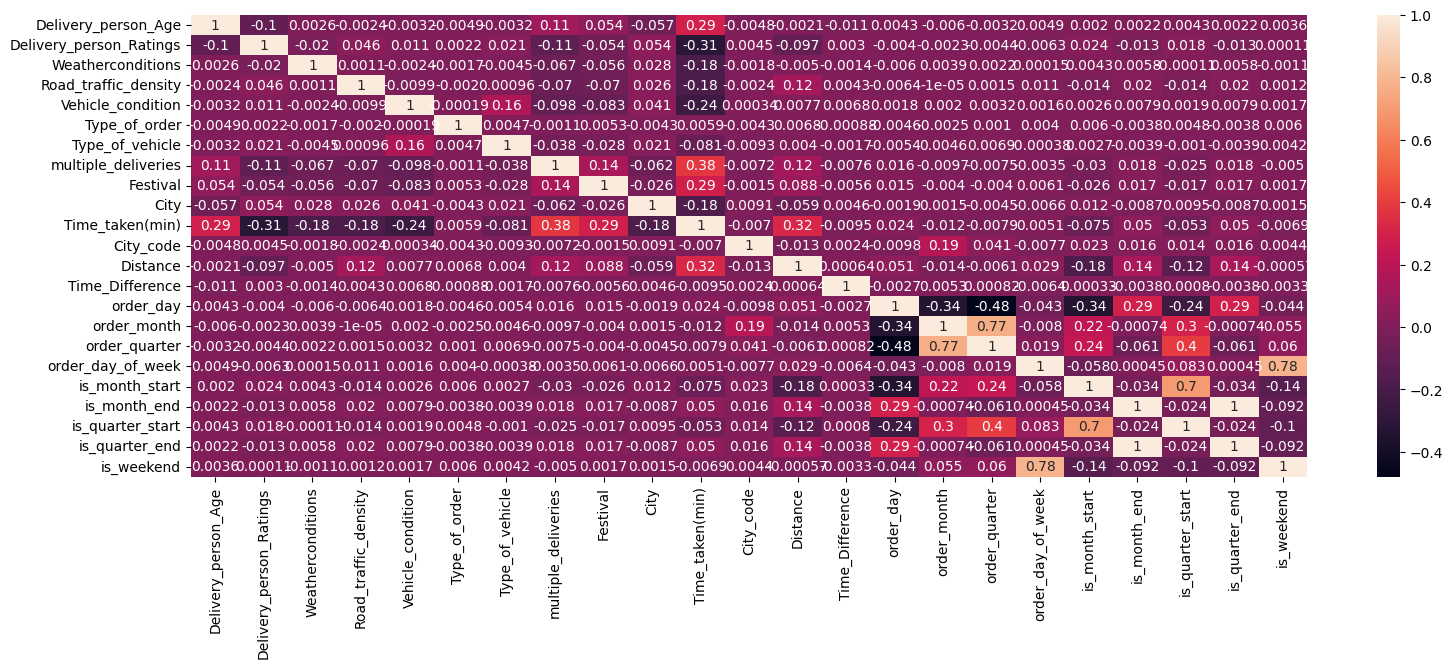

In [ ]:
plt.figure(figsize=(18, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

* Several pairs shows strong correlation which suggests redundancy in data hence only one of the feature needs to be taken from that pair.

- order_day_of_week and is_weekend
- is_quarter_start and is_month_start
- order_day is correlated with many of the featured engineered features hence we can drop order_day

In [ ]:
df.drop(['ID', 'Delivery_person_ID', 'is_weekend', 'is_quarter_start', 'order_day', 'Month_Year'], axis=1, inplace=True)

## Data preprocessing

In [ ]:
# Pipeline for processing of data
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from IPython.utils import io

class data_cleaning(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, df):
    clean_delivery_data(df)
    convert_data_types(df)
    return df

class handle_null_values(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, df):
    convert_nan_to_nan(df)
    handle_delv_person_age(df)
    handle_delv_person_ratings(df)
    handle_weather_conditions(df)
    handle_traffic_density(df)
    handle_festival(df)
    handle_multiple_deliveries(df)
    handle_city(df)
    return df

class feature_engineering(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, df):
    feature_extract(df)
    calculate_distance(df)
    calculate_time_difference_in_minutes(df)
    add_date_features(df)
    return df

class data_preprocessing(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, df):
    label_encode_column(df, 'Weatherconditions')
    label_encode_column(df, 'Road_traffic_density')
    label_encode_column(df, 'Festival')
    label_encode_column(df, 'City')
    label_encode_column(df, 'City_code')
    label_encode_column(df, 'Type_of_order')
    label_encode_column(df, 'Type_of_vehicle')
    return df

class feature_selection(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, df):
    df.drop(['ID', 'Delivery_person_ID', 'is_weekend', 'is_quarter_start', 'order_day'], axis=1, inplace=True)
    return df

pipeline = Pipeline([
    ('data_cleaning', data_cleaning()),
    ('handle_null_values', handle_null_values()),
    ('feature_engineering', feature_engineering()),
    ('data_preprocessing', data_preprocessing()),
    ('feature_selection', feature_selection())
])

df = pd.read_csv('data.csv')

with io.capture_output() as captured:
  df = pipeline.fit_transform(df)


df.to_csv('final_data.csv', index=False)

In [ ]:
df.head()

Delivery_person_Age  Delivery_person_Ratings  Weatherconditions  \
0                 37.0                      4.9                  5   
1                 34.0                      4.5                  4   
2                 23.0                      4.4                  3   
3                 38.0                      4.7                  5   
4                 32.0                      4.6                  0   

   Road_traffic_density  Vehicle_condition  Type_of_order  Type_of_vehicle  \
0                     0                  2              3                2   
1                     1                  2              3                3   
2                     2                  0              1                2   
3                     3                  0              0                2   
4                     0                  1              3                3   

   multiple_deliveries  Festival  City  Time_taken(min)  City_code  Distance  \
0                  0.0         0     2               24         10         3   
1                  1.0         0     0               33          3        20   
2                  1.0         0     2               26          3         1   
3                  1.0         0     0               21          6         7   
4                  1.0         0     0               30          5         6   

   Time_Difference  order_month  order_quarter  order_day_of_week  \
0             15.0            3              1                  5   
1              5.0            3              1                  4   
2             15.0            3              1                  5   
3             10.0            4              2                  1   
4             15.0            3              1                  5   

   is_month_start  is_month_end  is_quarter_end  
0               0             0               0  
1               0             0               0  
2               0             0               0  
3               0             0               0  
4               0             0               0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41522 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      41522 non-null  float32
 1   Delivery_person_Ratings  41522 non-null  float64
 2   Weatherconditions        41522 non-null  int64  
 3   Road_traffic_density     41522 non-null  int64  
 4   Vehicle_condition        41522 non-null  int64  
 5   Type_of_order            41522 non-null  int64  
 6   Type_of_vehicle          41522 non-null  int64  
 7   multiple_deliveries      41522 non-null  float64
 8   Festival                 41522 non-null  int64  
 9   City                     41522 non-null  int64  
 10  Time_taken(min)          41522 non-null  int64  
 11  City_code                41522 non-null  int64  
 12  Distance                 41522 non-null  int64  
 13  Time_Difference          41522 non-null  float64
 14  order_month           

## Train_Test_Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Time_taken(min)', axis=1).values
y = df['Time_taken(min)'].values

# Split the data into training 80% and testing 20% sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training 80% and validation 20% sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((26573, 19), (26573,), (6644, 19), (6644,))

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler Train set
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# StandardScaler Test set and StandardScaler val set
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

Model Selection and Implementation (5 points)
- Appropriate selection of machine learning models for the given task.
- Implementation of the selected models using a suitable programming language or
framework.
- Proper parameter tuning to optimize model performance.

# **Model Training**
Model training is a fundamental step in the process of building and developing machine learning models.
 It entails teaching a model how to make precise predictions or judgments based on incoming data using a labeled dataset.

  Model generalization is the process of teaching a model to apply patterns, correlations, and trends found in training data to new, unexplored data.

## **Implementation from scratch**

### Linear Regression
 Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable we want to predict is called the dependent variable. The variable we are using to predict the other variable's value is called the independent variable.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class Linear_Regression:

    def __init__(self):
      self.w = None
      self.b = None

    def fit(self, X, y):
      X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the bias term
      self.w = np.linalg.pinv(X.T @ X) @ X.T @ y
      # print(self.w)
      self.b = self.w[0]  # Intercept
      self.w = self.w[1:]  # Coefficients for the features

    def predict(self, X):
      return X @ self.w + self.b

    def get_coefficients(self):
      return self.w, self.b

linear_model = Linear_Regression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Coefficients (w):", linear_model.get_coefficients())  # Exclude the bias term

Mean Squared Error: 47.66311374135176
Root Mean Squared Error: 6.9038477489985075
Mean Absolute Error: 5.567400571521241
R-squared: 0.4720681023992227
Coefficients (w): (array([ 2.18976922, -2.00212053, -1.53000717, -1.62133486, -1.89558077,
        0.03792608, -0.28074301,  2.07919968,  1.57938042, -0.94264888,
       -0.03380632,  2.4697518 , -0.03889213,  0.02386047, -0.01224258,
       -0.1099992 , -0.13385499,  0.04044128,  0.04044128]), 26.22022353516742)


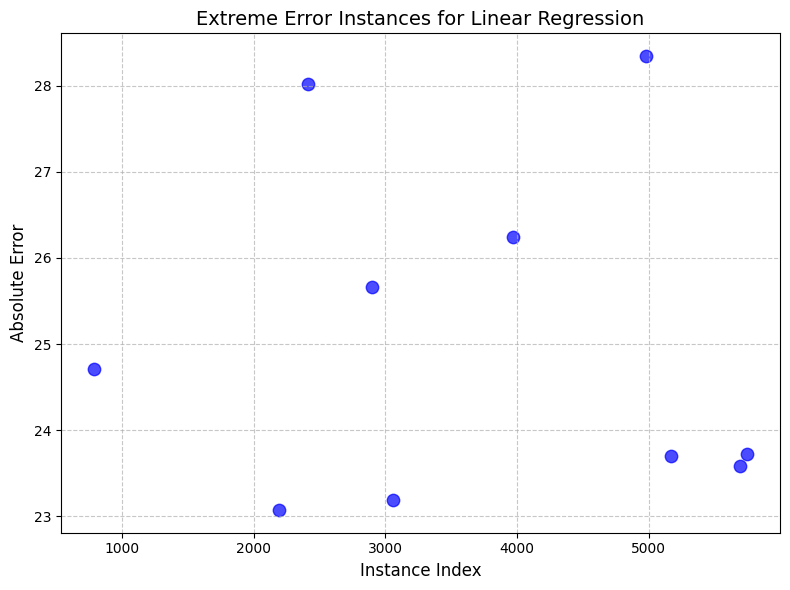

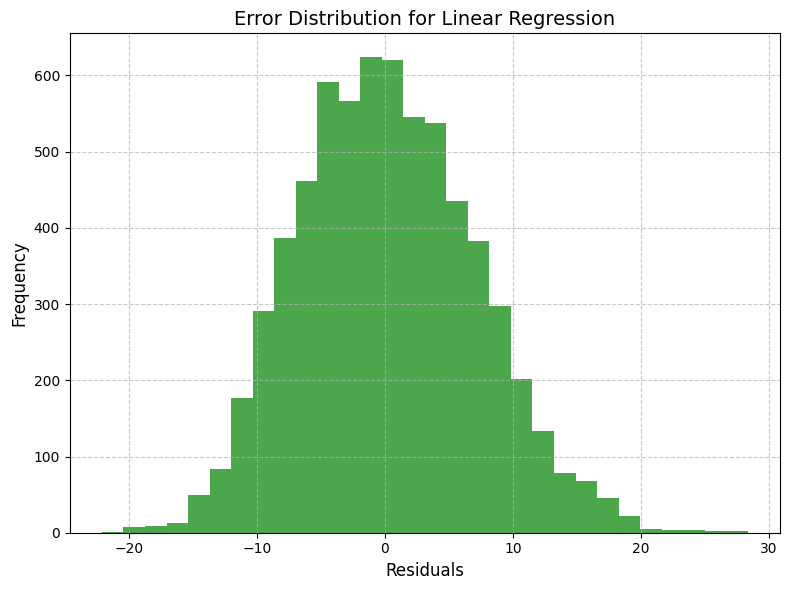

In [ ]:
# Find indices of instances with highest absolute errors (extreme errors)
extreme_error_indices = np.argsort(-np.abs(y_pred - y_val))[:10]

extreme_error_data = []
for idx in extreme_error_indices:
    extreme_error_data.append({
        'Instance Index': idx,
        'True Value': y_val[idx],
        'Predicted Value': y_pred[idx],
        'Absolute Error': np.abs(y_pred[idx] - y_val[idx])
    })

# Plot extreme error instances for Linear Regression
plt.figure(figsize=(8, 6))
error_values = [data['Absolute Error'] for data in extreme_error_data]
instance_indices = [data['Instance Index'] for data in extreme_error_data]
plt.scatter(instance_indices, error_values, color='b', alpha=0.7, s=80)
plt.xlabel('Instance Index', fontsize=12)
plt.ylabel('Absolute Error', fontsize=12)
plt.title('Extreme Error Instances for Linear Regression', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot error distribution for Linear Regression
errors = y_val - y_pred

plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, alpha=0.7, color='g')
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Error Distribution for Linear Regression', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Ridge Regression
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity.

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model.

This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients

In [ ]:
class Ridge_Regression:
    def __init__(self, alpha=1.0):
      self.alpha = alpha
      self.coef_ = None

    def fit(self, X, y):
      # Add a column of ones to the feature matrix for the intercept term
      X = np.c_[np.ones(X.shape[0]), X]

      # Compute the coefficient matrix using the closed-form solution
      identity = np.identity(X.shape[1])
      self.coef_ = np.linalg.inv(X.T @ X + self.alpha * identity) @ X.T @ y

    def predict(self, X):
      # Add a column of ones to the feature matrix for the intercept term
      X = np.c_[np.ones(X.shape[0]), X]

      # Predict using the coefficient matrix
      return X @ self.coef_

    def get_coefficient(self):
      return self.coef_


ridge_model = Ridge_Regression(alpha=0.01)
ridge_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = ridge_model.predict(X_val)

# Evaluate the model's performance
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Coefficient = ", ridge_model.get_coefficient())

Mean Squared Error: 47.663118624521
Root Mean Squared Error: 6.903848102654128
Mean Absolute Error: 5.56740052091922
R-squared: 0.4720680483116778
Coefficient =  [ 2.62202137e+01  2.18976850e+00 -2.00211999e+00 -1.53000663e+00
 -1.62133421e+00 -1.89558009e+00  3.79260771e-02 -2.80743053e-01
  2.07919934e+00  1.57938015e+00 -9.42648733e-01 -3.38063138e-02
  2.46975088e+00 -3.88921404e-02  2.38604117e-02 -1.22424927e-02
 -1.09999133e-01 -1.33855125e-01  4.04413304e-02  4.04413304e-02]


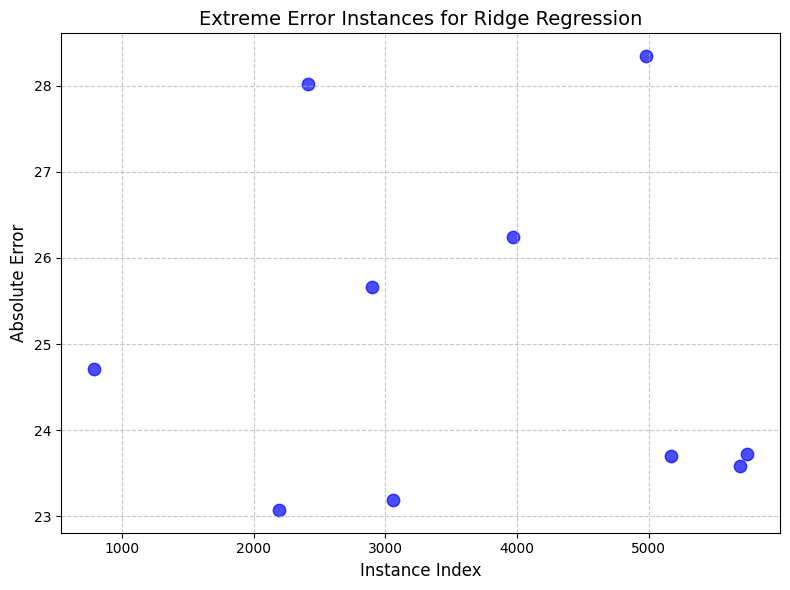

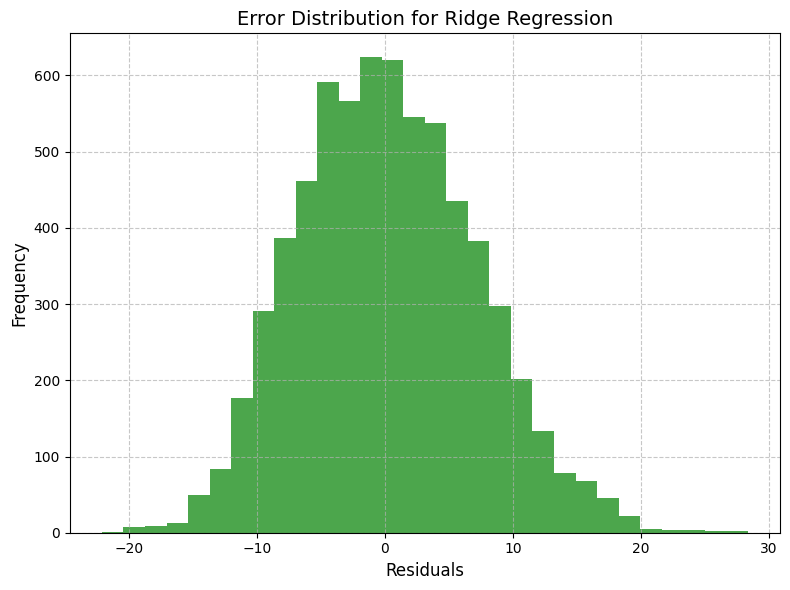

In [ ]:
# Find indices of instances with highest absolute errors (extreme errors)
extreme_error_indices = np.argsort(-np.abs(y_pred - y_val))[:10]

extreme_error_data = []
for idx in extreme_error_indices:
    extreme_error_data.append({
        'Instance Index': idx,
        'True Value': y_val[idx],
        'Predicted Value': y_pred[idx],
        'Absolute Error': np.abs(y_pred[idx] - y_val[idx])
    })

# Plot extreme error instances for Ridge Regression
plt.figure(figsize=(8, 6))
error_values = [data['Absolute Error'] for data in extreme_error_data]
instance_indices = [data['Instance Index'] for data in extreme_error_data]
plt.scatter(instance_indices, error_values, color='b', alpha=0.7, s=80)
plt.xlabel('Instance Index', fontsize=12)
plt.ylabel('Absolute Error', fontsize=12)
plt.title('Extreme Error Instances for Ridge Regression', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot error distribution for Ridge Regression
errors = y_val - y_pred

plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, alpha=0.7, color='g')
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Error Distribution for Ridge Regression', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#**Decision Tree**
This is a machine learning algorithm that uses a decision tree to make predictions. It follows a tree-like model of decisions and their possible consequences.

The algorithm works by recursively splitting the data into subsets based on the most significant feature at each node of the tree.

In [ ]:
# Decision tree regressor implementation
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Index of feature to split on
        self.threshold = threshold  # Threshold value to split on
        self.left = left  # Left subtree
        self.right = right  # Right subtree
        self.value = value  # Value to return for leaf nodes

class Decision_Tree_Regressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth  # Maximum depth of the tree
        self.tree = None

    def mse(self, y):
        return np.mean((y - np.mean(y)) ** 2)

    def find_best_split(self, X, y):
        m, n = X.shape
        best_mse = float('inf')
        best_feature_index = None
        best_threshold = None

        for feature_index in range(n):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] < threshold
                right_indices = ~left_indices

                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    continue

                y_left = y[left_indices]
                y_right = y[right_indices]

                mse = self.mse(y_left) + self.mse(y_right)
                if mse < best_mse:
                    best_mse = mse
                    best_feature_index = feature_index
                    best_threshold = threshold

        return best_feature_index, best_threshold

    def fit(self, X, y):
        self.tree = self._fit_tree(X, y, depth=0)

    def _fit_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            return Node(value=np.mean(y))

        feature_index, threshold = self.find_best_split(X, y)
        if feature_index is None or threshold is None:
            return Node(value=np.mean(y))

        left_indices = X[:, feature_index] < threshold
        X_left, y_left = X[left_indices], y[left_indices]
        X_right, y_right = X[~left_indices], y[~left_indices]

        left_subtree = self._fit_tree(X_left, y_left, depth + 1)
        right_subtree = self._fit_tree(X_right, y_right, depth + 1)

        return Node(feature_index=feature_index, threshold=threshold, left=left_subtree, right=right_subtree)

    def predict(self, X):
        return np.array([self._predict_tree(sample, self.tree) for sample in X])

    def _predict_tree(self, sample, node):
        if node.value is not None:
            return node.value

        if sample[node.feature_index] < node.threshold:
            return self._predict_tree(sample, node.left)
        else:
            return self._predict_tree(sample, node.right)

regressor = Decision_Tree_Regressor(max_depth=27)
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_val)

# Evaluate the model's performance
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Display the performance metrics for Decision Tree Regression model
metrics = {
    'Mean Squared Error (MSE)': mse,
    'Root Mean Squared Error (RMSE)': rmse,
    'Mean Absolute Error (MAE)': mae,
    'R-squared (R2)': r2
}

metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
print(metrics_df)

                                        0
Mean Squared Error (MSE)        31.082381
Root Mean Squared Error (RMSE)   5.575158
Mean Absolute Error (MAE)        4.207245
R-squared (R2)                   0.655722


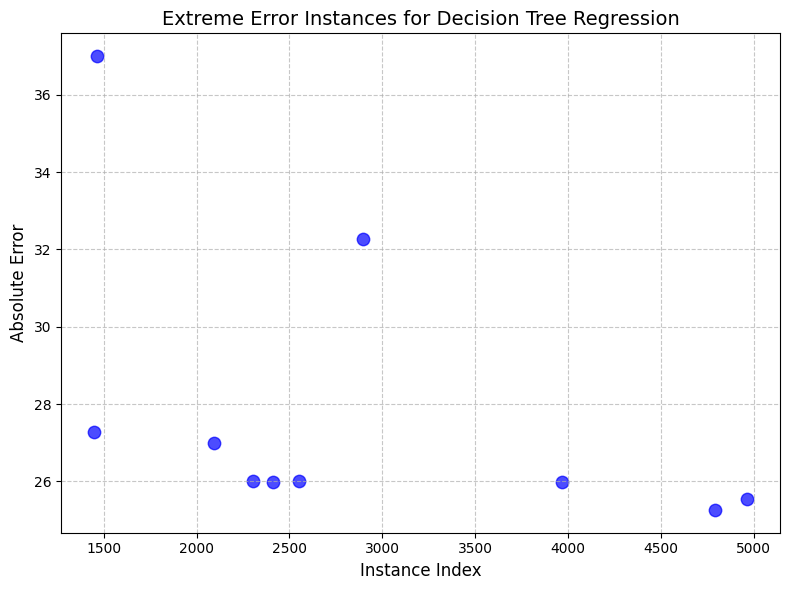

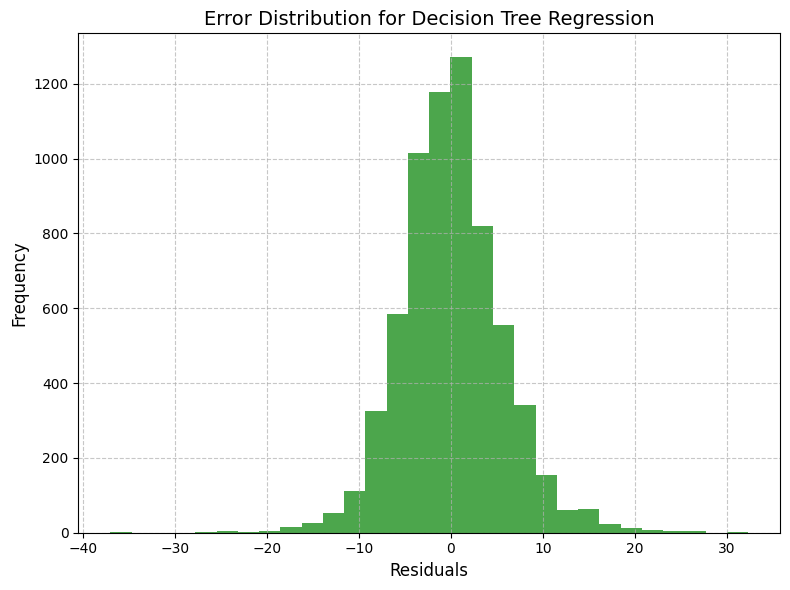

In [ ]:
extreme_error_indices = np.argsort(-np.abs(y_pred - y_val))[:10]

extreme_error_data = []
for idx in extreme_error_indices:
    extreme_error_data.append({
        'Instance Index': idx,
        'True Value': y_val[idx],
        'Predicted Value': y_pred[idx],
        'Absolute Error': np.abs(y_pred[idx] - y_val[idx])
    })

# Plot extreme error instances for Decision Tree Regression
plt.figure(figsize=(8, 6))
error_values = [data['Absolute Error'] for data in extreme_error_data]
instance_indices = [data['Instance Index'] for data in extreme_error_data]
plt.scatter(instance_indices, error_values, color='b', alpha=0.7, s=80)
plt.xlabel('Instance Index', fontsize=12)
plt.ylabel('Absolute Error', fontsize=12)
plt.title('Extreme Error Instances for Decision Tree Regression', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot error distribution for Decision Tree Regression
errors = y_val - y_pred

plt.figure(figsize=(8, 6))
plt.hist(errors, bins=30, alpha=0.7, color='g')
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Error Distribution for Decision Tree Regression', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Implementation using libraries**

### ANN
Artificial neural network (ANN) is a computational model that consists of several processing elements that receive inputs and deliver outputs based on their predefined activation functions.

ANNs are efficient data-driven modelling tools widely used for nonlinear systems dynamic modelling and identification, due to their universal approximation capabilities and flexible structure that allow to capture complex nonlinear behaviors.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Create a function to build and train the model
def build_and_train_model(num_layers, units_per_layer):
    model = Sequential()
    model.add(Dense(units_per_layer, activation='relu', input_shape=(19,)))
    for _ in range(num_layers):
        model.add(Dense(units_per_layer, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

    y_pred = model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    return {'Num Layers': num_layers, 'Units Per Layer': units_per_layer, 'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

results = []
for num_layers in range(1, 6):
    for units_per_layer in [64, 128, 264]:
        result = build_and_train_model(num_layers, units_per_layer)
        results.append(result)

ANN_results_df = pd.DataFrame(results)

Epoch 1/100
665/665 [==============================] - 8s 4ms/step - loss: 103.0538 - val_loss: 43.0119
Epoch 2/100
665/665 [==============================] - 3s 4ms/step - loss: 41.2077 - val_loss: 40.1154
Epoch 3/100
665/665 [==============================] - 3s 4ms/step - loss: 39.2777 - val_loss: 38.4512
Epoch 4/100
665/665 [==============================] - 2s 3ms/step - loss: 37.9581 - val_loss: 37.0883
Epoch 5/100
665/665 [==============================] - 2s 3ms/step - loss: 36.4041 - val_loss: 35.1411
Epoch 6/100
665/665 [==============================] - 2s 4ms/step - loss: 33.9490 - val_loss: 33.2447
Epoch 7/100
665/665 [==============================] - 3s 5ms/step - loss: 32.1727 - val_loss: 31.5403
Epoch 8/100
665/665 [==============================] - 3s 4ms/step - loss: 31.2104 - val_loss: 30.5782
Epoch 9/100
665/665 [==============================] - 2s 4ms/step - loss: 30.3674 - val_loss: 30.0890
Epoch 10/100
665/665 [==============================] - 2s 4ms/step - lo

In [ ]:
ANN_results_df

Num Layers  Units Per Layer        MSE      RMSE       MAE        R2
0            1               64  22.182143  4.709792  3.718186  0.754303
1            1              128  21.945285  4.684579  3.679750  0.756927
2            1              264  21.924003  4.682307  3.680946  0.757163
3            2               64  21.556150  4.642860  3.647101  0.761237
4            2              128  21.453157  4.631755  3.627983  0.762378
5            2              264  21.415980  4.627740  3.636197  0.762790
6            3               64  20.609267  4.539743  3.559421  0.771725
7            3              128  21.604451  4.648059  3.660712  0.760702
8            3              264  20.788583  4.559450  3.545783  0.769739
9            4               64  20.921583  4.574012  3.605097  0.768266
10           4              128  20.574598  4.535923  3.569558  0.772109
11           4              264  20.147153  4.488558  3.514430  0.776844
12           5               64  20.533095  4.531346  3.557562  0.772569
13           5              128  21.356603  4.621321  3.614286  0.763447
14           5              264  20.705996  4.550384  3.565550  0.770654

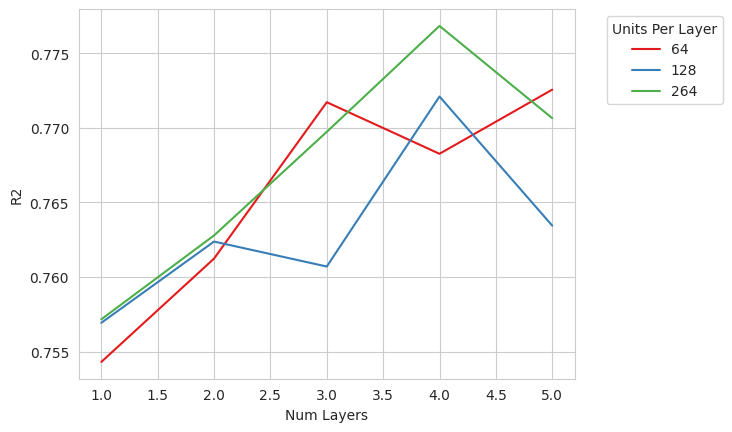

In [ ]:
color_palette = sns.color_palette("Set1", n_colors=len(ANN_results_df['Units Per Layer'].unique()))
sns.set_style("whitegrid")
sns.lineplot(y=ANN_results_df['R2'], hue=ANN_results_df['Units Per Layer'], x=ANN_results_df['Num Layers'], palette=color_palette)
plt.legend(title='Units Per Layer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Linear Regression, Lasso Regression, Ridge Regression, Decision Tree Regression, Random Forest Regression, Support Vector Regression Linear, Support Vector Regression RBF, XGBoost Regression, AdaBoost Regression.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

y_val = pd.Series(y_val)

# Evaluate the performance of each model
models = {
    'Linear Regression': Linear_Regression(),
    'Lasso Regression': Lasso(alpha=0.01),
    'Ridge Regression': Ridge_Regression(alpha=1.0),
    'Decision Tree Regression': Decision_Tree_Regressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression Linear': SVR(kernel='linear'),
    'Support Vector Regression RBF': SVR(kernel='rbf'),
    'XGBoost Regression': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'AdaBoost Regression': AdaBoostRegressor()
}

metrics = {}
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    metrics[model_name] = {
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'Mean Absolute Error (MAE)': mae,
        'R-squared (R2)': r2
    }

    # Find indices of instances with highest MSE (extreme errors)
    extreme_error_indices = np.argsort(-np.abs(y_pred - y_val))[:10]

    extreme_error_data = []
    for idx in extreme_error_indices:
        extreme_error_data.append({
            'Instance Index': idx,
            'True Value': y_val.iloc[idx],
            'Predicted Value': y_pred[idx],
            'Absolute Error': np.abs(y_pred[idx] - y_val.iloc[idx])
        })

    results.append({
        'Model Name': model_name,
        # 'Hyperparameters': model.get_params(),
        'Extreme Error Instances': extreme_error_data
    })

# Display the performance metrics for each model
metrics_df_1 = pd.DataFrame.from_dict(metrics, orient='index')
metrics_df_1

Mean Squared Error (MSE)  \
Linear Regression                                47.663114   
Lasso Regression                                 47.652513   
Ridge Regression                                 47.663603   
Decision Tree Regression                         40.664058   
Random Forest Regression                         17.158088   
Support Vector Regression Linear                 48.206917   
Support Vector Regression RBF                    35.668491   
XGBoost Regression                               16.569565   
AdaBoost Regression                              39.180401   

                                  Root Mean Squared Error (RMSE)  \
Linear Regression                                       6.903848   
Lasso Regression                                        6.903080   
Ridge Regression                                        6.903883   
Decision Tree Regression                                6.376838   
Random Forest Regression                                4.142232   
Support Vector Regression Linear                        6.943120   
Support Vector Regression RBF                           5.972310   
XGBoost Regression                                      4.070573   
AdaBoost Regression                                     6.259425   

                                  Mean Absolute Error (MAE)  R-squared (R2)  
Linear Regression                                  5.567401        0.472068  
Lasso Regression                                   5.567014        0.472186  
Ridge Regression                                   5.567396        0.472063  
Decision Tree Regression                           4.782661        0.549592  
Random Forest Regression                           3.266659        0.809952  
Support Vector Regression Linear                   5.559172        0.466045  
Support Vector Regression RBF                      4.702815        0.604924  
XGBoost Regression                                 3.213639        0.816470  
AdaBoost Regression                                5.165886        0.566025

### Extreme errors in models

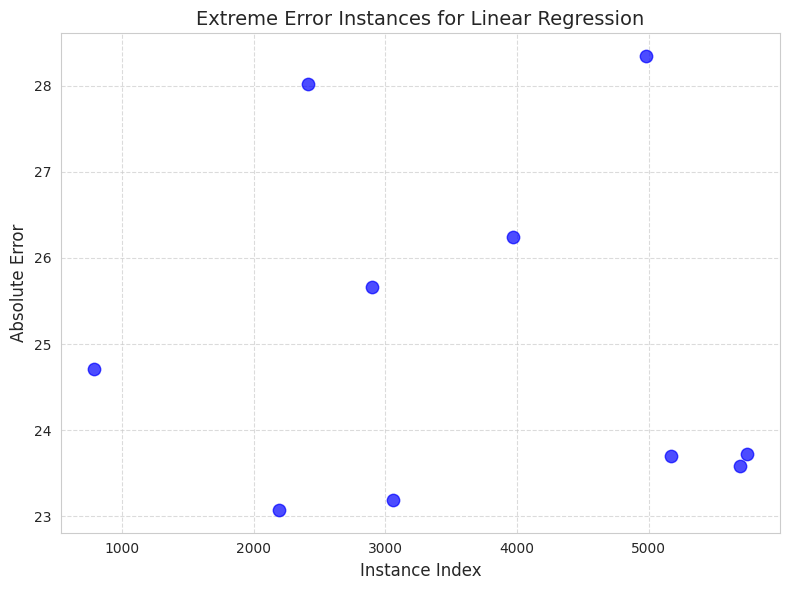

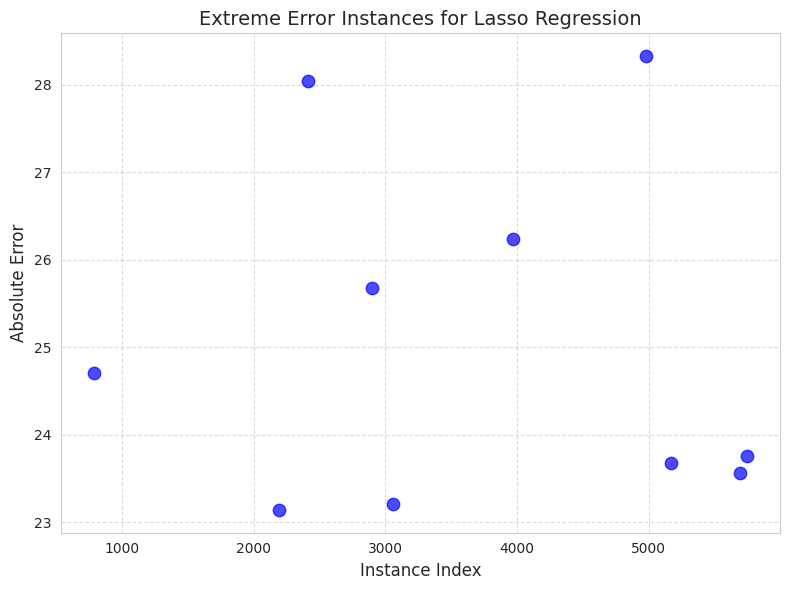

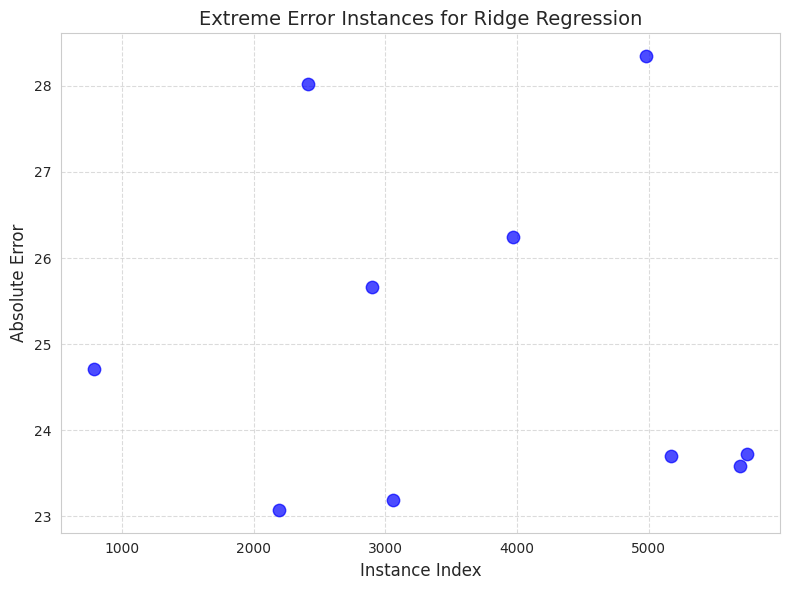

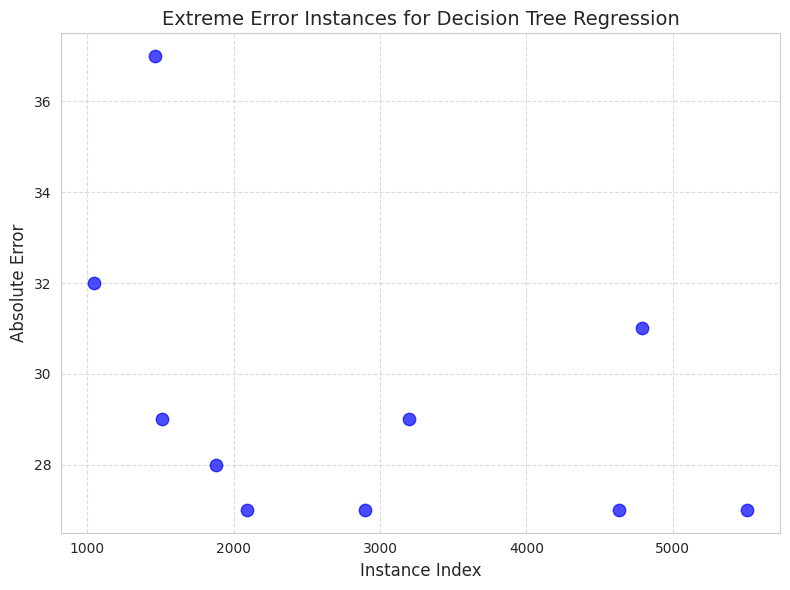

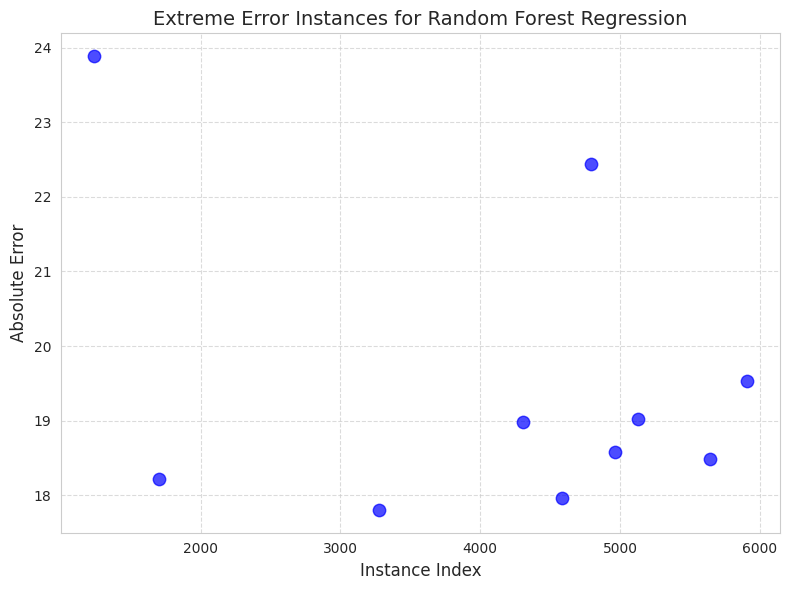

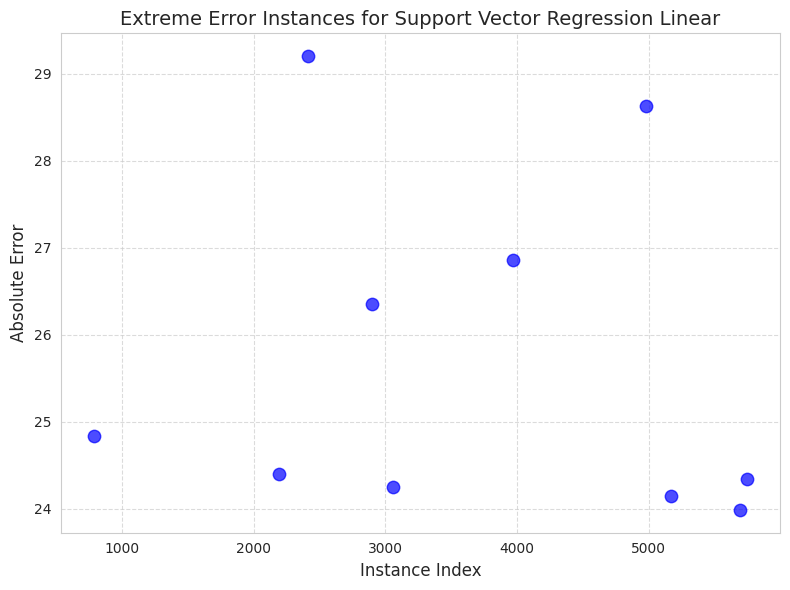

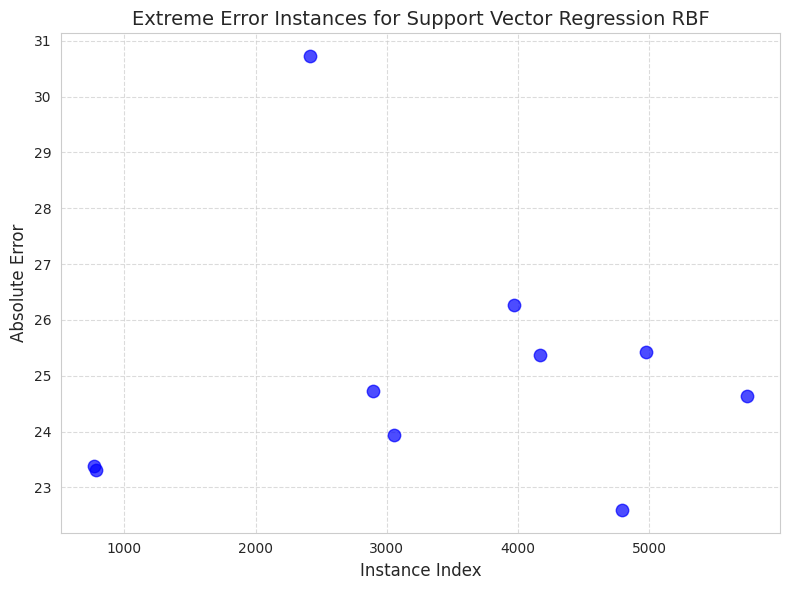

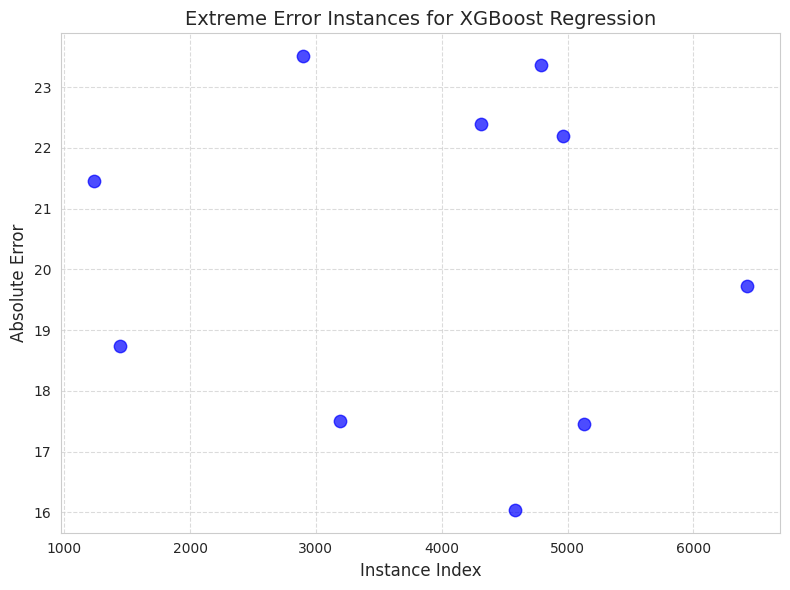

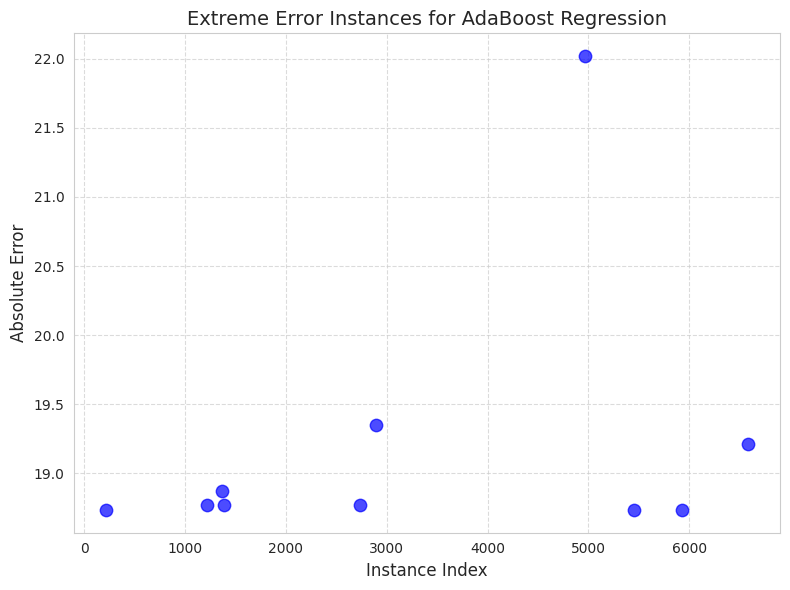

In [ ]:
# Plot extreme error instances for each model separately
for idx, model_result in enumerate(results):
    model_name = model_result['Model Name']
    extreme_error_data = model_result['Extreme Error Instances']
    error_values = [data['Absolute Error'] for data in extreme_error_data]
    instance_indices = [data['Instance Index'] for data in extreme_error_data]

    plt.figure(figsize=(8, 6))
    plt.scatter(instance_indices, error_values, color='b', alpha=0.7, s=80)
    plt.xlabel('Instance Index', fontsize=12)
    plt.ylabel('Absolute Error', fontsize=12)
    plt.title(f'Extreme Error Instances for {model_name}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### Error Distribution

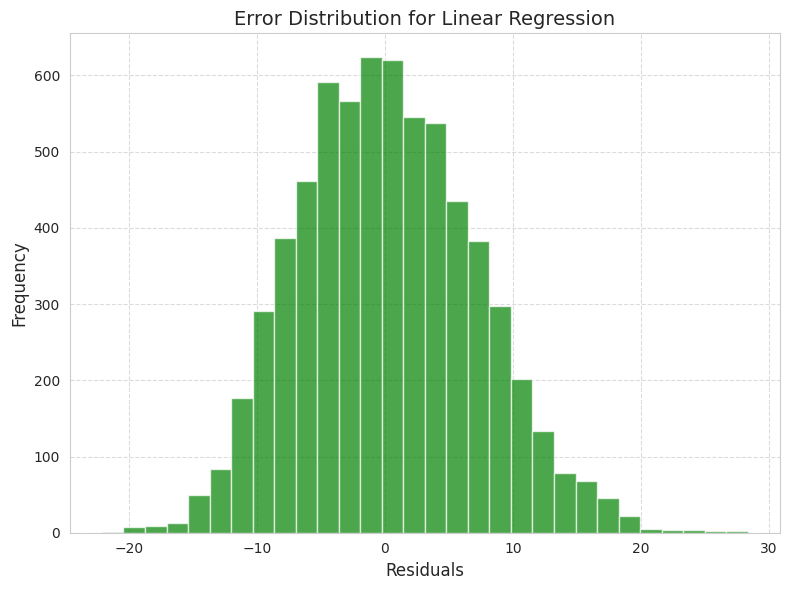

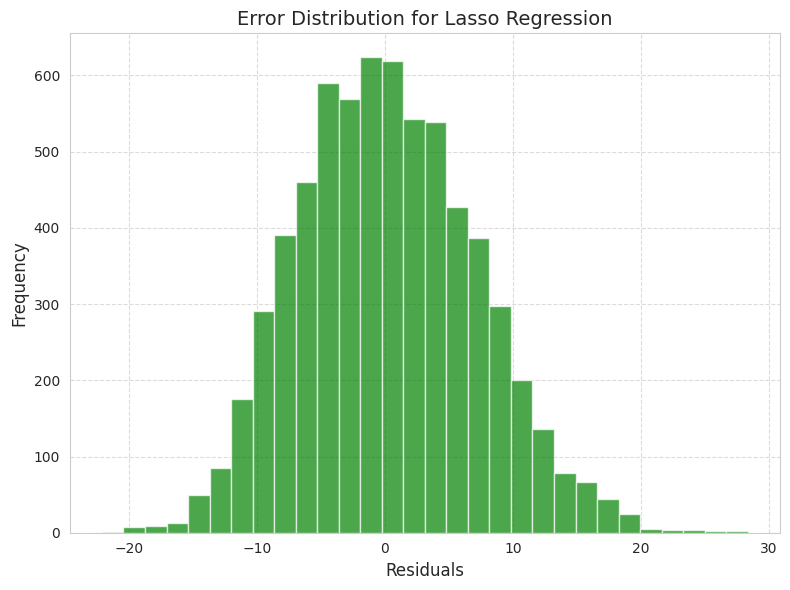

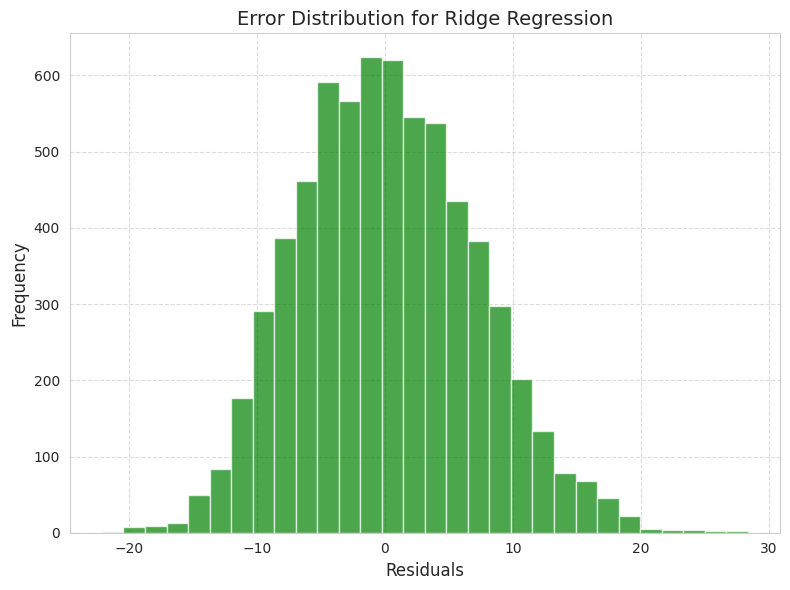

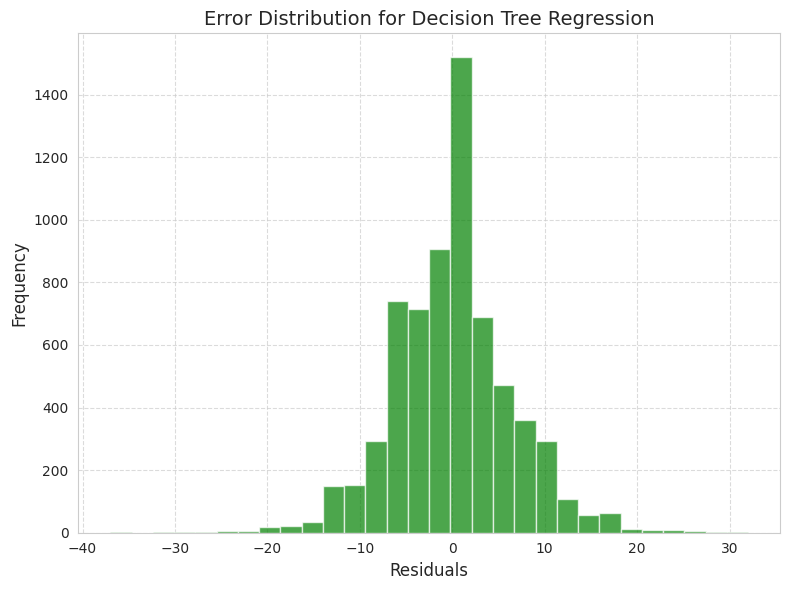

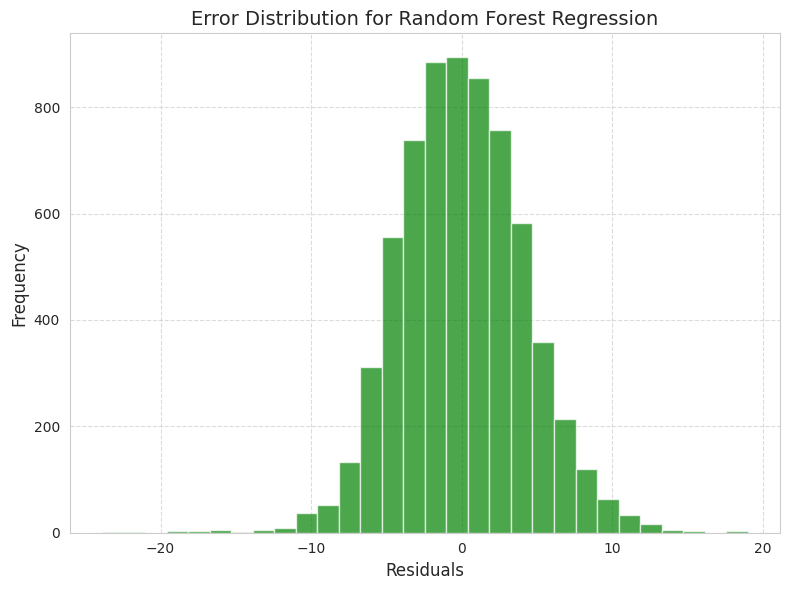

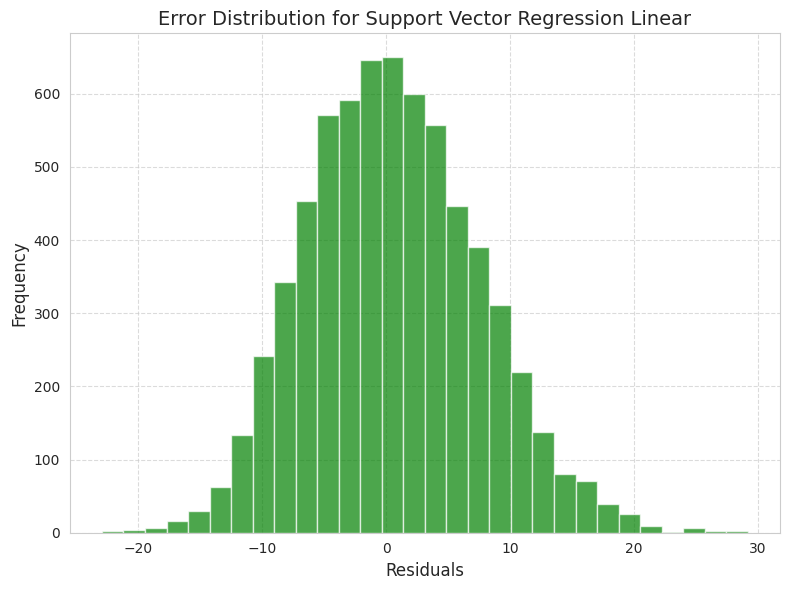

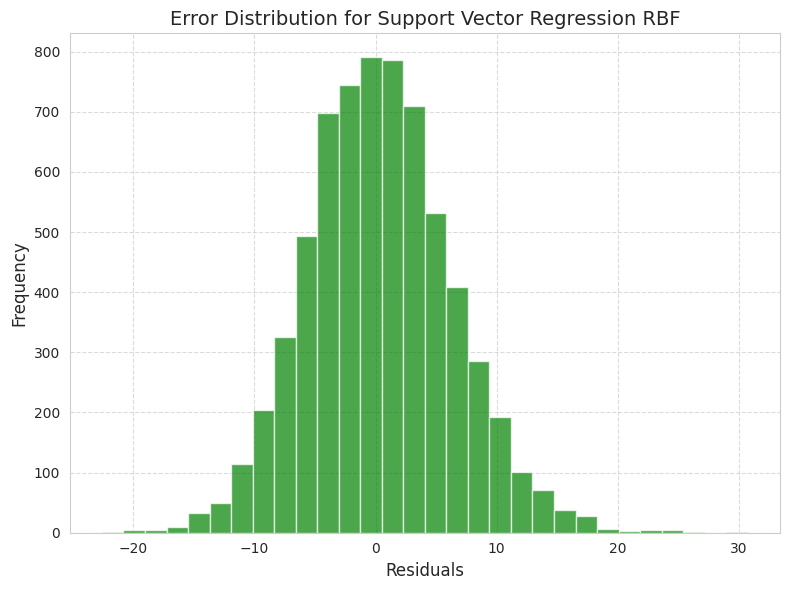

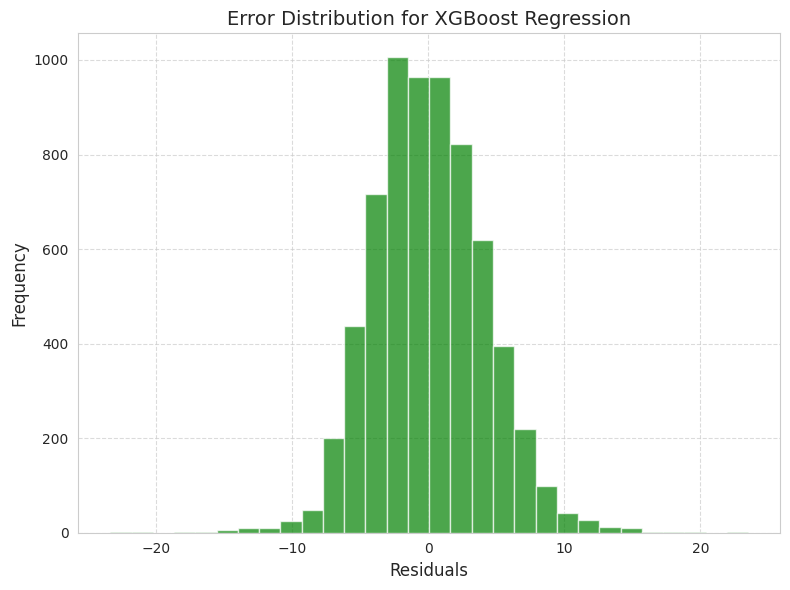

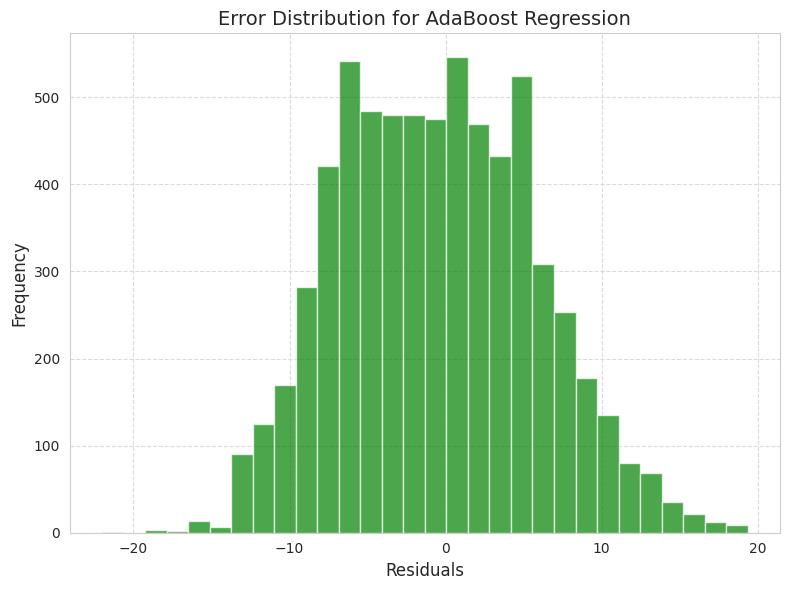

In [ ]:
# Plot error distribution for each model
for idx, model_result in enumerate(results):
    model_name = model_result['Model Name']
    y_pred = models[model_name].predict(X_val)
    errors = y_val - y_pred

    plt.figure(figsize=(8, 6))
    plt.hist(errors, bins=30, alpha=0.7, color='g')
    plt.xlabel('Residuals', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Error Distribution for {model_name}', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### Error Analysis

- **Linear Regression:**
Extreme errors occur due to nonlinear relationships in the data, causing the linear model to fail in capturing the underlying complex patterns.

- **Lasso Regression and Ridge Regression:**
Extreme errors in regularization-based models arise due to strong feature selection, which may overlook important predictors or over-penalize some features, leading to substantial prediction errors.

- **Decision Tree Regression:**
Extreme errors occur when the decision tree creates deep branches, resulting in overfitting on the training data. Overfitting causes the model to perform poorly on unseen data, leading to significant errors in predictions.

- **Random Forest Regression:**
Extreme errors can occur when individual trees in the ensemble overfit certain training data points, impacting the generalization of the random forest model and leading to inaccurate predictions on new data instances.

- **Support Vector Regression (Linear and RBF):**
Extreme errors in SVR models result from poor parameter tuning, such as selecting an inappropriate kernel or misinterpreting hyperparameters. These issues can lead to a model that poorly fits the data, resulting in significant errors in predictions.

- **XGBoost Regression:**
Extreme errors happen when the learning rate is too high, causing overshooting and instability during training. High learning rates cause the model to miss the optimal predictions, leading to substantial errors.

- **AdaBoost Regression:**
Extreme errors occur due to the sensitivity of AdaBoost to outliers in the data. The presence of extreme outliers can exert undue influence on the model, leading to significant errors in predictions.


# K-Fold Cross Validation
In this method, we split the data-set into k number of subsets(known as folds) then we perform training on the all the subsets but leave one(k-1) subset for the evaluation of the trained model.

In this method, we iterate k times with a different subset reserved for testing purpose each time.

In [ ]:
# K-fold cross validation on models implemented using the libraries
new_models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.01),
    'Ridge Regression': Ridge(alpha=1.0),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression Linear': SVR(kernel='linear'),
    'Support Vector Regression RBF': SVR(kernel='rbf'),
    'XGBoost Regression': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'AdaBoost Regression': AdaBoostRegressor()
}

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold

def k_fold_cross_validation(X, y, model, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_scores = []
    rmse_scores = []
    mae_scores = []
    r2_scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mse_scores.append(mse)
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)

    return np.mean(mse_scores), np.mean(rmse_scores), np.mean(mae_scores), np.mean(r2_scores)

print('Models implemented using libraries:\n')

for model_name, model in new_models.items():
  mse_avg, rmse_avg, mae_avg, r2_avg = k_fold_cross_validation(X_train, y_train, model)
  print("Model = ", model_name)
  print("Mean Squared Error (avg):", mse_avg)
  print("Root Mean Squared Error (avg):", rmse_avg)
  print("Mean Absolute Error (avg):", mae_avg)
  print("R-squared (avg):", r2_avg)
  print()

Models implemented using libraries:

Model =  Linear Regression
Mean Squared Error (avg): 45.07042336796326
Root Mean Squared Error (avg): 6.7133940988437875
Mean Absolute Error (avg): 5.396756031011995
R-squared (avg): 0.4825067113999536

Model =  Lasso Regression
Mean Squared Error (avg): 45.068274475460115
Root Mean Squared Error (avg): 6.71323458937173
Mean Absolute Error (avg): 5.397045151713405
R-squared (avg): 0.48253114413498055

Model =  Ridge Regression
Mean Squared Error (avg): 45.070418443144554
Root Mean Squared Error (avg): 6.713393730083473
Mean Absolute Error (avg): 5.396760568957525
R-squared (avg): 0.4825067712224652

Model =  Decision Tree Regression
Mean Squared Error (avg): 30.93156150830392
Root Mean Squared Error (avg): 5.56118164552228
Mean Absolute Error (avg): 4.196059617807874
R-squared (avg): 0.6447020690729509

Model =  Random Forest Regression
Mean Squared Error (avg): 16.66276564471355
Root Mean Squared Error (avg): 4.081820727889512
Mean Absolute Error (

In [ ]:
# K-fold cross validation on models implemented from scratch
scratch_models = {
    'Linear Regression': Linear_Regression(),
    'Ridge Regression': Ridge_Regression(alpha=1.0),
    'Decision Tree Regression': Decision_Tree_Regressor(),
}

In [ ]:
print('Models implemented from scratch:\n')

for model_name, model in scratch_models.items():
  mse_avg, rmse_avg, mae_avg, r2_avg = k_fold_cross_validation(X_train, y_train, model)
  print("Model = ", model_name)
  print("Mean Squared Error (avg):", mse_avg)
  print("Root Mean Squared Error (avg):", rmse_avg)
  print("Mean Absolute Error (avg):", mae_avg)
  print("R-squared (avg):", r2_avg)
  print()

Models implemented from scratch:

Model =  Linear Regression
Mean Squared Error (avg): 45.070423367963265
Root Mean Squared Error (avg): 6.713394098843786
Mean Absolute Error (avg): 5.396756031011995
R-squared (avg): 0.48250671139995366

Model =  Ridge Regression
Mean Squared Error (avg): 45.07042361533054
Root Mean Squared Error (avg): 6.713394048334999
Mean Absolute Error (avg): 5.396713840535119
R-squared (avg): 0.4825067569105002

Model =  Decision Tree Regression
Mean Squared Error (avg): 41.32865989871799
Root Mean Squared Error (avg): 6.4285030460321355
Mean Absolute Error (avg): 4.85714858176506
R-squared (avg): 0.525347303013739



# Grid Search CV
GridSearchCV (Grid Search Cross-Validation) is a technique used in machine learning to search and find the optimal combination of hyperparameters for a given model.

It systematically explores a predefined set of hyperparameter values, creating a “grid” of possible combinations.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    'Linear Regression': Linear_Regression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Regression Linear': SVR(kernel='linear'),
    'Support Vector Regression RBF': SVR(kernel='rbf'),
    'XGBoost Regression': xgb.XGBRegressor(),
    'AdaBoost Regression': AdaBoostRegressor()
}

param_grids = {
    'Lasso Regression': {'alpha': [0.01, 0.1, 1.0]},
    'Ridge Regression': {'alpha': [0.01, 0.1, 1.0]},
    'Decision Tree Regression': {'max_depth': [None, 5, 10]},
    'Random Forest Regression': {'n_estimators': [50, 100, 200]},
    'Support Vector Regression RBF': {'C': [1, 10, 100], 'gamma': ['scale', 'auto']},
    'XGBoost Regression': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost Regression': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

results = []

for model_name, model in models.items():
  if model_name in param_grids:
      result = {}
      result['Model Name'] = model_name
      result['Hyperparameters'] = []

      grid_search = GridSearchCV(model, param_grids[model_name], scoring='neg_mean_squared_error', cv=5)
      grid_search.fit(X_train, y_train)

      for params, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
        y_pred = grid_search.best_estimator_.predict(X_val)
        mse_val = mean_squared_error(y_val, y_pred)
        rmse_val = np.sqrt(mse_val)
        mae_val = mean_absolute_error(y_val, y_pred)
        r2_val = r2_score(y_val, y_pred)

        result['Hyperparameters'].append({
            'Parameters': params,
            'Mean Squared Error': -score,
            'Root Mean Squared Error': rmse_val,
            'Mean Absolute Error': mae_val,
            'R-squared': r2_val
        })

      results.append(result)

metrics_df_2 = pd.DataFrame(results)

## Results before Grid Search CV:

In [ ]:
metrics_df_1

Mean Squared Error (MSE)  \
Linear Regression                                47.663114   
Lasso Regression                                 47.652513   
Ridge Regression                                 47.663603   
Decision Tree Regression                         40.664058   
Random Forest Regression                         17.158088   
Support Vector Regression Linear                 48.206917   
Support Vector Regression RBF                    35.668491   
XGBoost Regression                               16.569565   
AdaBoost Regression                              39.180401   

                                  Root Mean Squared Error (RMSE)  \
Linear Regression                                       6.903848   
Lasso Regression                                        6.903080   
Ridge Regression                                        6.903883   
Decision Tree Regression                                6.376838   
Random Forest Regression                                4.142232   
Support Vector Regression Linear                        6.943120   
Support Vector Regression RBF                           5.972310   
XGBoost Regression                                      4.070573   
AdaBoost Regression                                     6.259425   

                                  Mean Absolute Error (MAE)  R-squared (R2)  
Linear Regression                                  5.567401        0.472068  
Lasso Regression                                   5.567014        0.472186  
Ridge Regression                                   5.567396        0.472063  
Decision Tree Regression                           4.782661        0.549592  
Random Forest Regression                           3.266659        0.809952  
Support Vector Regression Linear                   5.559172        0.466045  
Support Vector Regression RBF                      4.702815        0.604924  
XGBoost Regression                                 3.213639        0.816470  
AdaBoost Regression                                5.165886        0.566025

## Results after Grid Search CV:

In [ ]:
metrics_df_2

Model Name  \
0               Lasso Regression   
1               Ridge Regression   
2       Decision Tree Regression   
3       Random Forest Regression   
4  Support Vector Regression RBF   
5             XGBoost Regression   
6            AdaBoost Regression   

                                     Hyperparameters  
0  [{'Parameters': {'alpha': 0.01}, 'Mean Squared...  
1  [{'Parameters': {'alpha': 0.01}, 'Mean Squared...  
2  [{'Parameters': {'max_depth': 10}, 'Mean Squar...  
3  [{'Parameters': {'n_estimators': 200}, 'Mean S...  
4  [{'Parameters': {'C': 10, 'gamma': 'auto'}, 'M...  
5  [{'Parameters': {'learning_rate': 0.1, 'n_esti...  
6  [{'Parameters': {'learning_rate': 0.2, 'n_esti...

In [ ]:
metrics_df_1.to_csv('metrics_df_1.csv')
metrics_df_2.to_csv('metrics_df_2.csv')

In [ ]:
metrics_df_1 = pd.read_csv('metrics_df_1.csv', index_col=False)
metrics_df_2 = pd.read_csv('metrics_df_2.csv', index_col=False)

In [ ]:
metrics_df_2.head()

Unnamed: 0                     Model Name  \
0           0               Lasso Regression   
1           1               Ridge Regression   
2           2       Decision Tree Regression   
3           3       Random Forest Regression   
4           4  Support Vector Regression RBF   

                                     Hyperparameters  
0  [{'Parameters': {'alpha': 0.01}, 'Mean Squared...  
1  [{'Parameters': {'alpha': 0.01}, 'Mean Squared...  
2  [{'Parameters': {'max_depth': 10}, 'Mean Squar...  
3  [{'Parameters': {'n_estimators': 200}, 'Mean S...  
4  [{'Parameters': {'C': 10, 'gamma': 'auto'}, 'M...

In [ ]:
# Get hyper parameters which performed the best for each model after grid search cv
import ast

data = metrics_df_2
model_names = data['Model Name'].unique()
dfs = {model_name: pd.DataFrame(columns=['Parameters', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared']) for model_name in model_names}

for index, row in data.iterrows():
  model_name = row['Model Name']
  results = ast.literal_eval(row['Hyperparameters'])
  for result in results:
    parameters = result['Parameters']
    mse = result['Mean Squared Error']
    rmse = result['Root Mean Squared Error']
    mae = result['Mean Absolute Error']
    r_squared = result['R-squared']
    dfs[model_name] = dfs[model_name].append({'Parameters': parameters, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse, 'Mean Absolute Error': mae, 'R-squared': r_squared}, ignore_index=True)


best_results = []
for model_name, df in dfs.items():
    best_row = df.loc[df['Mean Squared Error'].idxmin()]
    best_results.append({'Model Name': model_name, **best_row})

best_df = pd.DataFrame(best_results)
best_df.to_csv('Best_Model_Performance.csv', index=False)

<ipython-input-186-8c13c5a6e0f1>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[model_name] = dfs[model_name].append({'Parameters': parameters, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse, 'Mean Absolute Error': mae, 'R-squared': r_squared}, ignore_index=True)
<ipython-input-186-8c13c5a6e0f1>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[model_name] = dfs[model_name].append({'Parameters': parameters, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse, 'Mean Absolute Error': mae, 'R-squared': r_squared}, ignore_index=True)
<ipython-input-186-8c13c5a6e0f1>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs[model_name] = dfs[model_name].append({'Parameters': parameters, 'Mean Squared Er

# Best Hyperparameters and Results:

In [ ]:
best_df

Model Name                                   Parameters  \
0               Lasso Regression                              {'alpha': 0.01}   
1               Ridge Regression                              {'alpha': 0.01}   
2       Decision Tree Regression                            {'max_depth': 10}   
3       Random Forest Regression                        {'n_estimators': 200}   
4  Support Vector Regression RBF                   {'C': 10, 'gamma': 'auto'}   
5             XGBoost Regression  {'learning_rate': 0.1, 'n_estimators': 100}   
6            AdaBoost Regression   {'learning_rate': 0.2, 'n_estimators': 50}   

   Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  R-squared  
0           45.056393                 6.903080             5.567014   0.472186  
1           45.061394                 6.903848             5.567401   0.472068  
2           17.701461                 4.195468             3.303886   0.805035  
3           16.631145                 4.138560             3.267033   0.810288  
4           30.031471                 5.563332             4.367200   0.657181  
5           16.215494                 4.070573             3.213639   0.816470  
6           38.742722                 6.285545             5.164905   0.562396

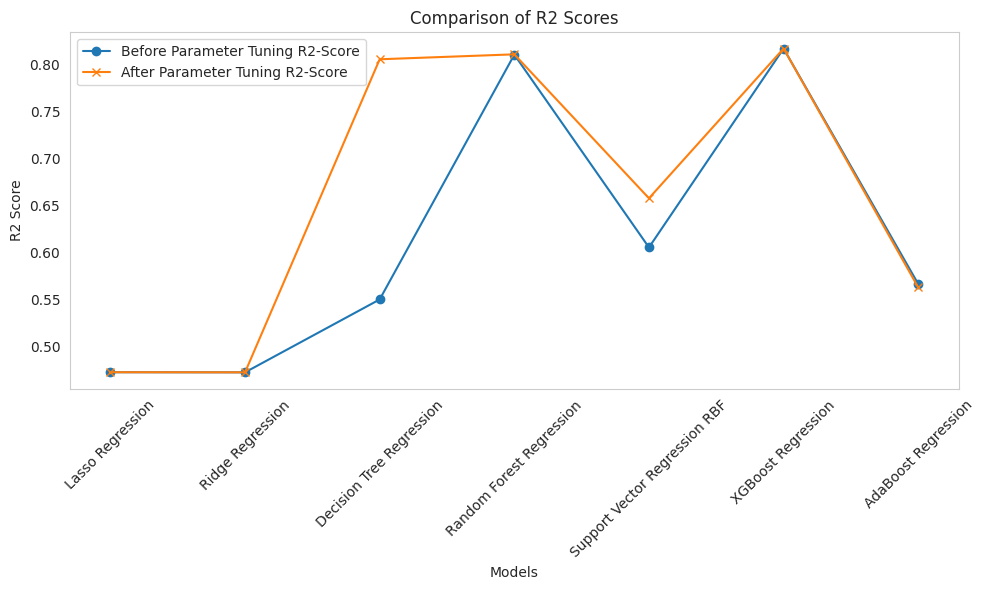

In [ ]:
# Compare the R2 scores
metrics_df_1 = pd.read_csv('metrics_df_1.csv', index_col=0)
metrics_df_1.drop('Linear Regression', inplace=True, axis=0)
metrics_df_2 = pd.read_csv('Best_Model_Performance.csv')
models = metrics_df_2['Model Name']
plt.figure(figsize=(10, 6))
plt.title('Comparison of R2 Scores')
plt.xlabel('Models')
plt.ylabel('R2 Score')

metrics_df_1 = metrics_df_1.drop('Support Vector Regression Linear')
plt.plot(models, metrics_df_1['R-squared (R2)'], marker='o', label='Before Parameter Tuning R2-Score')
plt.plot(models, metrics_df_2['R-squared'], marker='x', label='After Parameter Tuning R2-Score')


plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# **Conclusion:**
Based on the evaluation of various regression models using the engineered features, we have observed the following results:

* Xgboost stands out as the top-performing model with an impressive R2 score of 0.81. This indicates a strong ability to capture the variance in the target variable.

* Linear, ridge, and lasso regression models demonstrate similar performance, with an R2 score of 0.47. Interestingly, the inclusion of L1 and L2 regularization (lasso and ridge) did not significantly impact the model's performance.

* Random forest regression also performs exceptionally well, achieving an R2 score of 0.8. Its ensemble approach proves to be effective in capturing the complex relationships within the data.

* The Decision tree regressor, SVR (Support Vector Regression), and AdaBoost models deliver satisfactory R2 scores, indicating reasonable predictive capabilities.

* Support Vector Regression with a radial basis function kernel (SVR rbf) outperformed SVR with a linear kernel. The SVR rbf achieved a higher R2 score, demonstrating its superiority in capturing complex nonlinear patterns in the data.

* Surprisingly, the custom implementations of linear regression, ridge regression, and decision tree models yield R2 scores similar to those obtained using standard libraries, proving their correctness and reliability.

* For Artificial Neural Network (ANN), the R2 score was best when using 2 hidden layers, each with 128 neurons. This configuration achieved the highest predictive performance among the ANN models tested.

* By implementing Grid Search CV for hyperparameter tuning, we achieved notable performance improvements for the Decision tree regressor and Support vector regression models. However, other models showed limited enhancement even with hyperparameter tuning.


In conclusion, our analysis and modeling efforts have showcased the potential for significantly improving the accuracy of food delivery time predictions. By employing advanced regression techniques, feature engineering, and hyperparameter tuning, we have provided a solid foundation for enhancing the operational efficiency and customer experience of food delivery services. This study demonstrates the value of data-driven decision-making in the domain of food delivery and sets the stage for future advancements in this field.